* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint

In [181]:
#import packages
import numpy as np     
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [182]:
#load provided dataset
training_set_labels = pd.read_csv('./Data/Training_Set_Labels.csv')
training_set_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [183]:
#check shape
training_set_labels.shape

(59400, 2)

In [184]:
#get summary
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [185]:
#get value count for each class
training_set_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**training_set_labels** dataset has no missing data. This is our target variable. There are three classes:
* ‘functioning’
* ‘non-functioning’ 
* ‘functioning needs repair’

In order for the classification model to correctly predict the target, we need to change the labels from strings to integers.

In [186]:
#load provided dataset
training_set_values = pd.read_csv('./Data/Training_Set_Values.csv')
training_set_values.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [187]:
#check the shape
training_set_values.shape

(59400, 40)

The dataset includes 40 independent features X.

In [188]:
#load provided dataset
test_set_values = pd.read_csv('./Data/Test_Set_Values.csv')
test_set_values.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity  quantity_group  \
0  ...    never pay          soft          good      seasonal        seasonal   
1  ...    never pay          soft          good  insufficient    insufficient   
2  ...    never pay          soft          good  insufficient    insufficient   
3  ...      unknown          soft          good           dry             dry   
4  ...      monthly          soft          good        enough          enough   

                 source           source_type  source_class  \
0  rainwater harvesting  rainwater harvesting       surface   
1                spring                spring   groundwater   
2  rainwater harvesting  rainwater harvesting       surface   
3          shallow well          shallow well   groundwater   
4                spring                spring   groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other                 other  
4  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [189]:
#check the shape
test_set_values.shape

(14850, 40)

In [190]:
#merge train set and test set
data = pd.concat([training_set_values, test_set_values], ignore_index = True)
data.shape

(74250, 40)

In [191]:
#merge
df = pd.merge(training_set_labels, data, on = 'id')
df.head()

id    status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572      functional      6000.0    2011-03-14         Roman        1390   
1   8776      functional         0.0    2013-03-06       Grumeti        1399   
2  34310      functional        25.0    2013-02-25  Lottery Club         686   
3  67743  non functional         0.0    2013-01-28        Unicef         263   
4  19728      functional         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name  ...  \
0         Roman  34.938093  -9.856322                  none  ...   
1       GRUMETI  34.698766  -2.147466              Zahanati  ...   
2  World vision  37.460664  -3.821329           Kwa Mahundi  ...   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu  ...   
4       Artisan  31.130847  -1.825359               Shuleni  ...   

   payment_type water_quality quality_group      quantity  quantity_group  \
0      annually          soft          good        enough          enough   
1     never pay          soft          good  insufficient    insufficient   
2    per bucket          soft          good        enough          enough   
3     never pay          soft          good           dry             dry   
4     never pay          soft          good      seasonal        seasonal   

                 source           source_type source_class  \
0                spring                spring  groundwater   
1  rainwater harvesting  rainwater harvesting      surface   
2                   dam                   dam      surface   
3           machine dbh              borehole  groundwater   
4  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 41 columns]

In [192]:
#check shape
df.shape

(59400, 41)

In [193]:
#get summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [194]:
#check missing values
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

The dataset has 59,400 entries and 40 columns/features (excluding 'id').
We will examine each column one by one.

# Cleaning and Initial EDA

# Target (y)

## **'status_group'**

In [195]:
#get value count
df['status_group'].value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

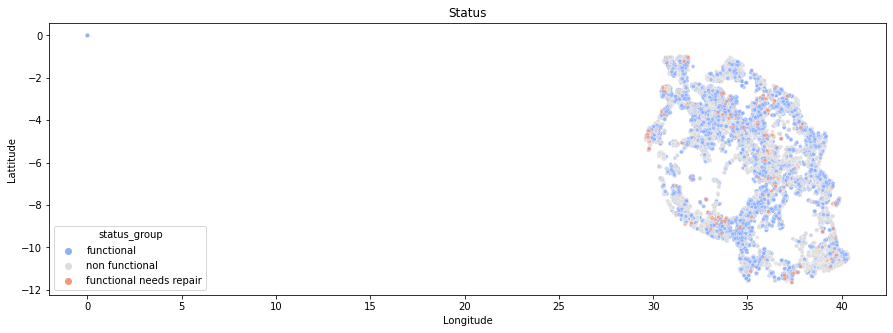

<Figure size 432x288 with 0 Axes>

In [196]:
#plot 
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'status_group', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Status')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/status_group_scatterplot')

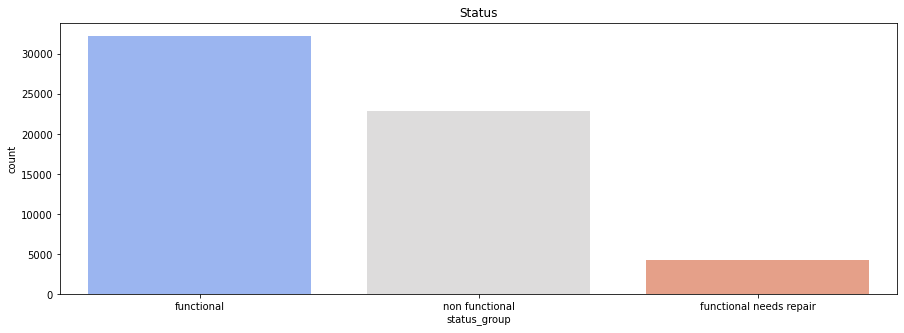

In [197]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', data = df, palette = 'coolwarm')
plt.title('Status')
plt.savefig('./Data/status_group_countplot')

There is a class imbalance for the target classes:

* 54% are functional
* 38% non-functional
* 7.26% functional, needs repair

We will have to use SMOTE later on to fix this problem.

# Explore Each Feature (X)

In [198]:
#get column names
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

## **'amount_tsh'**

The total static head. It means the amount of water available to a waterpoint.

In [199]:
#get value count
df['amount_tsh'].value_counts(normalize = True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [200]:
#check how many unique values
df['amount_tsh'].nunique()

98

<AxesSubplot:>

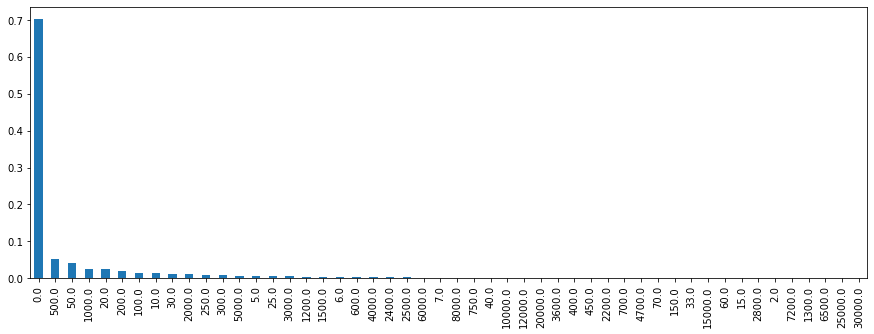

In [201]:
#get top 50 
df['amount_tsh'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

The majority of data is 0.

In [202]:
#get how many entries are 0
len(df[df['amount_tsh'] == 0]) / len(df)

0.700993265993266

70% of 'amount_tsh' is 0

In [203]:
#describe excluding missing data
df['amount_tsh'][df['amount_tsh'] != 0].describe()

count     17761.000000
mean       1062.351942
std        5409.344940
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

<AxesSubplot:>

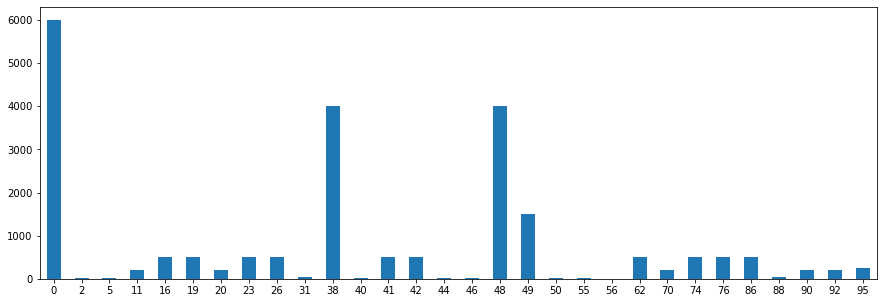

In [204]:
#plot excluding missing data
df['amount_tsh'][df['amount_tsh'] != 0].head(30).plot.bar(figsize = (15, 5), rot = 0)

In [205]:
#more exploration
pd.crosstab(df['amount_tsh'][df['amount_tsh'] != 0], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
amount_tsh                                                       
0.20             0.00000                      0.0         1.00000
0.25             1.00000                      0.0         0.00000
1.00             0.00000                      0.0         1.00000
2.00             1.00000                      0.0         0.00000
5.00             0.87766                      0.0         0.12234
...                  ...                      ...             ...
138000.00        1.00000                      0.0         0.00000
170000.00        1.00000                      0.0         0.00000
200000.00        1.00000                      0.0         0.00000
250000.00        1.00000                      0.0         0.00000
350000.00        1.00000                      0.0         0.00000

[97 rows x 3 columns]

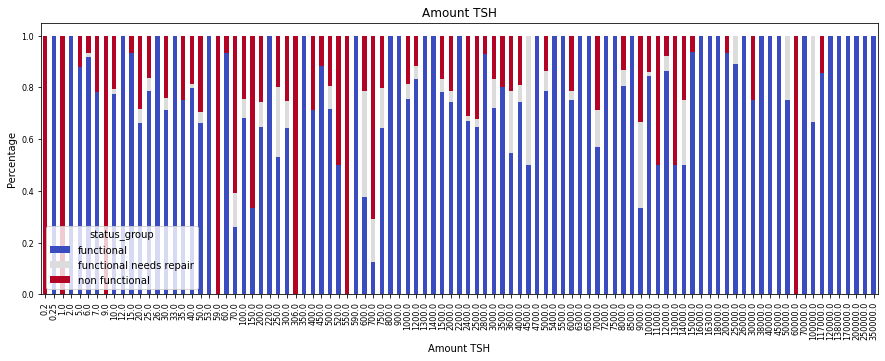

In [206]:
#plot
pd.crosstab(df['amount_tsh'][df['amount_tsh'] != 0], df['status_group'], normalize = 'index').plot(kind = 'bar', 
                                                                                                   stacked = True,
                                                                                                   colormap = 'coolwarm',
                                                                                                   figsize = (15,5),
                                                                                                   fontsize = 8,
                                                                                                  title = 'Amount TSH',
                                                                                                  xlabel = 'Amount TSH',
                                                                                                  ylabel = 'Percentage')
plt.savefig('./Data/amount_tsh_crosstab')

Static head measures the total vertical distance that a pump raises water

## **'date_recorded'** 

The date the row was entered

In [207]:
#get value count
df['date_recorded'].value_counts(normalize = True)

2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2011-09-01    0.000017
2011-09-13    0.000017
2011-09-21    0.000017
2012-01-25    0.000017
2011-08-31    0.000017
Name: date_recorded, Length: 356, dtype: float64

In [208]:
#check how many unique values
df['date_recorded'].nunique()

356

In [209]:
from datetime import datetime

#convert 'date_recorded'to a datetime object
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

#add 'year_recorded' column
df['year_recorded'] = pd.DatetimeIndex(df['date_recorded']).year

#review
df.head(2)

id status_group  amount_tsh date_recorded   funder  gps_height  \
0  69572   functional      6000.0    2011-03-14    Roman        1390   
1   8776   functional         0.0    2013-03-06  Grumeti        1399   

  installer  longitude  latitude  wpt_name  ...  water_quality quality_group  \
0     Roman  34.938093 -9.856322      none  ...           soft          good   
1   GRUMETI  34.698766 -2.147466  Zahanati  ...           soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   

  source_class     waterpoint_type  waterpoint_type_group year_recorded  
0  groundwater  communal standpipe     communal standpipe          2011  
1      surface  communal standpipe     communal standpipe          2013  

[2 rows x 42 columns]

In [210]:
#check summary statistics
df['year_recorded'].describe()

count    59400.000000
mean      2011.921667
std          0.958758
min       2002.000000
25%       2011.000000
50%       2012.000000
75%       2013.000000
max       2013.000000
Name: year_recorded, dtype: float64

In [211]:
#check how many unique values
df['year_recorded'].nunique()

5

<AxesSubplot:>

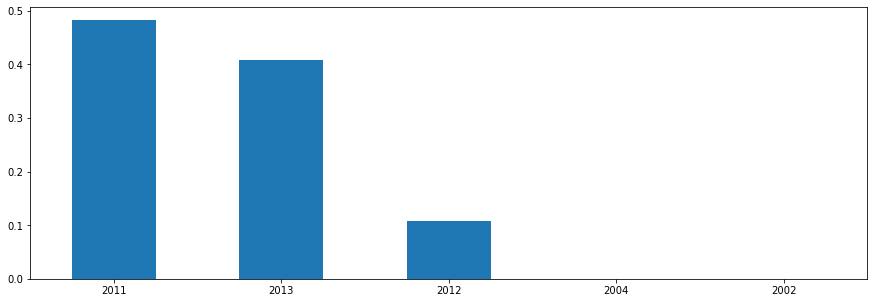

In [212]:
#visualize
df['year_recorded'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [213]:
#more exploration
pd.crosstab(df['year_recorded'], df['status_group'], normalize = 'index')

status_group   functional  functional needs repair  non functional
year_recorded                                                     
2002             1.000000                 0.000000        0.000000
2004             0.333333                 0.033333        0.633333
2011             0.565669                 0.063193        0.371138
2012             0.486613                 0.056351        0.457036
2013             0.531581                 0.088253        0.380166

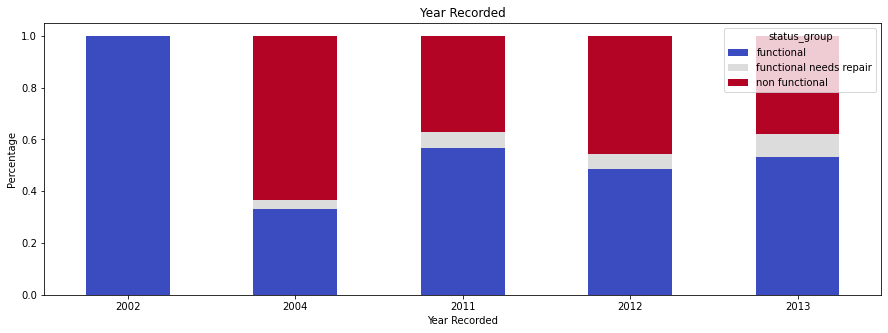

In [214]:
#plot
pd.crosstab(df['year_recorded'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               rot = 0,
                                                                               title = 'Year Recorded',
                                                                               xlabel = 'Year Recorded',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/year_recorded_crosstab')

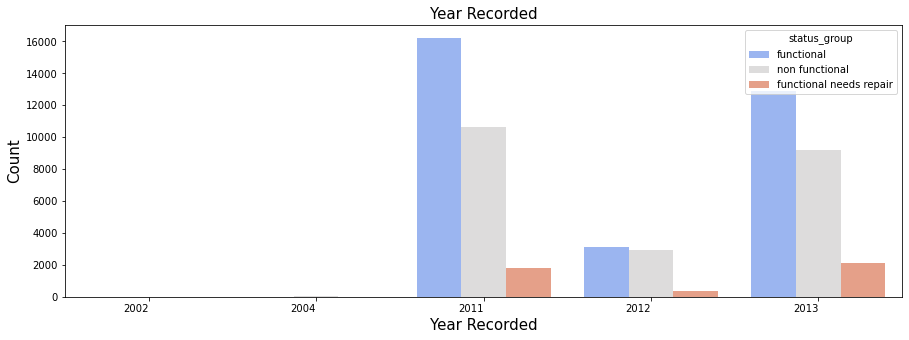

In [215]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'year_recorded', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Year Recorded', fontsize = 15)
plt.xlabel('Year Recorded', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/year_recorded_countplot')

In [216]:
#drop 'date_recoreded' because we don't need it anymore
df.drop(columns = 'date_recorded', axis = 1, inplace = True)

## **'funder'**
Who funded the well

In [217]:
#get value count
print(df['funder'].value_counts(normalize = True))

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
                            ...   
Mwita Machota             0.000018
Prof. Saluati             0.000018
Tadeo                     0.000018
Subvillage                0.000018
Shule Ya Msingi Ufala     0.000018
Name: funder, Length: 1897, dtype: float64


In [218]:
#'funder' has missing values
print('Missing values before:', df['funder'].isna().sum())

#fill missing values with 'other'
df['funder'].fillna('other', inplace = True)
print('Missing values after:', df['funder'].isna().sum())

Missing values before: 3635
Missing values after: 0


<AxesSubplot:>

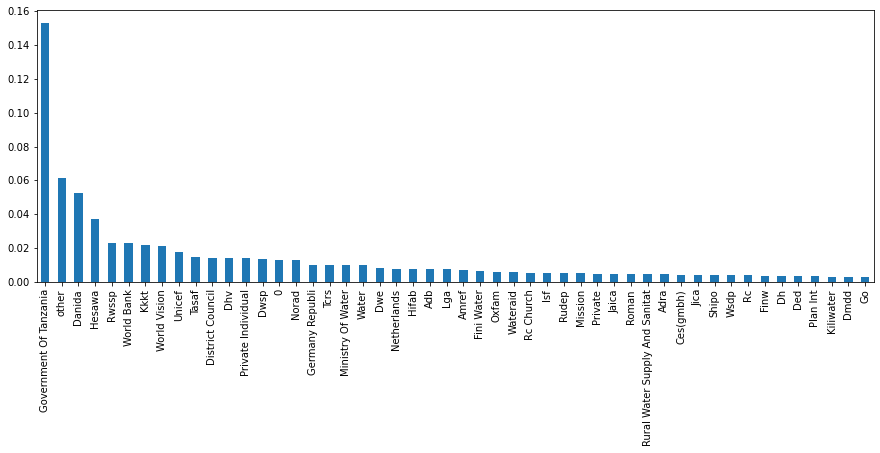

In [219]:
#get 50 
df['funder'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

Majority of wells are funded by the Government of Tanzania. 

In [220]:
#capitalization is inconsistent so we make everything lowercase to fix this
df['funder'] = df['funder'].astype(str).str.lower()

In [221]:
#replace 0 value with 'other'
df['funder'].replace('0', 'other', inplace = True)

In [222]:
#fix mispelling
df['funder'].replace('rural water supply and sanitat', 'rural water supply and sanitation', inplace = True)

In [223]:
#look for variation
df['funder'][df['funder'].str.contains("world vision", na = False)].unique()

array(['world vision', 'world vision/ kkkt', 'world vision/adra',
       'world vision/rc church', 'government /world vision'], dtype=object)

In [224]:
#fix variation
df['funder'].replace(to_replace = ('world vision', 'world vision/ kkkt', 'world vision/adra',
                                   'world vision/rc church', 'government /world vision'),
                     value = 'world vision', inplace = True)

In [225]:
#look for variation
df['funder'][df['funder'].str.contains("world bank", na = False)].unique()

array(['world bank', 'government/ world bank', 'world bank/government'],
      dtype=object)

In [226]:
#fix variation
df['funder'].replace(to_replace = ('world bank', 'government/ world bank', 'world bank/government'),
                     value = 'world vision', inplace = True)

In [227]:
#look for variation
df['funder'][df['funder'].str.contains("fin", na = False)].unique()

array(['fini water', 'finw', 'fin water', 'finn water', 'finland',
       'finwater', 'finidagermantanzania govt',
       'finida german tanzania govt', 'finland government', 'marafin'],
      dtype=object)

In [228]:
#fix variation
df['funder'].replace(to_replace = ('fini water', 'finw', 'fin water', 'finn water', 'finland',
                                   'finwater', 'finidagermantanzania govt', 'finland government'),
                     value = 'finland', inplace = True)

In [229]:
#look for variation
df['funder'][df['funder'].str.contains("germany", na = False)].unique()

array(['germany republi', 'germany', 'a/co germany', 'aco/germany',
       'germany misionary', 'germany cristians',
       'bingo foundation germany', 'africa project ev germany',
       'germany missionary'], dtype=object)

In [230]:
#fix variation
df['funder'].replace(to_replace = ('germany republic', 'germany', 'a/co germany', 'aco/germany',
                                   'germany misionary', 'germany cristians',
                                   'bingo foundation germany', 'africa project ev germany',
                                   'germany missionary'),
                     value = 'germany', inplace = True)

In [231]:
#look for variation
df['funder'][df['funder'].str.contains("private", na = False)].unique()

array(['private', 'private individual', 'private owned', 'private person',
       'private co', 'private individul', 'private institutions'],
      dtype=object)

In [232]:
#fix variation
df['funder'].replace(to_replace = ('private', 'private owned', 'private person', 'private co',
                                   'private individul', 'private institutions'),
                     value = 'private', inplace = True)

In [233]:
#look for variation
df['funder'][df['funder'].str.contains("dan", na = False)].unique()

array(['danida', 'ms-danish', 'danida /government', 'unhcr/danida',
       'tassaf/ danida'], dtype=object)

In [234]:
#fix variation
df['funder'].replace(to_replace = ('danida', 'danida /government', 'unhcr/danida', 'tassaf/ danida'),
                     value = 'danida', inplace = True)

In [235]:
#look for variation
df['funder'][df['funder'].str.contains("kkk", na = False)].unique()

array(['kkkt_makwale', 'kkkt', 'kkkt-dioces ya pare', 'kkkt church',
       'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme', 'kkkt canal',
       'kkkt usa', 'kkkt mareu'], dtype=object)

In [236]:
#fix variation
df['funder'].replace(to_replace = ('kkkt_makwale', 'kkkt', 'kkkt-dioces ya pare', 'kkkt church',
                                   'kkkt leguruki', 'kkkt ndrumangeni', 'kkkt dme', 'kkkt canal',
                                   'kkkt usa', 'kkkt mareu'),
                     value = 'kkkt', inplace = True)

In [237]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def funder_grouped(var):
    if var in df['funder'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'

In [238]:
#apply function to column
df['funder_group'] = df['funder'].map(funder_grouped)

In [239]:
#check how many unique values
df['funder_group'].nunique()

20

In [240]:
df[['funder_group']].value_counts(normalize = True)

funder_group          
other                     0.501162
government of tanzania    0.152929
danida                    0.052593
world vision              0.044478
hesawa                    0.037071
kkkt                      0.025926
rwssp                     0.023131
unicef                    0.017795
tasaf                     0.014764
district council          0.014192
dhv                       0.013956
private individual        0.013906
dwsp                      0.013653
finland                   0.013266
norad                     0.012879
germany republi           0.010269
tcrs                      0.010135
ministry of water         0.009933
water                     0.009815
dwe                       0.008148
dtype: float64

In [241]:
#more exploration
pd.crosstab(df['funder_group'], df['status_group'], normalize = 'index')

status_group            functional  functional needs repair  non functional
funder_group                                                               
danida                    0.550576                 0.050896        0.398528
dhv                       0.565742                 0.071170        0.363088
district council          0.448399                 0.053381        0.498221
dwe                       0.444215                 0.049587        0.506198
dwsp                      0.457460                 0.277435        0.265105
finland                   0.163706                 0.031726        0.804569
germany republi           0.881967                 0.001639        0.116393
government of tanzania    0.409511                 0.077169        0.513320
hesawa                    0.425068                 0.105359        0.469573
kkkt                      0.562338                 0.053247        0.384416
ministry of water         0.325424                 0.032203        0.642373
norad                     0.338562                 0.215686        0.445752
other                     0.607410                 0.065404        0.327186
private individual        0.835351                 0.021792        0.142857
rwssp                     0.585881                 0.079330        0.334789
tasaf                     0.562144                 0.072976        0.364880
tcrs                      0.400332                 0.061462        0.538206
unicef                    0.567644                 0.093661        0.338694
water                     0.442539                 0.133791        0.423671
world vision              0.490916                 0.086298        0.422786

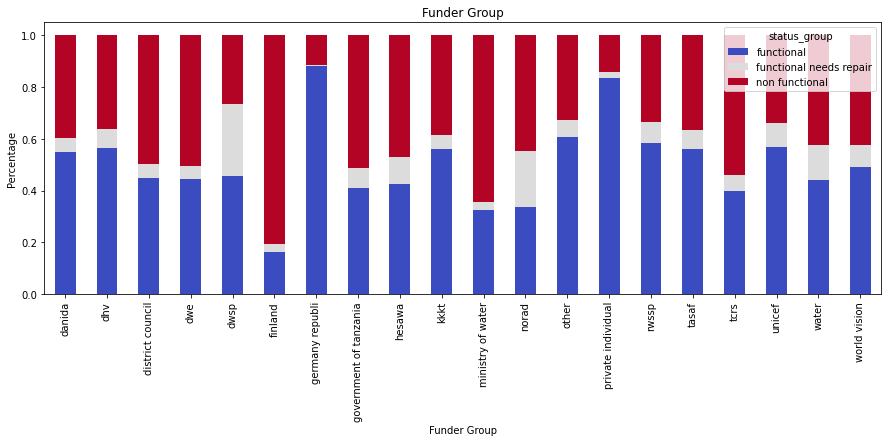

In [242]:
#plot
pd.crosstab(df['funder_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Funder Group',
                                                                               xlabel = 'Funder Group',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/funder_group_crosstab')

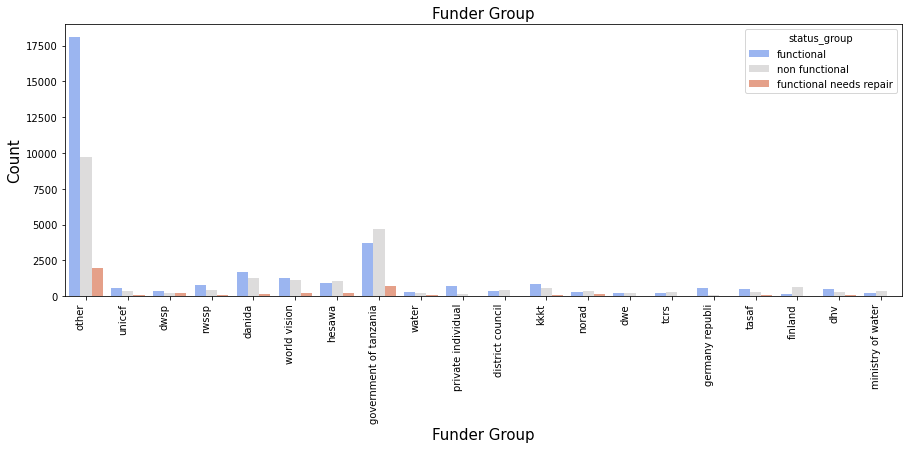

In [243]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'funder_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/funder_group_countplot')

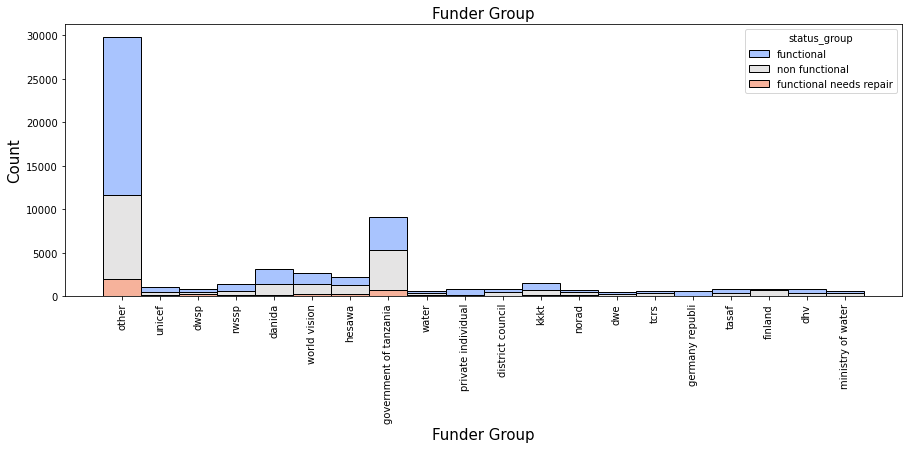

In [244]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'funder_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/funder_group_histplot')

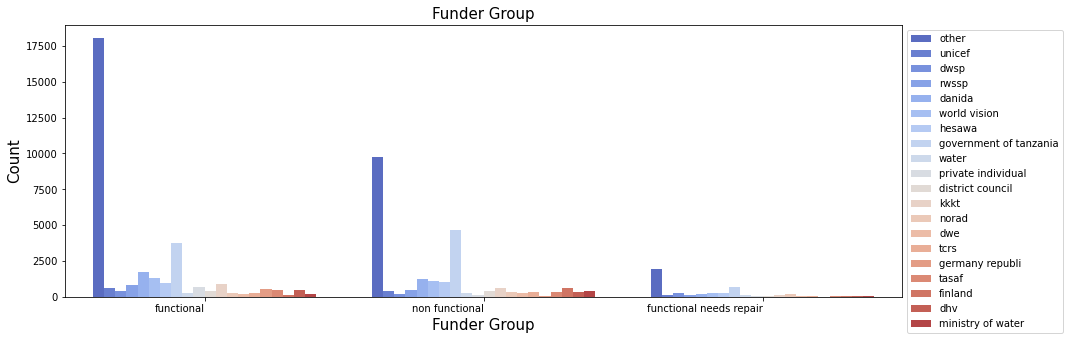

In [245]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'funder_group', data = df, palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/funder_group_countplot')

## **'gps_height'**
Altitude of the well

In [246]:
#get value counts
df['gps_height'].value_counts(normalize = True)

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

In [247]:
#check how many unique values
df['gps_height'].nunique()

2428

<AxesSubplot:>

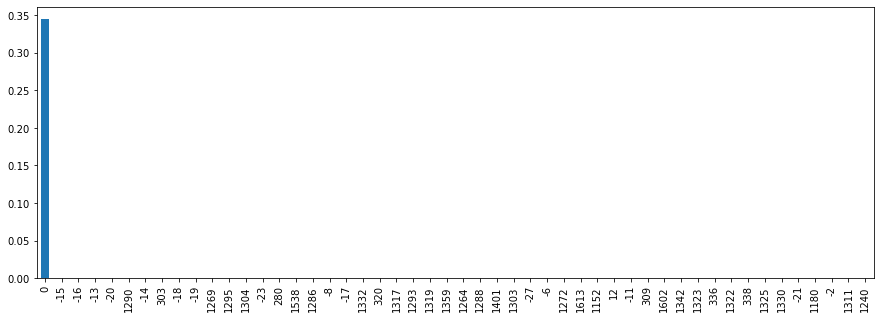

In [248]:
#get top 50
df['gps_height'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [249]:
#get how many entries are 0
len(df[df['gps_height'] == 0]) / len(df)

0.3440740740740741

In [250]:
#more exploration excluding 0
pd.crosstab(df['gps_height'][df['gps_height'] != 0], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
gps_height                                                       
-90                  1.0                      0.0             0.0
-63                  1.0                      0.0             0.0
-59                  0.0                      0.0             1.0
-57                  1.0                      0.0             0.0
-55                  0.0                      0.0             1.0
...                  ...                      ...             ...
 2623                1.0                      0.0             0.0
 2626                1.0                      0.0             0.0
 2627                0.0                      0.0             1.0
 2628                1.0                      0.0             0.0
 2770                0.0                      1.0             0.0

[2427 rows x 3 columns]

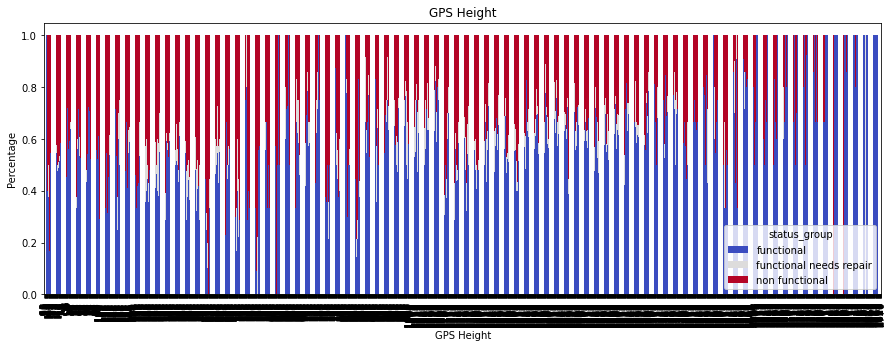

In [251]:
#plot
pd.crosstab(df['gps_height'][df['gps_height'] != 0], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'GPS Height',
                                                                               xlabel = 'GPS Height',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/gps_height_crosstab')

## **'installer'**
Organization that installed the well

In [252]:
#get value count
df['installer'].value_counts(normalize = True)

DWE                      0.312171
Government               0.032738
RWE                      0.021634
Commu                    0.019015
DANIDA                   0.018836
                           ...   
Village Govt             0.000018
DSPU                     0.000018
NGINIL                   0.000018
Crety                    0.000018
Quick win/halmashauri    0.000018
Name: installer, Length: 2145, dtype: float64

In [253]:
#'installer' has missing values
print('Missing values before:', df['installer'].isna().sum())

#fill missing values with 'other'
df['installer'].fillna('other', inplace = True)
print('Missing values after:', df['installer'].isna().sum())

Missing values before: 3655
Missing values after: 0


<AxesSubplot:>

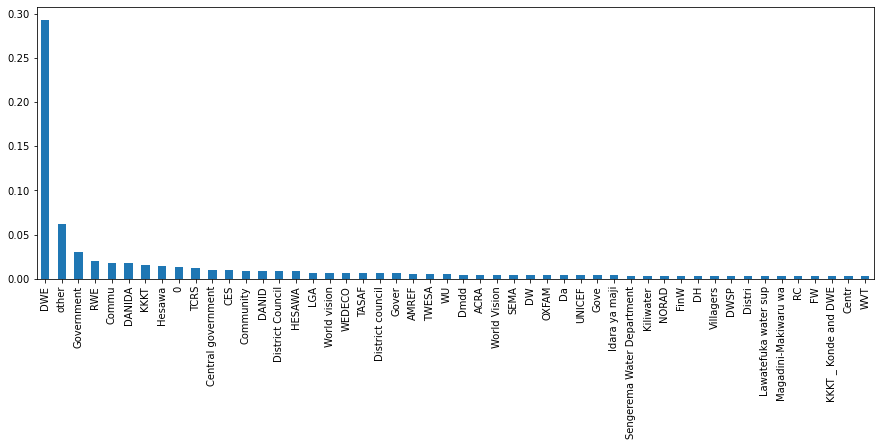

In [254]:
#get top 50 
df['installer'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [255]:
#capitalization is inconsistent so we make everything lowercase to fix this
df['installer'] = df['installer'].astype(str).str.lower()

In [256]:
#replace 0 value with 'other'
df['installer'].replace('0', 'other', inplace = True)

In [257]:
#look for variation
df['installer'][df['installer'].str.contains("rc", na = False)].unique()

array(['rc church', 'rc churc', 'rcchurch/cefa', 'irc', 'rc', 'rc ch',
       'hw/rc', 'rc church/central gover', 'kkkt church',
       'grobal resource alliance', 'tsrc', 'pentecost church',
       'roman church', 'rc/mission', 'rc church/cefa', 'lutheran church',
       'free pentecoste church of tanz', 'rc c', 'tag church', 'church',
       'rc cathoric', 'morovian church', 'cefa/rc church', 'rc mission',
       'anglican church', 'church of disciples', 'anglikana church',
       'global resource construction', 'cetral government /rc',
       'pentecostal church', 'cg/rc', 'grobal resource  alliance',
       'rc missionary', 'sda church', 'methodist church', 'trc',
       'rc msufi', 'haidomu lutheran church', 'baptist church',
       'rc church brother', 'st magreth church', 'anglica church',
       'global resource co', 'rc mi', 'baptist church of tanzania',
       'fpct church', 'rc njoro', 'rc .church', 'rc mis', 'batist church',
       'churc', 'dwe/anglican church'], dtype=obj

In [258]:
#fix variation
df['installer'].replace(to_replace = ('rc church', 'rc churc', 'rcchurch/cefa', 'irc', 'rc', 'rc ch',
                                      'hw/rc', 'rc church/central gover', 'rc/mission', 'rc church/cefa', 
                                      'rc c', 'church', 'rc cathoric', 'cefa/rc church', 'rc mission',
                                      'cg/rc', 'rc missionary', 'rc msufi', 'rc church brother', 
                                      'rc mi', 'rc njoro', 'rc .church', 'rc mis', 'churc'),
                        value = 'rc church', inplace = True)

In [259]:
#look for variation
df['installer'][df['installer'].str.contains("fi", na = False)].unique()

array(['fini water', 'finw', 'fin water', 'finn water', 'marafip',
       'finwater', 'finland government', 'vifafi', 'vicfish ltd',
       'wafidh', 'vickfi', 'finland', 'filber', 'team rafiki', 'dfid',
       'fida', 'hamisi fidia', 'finwate', 'village office', 'marafin',
       'filex muganga'], dtype=object)

In [260]:
#fix variation
df['installer'].replace(to_replace = ('fini water', 'finw', 'fin water', 'finn water',
                                      'finwater', 'finland government', 'finland', 'finwate'), 
                        value = 'finland', inplace = True)

In [261]:
#look for variation
df['installer'][df['installer'].str.contains("gove", na = False)].unique()

array(['central government', 'government', 'gove', 'gover',
       'cipro/government', 'governme', 'adra /government',
       'japan government', 'isf/government', 'adra/government',
       'government /tcrs', 'tanzania government', 'government /community',
       'concern /government', 'belgiam government', 'goverm',
       'village government', 'italy government', 'cental government',
       'govern', 'cebtral government', 'british colonial government',
       'government /sda', 'tcrs /government', 'italian government',
       'tanzanian government', 'colonial government', 'misri government',
       'government and community', 'cetral government /rc',
       'concern/government', 'government of misri',
       'lwi &central government', 'british government',
       'egypt government', 'iran govern', 'governmen', 'government/tcrs',
       'government /world vision', 'centra government'], dtype=object)

In [262]:
#fix variation
df['installer'].replace(to_replace = ('central government', 'government', 'gove', 'gover',
                                      'governme', 'tanzania government', 'government /community',
                                      'concern /government', 'goverm', 'village government', 'cental government',
                                      'govern', 'cebtral government', 'tanzanian government',
                                      'government and community', 'cetral government /rc', 'concern/government',
                                      'lwi &central government', 'governmen', 'government/tcrs',
                                      'government /world vision', 'centra government'), 
                        value = 'tanzanian government', inplace = True)

In [263]:
#look for variation
df['installer'][df['installer'].str.contains("dw", na = False)].unique()

array(['dwe', 'dwsp', 'kkkt _ konde and dwe', 'rwe/dwe', 'rwedwe', 'dwe/',
       'dw', 'dwr', 'dwe}', 'dwt', 'dwe /tassaf', 'edward',
       'dwe/ubalozi wa marekani', 'consultant and dwe', 'dwe & lwi',
       'rdws', 'ubalozi wa marekani /dwe', 'dwe&', 'dwe/tassaf', 'dw$',
       'goldwill  foundation', 'dw e', 'tcrs/dwe', 'dw#', 'dweb',
       'tcrs /dwe', 'water aid/dwe', 'dww', 'dwe/anglican church'],
      dtype=object)

In [264]:
df['installer'].replace(to_replace = ('dwe', 'dwsp', 'kkkt _ konde and dwe', 'rwe/dwe', 'rwedwe', 'dwe/',
                                      'dw', 'dwr', 'dwe}', 'dwt', 'dwe /tassaf', 'dwe/ubalozi wa marekani', 
                                      'consultant and dwe', 'dwe & lwi', 'ubalozi wa marekani /dwe', 
                                      'dwe&', 'dwe/tassaf', 'dw$', 'dw e', 'tcrs/dwe', 'dw#', 'dweb',
                                      'tcrs /dwe', 'water aid/dwe', 'dww', 'dwe/anglican church'), 
                        value = 'dwe', inplace = True)

In [265]:
#look for variation
df['installer'][df['installer'].str.contains("dan", na = False)].unique()

array(['danida', 'danid', 'ndanda missions', 'danda', 'daniel',
       'danida co', 'danny', 'daniad', 'dannida', 'danids',
       'village water attendant'], dtype=object)

In [266]:
#fix variation
df['installer'].replace(to_replace = ('danida', 'danid', 'ndanda missions', 'danda',
                                      'danida co', 'daniad', 'dannida', 'danids'), 
                        value = 'danida', inplace = True)

In [267]:
#look for variation
df['installer'][df['installer'].str.contains("kk", na = False)].unique()

array(['kkkt', 'kkt c', 'kkkt-dioces ya pare', 'kkkt church',
       'kkkt leguruki', 'kkt', 'kkkt ndrumangeni', 'kkkt dme', 'kk',
       'kkkt kilinga', 'kkkt canal', 'kkkt katiti juu', 'kkkt mareu'],
      dtype=object)

In [268]:
#fix variation
df['installer'].replace(to_replace = ('kkkt', 'kkt c', 'kkkt-dioces ya pare', 'kkkt church',
                                      'kkkt leguruki', 'kkt', 'kkkt ndrumangeni', 'kkkt dme', 'kk',
                                      'kkkt kilinga', 'kkkt canal', 'kkkt katiti juu', 'kkkt mareu'), 
                        value = 'kkkt', inplace = True)

In [269]:
#look for variation
df['installer'][df['installer'].str.contains("comm", na = False)].unique()

array(['commu', 'olgilai village community', 'adra /community',
       'community', 'adra/community', 'rwe/ community',
       'killflora /community', 'communit', 'taboma/community',
       'arab community', 'adra/ community', 'sekei village community',
       'rwe/community', 'arabs community', 'village community',
       'dads/village community', 'killflora/ community',
       'mtuwasa and community', 'rwe /community', 'ilwilo community',
       'summit for water/community', 'igolola community',
       'ngiresi village community', 'rwe community',
       'african realief committe of ku', 'twesa /community',
       'shelisheli commission', 'twesa/ community', 'marumbo community',
       'community bank', 'kitiangare village community',
       'oldadai village community', 'twesa/community', 'tlc/community',
       'maseka community', 'islamic community', 'district community j',
       'village water commission', 'village community members',
       'tcrs/village community', 'village wat

In [270]:
#fix variation
df['installer'].replace(to_replace = ('commu', 'olgilai village community', 'adra /community',
       'community', 'adra/community', 'rwe/ community',
       'killflora /community', 'communit', 'taboma/community',
       'arab community', 'adra/ community', 'sekei village community',
       'rwe/community', 'arabs community', 'village community',
       'dads/village community', 'killflora/ community',
       'mtuwasa and community', 'rwe /community', 'ilwilo community',
       'summit for water/community', 'igolola community',
       'ngiresi village community', 'rwe community',
       'african realief committe of ku', 'twesa /community',
       'shelisheli commission', 'twesa/ community', 'marumbo community',
       'community bank', 'kitiangare village community',
       'oldadai village community', 'twesa/community', 'tlc/community',
       'maseka community', 'islamic community', 'district community j',
       'village water commission', 'village community members',
       'tcrs/village community', 'village water committee'), 
                        value = 'community', inplace = True)

In [271]:
#look for variation
df['installer'][df['installer'].str.contains("dist", na = False)].unique()

array(['district council', 'district counci', 'district water department',
       'distri', 'district water depar', 'mbulu district council',
       'serengeti district concil', 'distric water department',
       'sangea district coun', 'songea district coun',
       'district  council', 'mbozi district council',
       'wb / district council', 'methodist church'], dtype=object)

In [272]:
#fix variation
df['installer'].replace(to_replace = ('district council', 'district counci', 'district water department',
                                      'distri', 'district water depar', 'mbulu district council',
                                      'serengeti district concil', 'distric water department',
                                      'sangea district coun', 'songea district coun',
                                      'district  council', 'mbozi district council',
                                      'wb / district council'), 
                        value = 'district council', inplace = True)

In [273]:
#look for variation
df['installer'][df['installer'].str.contains("cen", na = False)].unique()

array(['central govt', 'centr', 'central basin', 'concen', 'centra govt',
       'nyabibuye islamic center'], dtype=object)

In [274]:
#fix variation
df['installer'].replace(to_replace = ('central govt', 'centr', 'rc church/central gover',
                                      'central basin', 'concen', 'centra govt'), 
                        value = 'central government', inplace = True)

In [275]:
#look for variation
df['installer'][df['installer'].str.contains("priv", na = False)].unique()

array(['private', 'priva', 'private individuals', 'private owned',
       'private technician', 'private person', 'priv', 'privat',
       'private company', 'private institutions'], dtype=object)

In [276]:
#fix variation
df['installer'].replace(to_replace = ('private', 'priva', 'private individuals', 'private owned',
                                      'private technician', 'private person', 'priv', 'privat',
                                      'private company', 'private institutions'), 
                        value = 'private', inplace = True)

In [277]:
#look for variation
df['installer'][df['installer'].str.contains("germ", na = False)].unique()

array(['germany', 'bingo foundation germany', 'germany missionary',
       'german', 'german missionsry', 'three way german'], dtype=object)

In [278]:
#fix variation
df['installer'].replace(to_replace = ('germany', 'bingo foundation germany', 'germany missionary',
                                      'german', 'german missionsry', 'three way german'), 
                        value = 'germany', inplace = True)

In [279]:
#look for variation
df['installer'][df['installer'].str.contains("world v", na = False)].unique()

array(['world vision', 'world vission', 'world visiin'], dtype=object)

In [280]:
#fix variation
df['installer'].replace(to_replace = ('world vision', 'world vission', 'world visiin'), 
                        value = 'world vision', inplace = True)

In [281]:
#look for variation
df['installer'][df['installer'].str.contains("world b", na = False)].unique()

array(['world bank', 'world banks'], dtype=object)

In [282]:
#fix variation
df['installer'].replace(to_replace = ('world bank', 'world banks'), 
                        value = 'world bank', inplace = True)

In [283]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def installer_grouped(var):
    if var in df['installer'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['installer_group'] = df['installer'].map(installer_grouped)

In [284]:
#check how many unique values
df['installer_group'].nunique()

20

In [285]:
df[['installer_group']].value_counts(normalize = True)

installer_group     
other                   0.392003
dwe                     0.305000
tanzanian government    0.058906
community               0.033232
danida                  0.028636
district council        0.023519
hesawa                  0.023485
rwe                     0.020303
kkkt                    0.017492
finland                 0.013502
world vision            0.011987
tcrs                    0.011902
ces                     0.010269
rc church               0.009343
amref                   0.007458
lga                     0.006953
tasaf                   0.006919
wedeco                  0.006700
dmdd                    0.006330
norad                   0.006061
dtype: float64

In [286]:
#more exploration
pd.crosstab(df['installer_group'], df['status_group'], normalize = 'index')

status_group          functional  functional needs repair  non functional
installer_group                                                          
amref                   0.426637                 0.013544        0.559819
ces                     0.881967                 0.001639        0.116393
community               0.654002                 0.047619        0.298379
danida                  0.611993                 0.055850        0.332158
district council        0.385111                 0.072298        0.542591
dmdd                    0.912234                 0.018617        0.069149
dwe                     0.542805                 0.089971        0.367224
finland                 0.158354                 0.042394        0.799252
hesawa                  0.563441                 0.038710        0.397849
kkkt                    0.477382                 0.075072        0.447546
lga                     0.254237                 0.196126        0.549637
norad                   0.430556                 0.127778        0.441667
other                   0.585957                 0.061971        0.352072
rc church               0.776577                 0.055856        0.167568
rwe                     0.252073                 0.113599        0.634328
tanzanian government    0.342955                 0.086882        0.570163
tasaf                   0.579075                 0.065693        0.355231
tcrs                    0.410184                 0.059406        0.530410
wedeco                  0.680905                 0.042714        0.276382
world vision            0.615169                 0.125000        0.259831

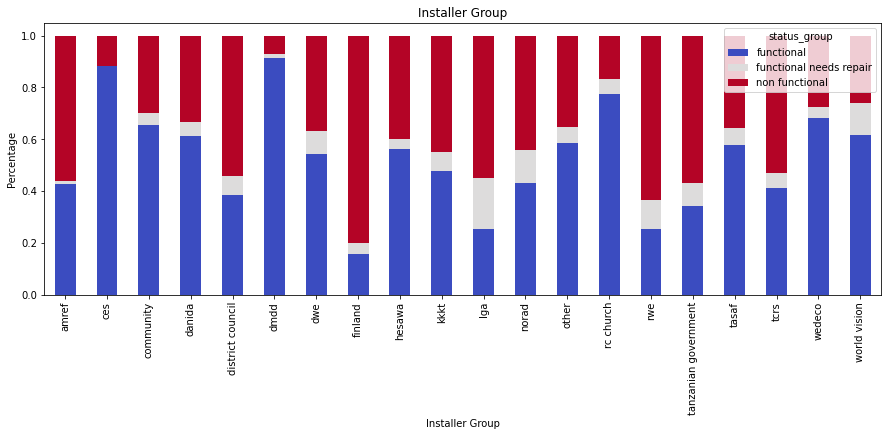

In [287]:
#plot
pd.crosstab(df['installer_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Installer Group',
                                                                               xlabel = 'Installer Group',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/installer_group_crosstab')

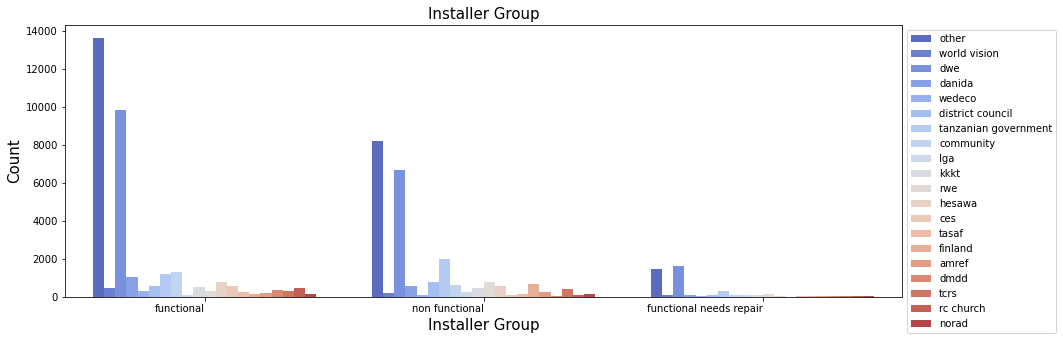

In [288]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'installer_group', data = df, palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/installer_group_countplot')

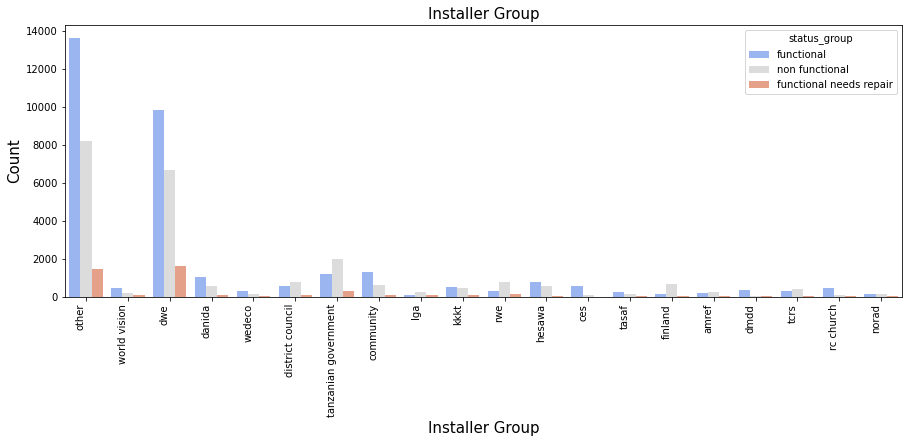

In [289]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'installer_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/installer_group_countplot')

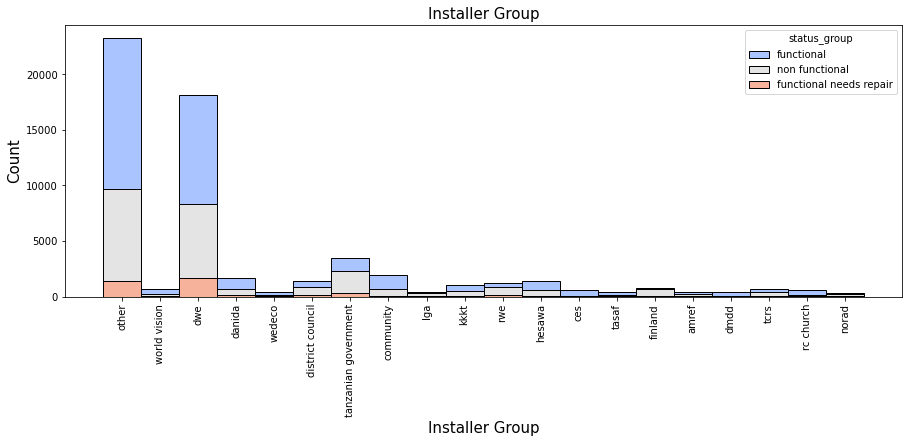

In [290]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'installer_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/installer_group_histplot')

## **'wpt_name'**
Name of the waterpoint if there is one

In [291]:
#get value count
df['wpt_name'].value_counts(normalize = True)

none                 0.059983
Shuleni              0.029428
Zahanati             0.013973
Msikitini            0.009007
Kanisani             0.005438
                       ...   
Kwa John Malya       0.000017
Charles Nziku        0.000017
N`Gambo              0.000017
Shuleni Lugeye Pm    0.000017
Uyanjo               0.000017
Name: wpt_name, Length: 37400, dtype: float64

<AxesSubplot:>

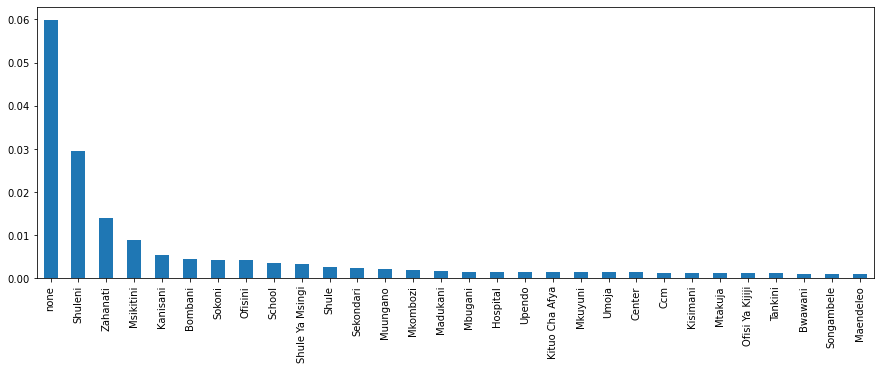

In [292]:
#get top 30 
df['wpt_name'].value_counts(normalize = True).head(30).plot.bar(figsize = (15, 5))

In [293]:
#get how many entries are 'none'
len(df[df['wpt_name'] == 'none']) / len(df)

0.059983164983164985

In [294]:
#replace 'none' to 'other'
df['wpt_name'].replace('none', 'other', inplace = True)

In [295]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def wpt_name_grouped(var):
    if var in df['wpt_name'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['wpt_name_group'] = df['wpt_name'].map(wpt_name_grouped)

In [296]:
#check how many unique values
df['wpt_name_group'].nunique()

20

In [297]:
df[['wpt_name_group']].value_counts(normalize = True)

wpt_name_group 
other              0.903485
Shuleni            0.029428
Zahanati           0.013973
Msikitini          0.009007
Kanisani           0.005438
Bombani            0.004562
Sokoni             0.004377
Ofisini            0.004276
School             0.003502
Shule Ya Msingi    0.003350
Shule              0.002559
Sekondari          0.002458
Muungano           0.002239
Mkombozi           0.001869
Madukani           0.001751
Mbugani            0.001582
Hospital           0.001582
Upendo             0.001566
Kituo Cha Afya     0.001515
Mkuyuni            0.001481
dtype: float64

In [298]:
#more exploration
pd.crosstab(df['wpt_name_group'], df['status_group'], normalize = 'index')

status_group     functional  functional needs repair  non functional
wpt_name_group                                                      
Bombani            0.583026                 0.077491        0.339483
Hospital           0.595745                 0.021277        0.382979
Kanisani           0.479876                 0.065015        0.455108
Kituo Cha Afya     0.600000                 0.055556        0.344444
Madukani           0.500000                 0.076923        0.423077
Mbugani            0.425532                 0.117021        0.457447
Mkombozi           0.630631                 0.171171        0.198198
Mkuyuni            0.568182                 0.079545        0.352273
Msikitini          0.491589                 0.082243        0.426168
Muungano           0.646617                 0.248120        0.105263
Ofisini            0.433071                 0.043307        0.523622
School             0.418269                 0.062500        0.519231
Sekondari          0.691781                 0.027397        0.280822
Shule              0.513158                 0.144737        0.342105
Shule Ya Msingi    0.522613                 0.110553        0.366834
Shuleni            0.491419                 0.081808        0.426773
Sokoni             0.461538                 0.100000        0.438462
Upendo             0.666667                 0.193548        0.139785
Zahanati           0.518072                 0.093976        0.387952
other              0.546407                 0.070975        0.382619

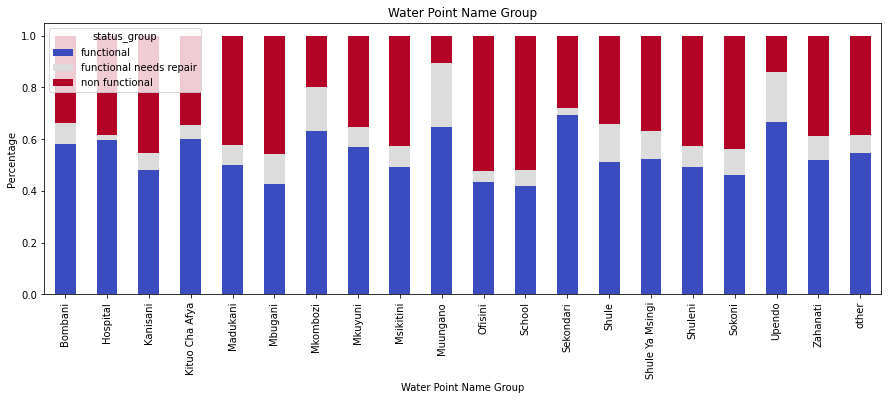

In [299]:
#plot
pd.crosstab(df['wpt_name_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Water Point Name Group',
                                                                               xlabel = 'Water Point Name Group',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/wpt_name_group_crosstab')

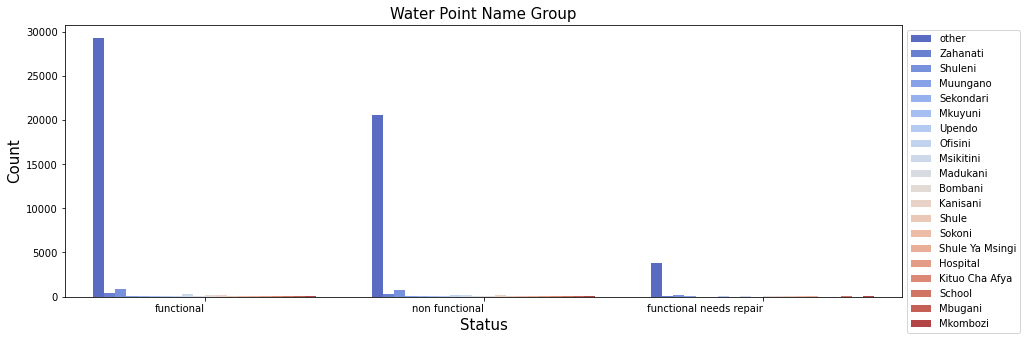

In [300]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'wpt_name_group', data = df, palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/wpt_name_group_countplot')

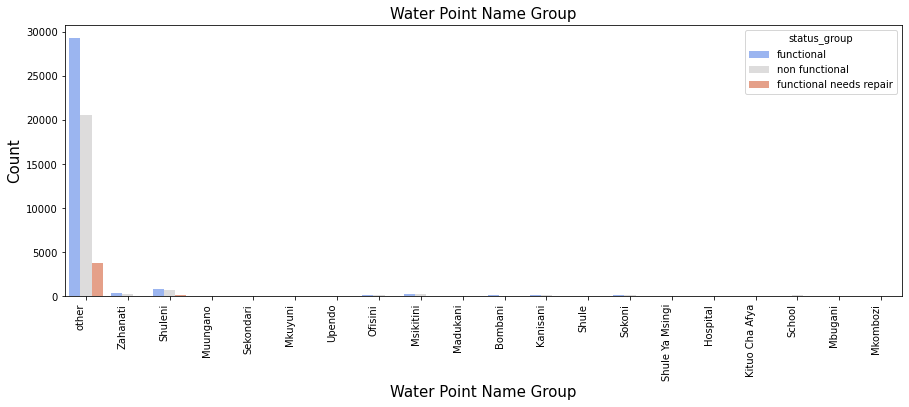

In [301]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'wpt_name_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Water Point Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/wpt_name_group_countplot')

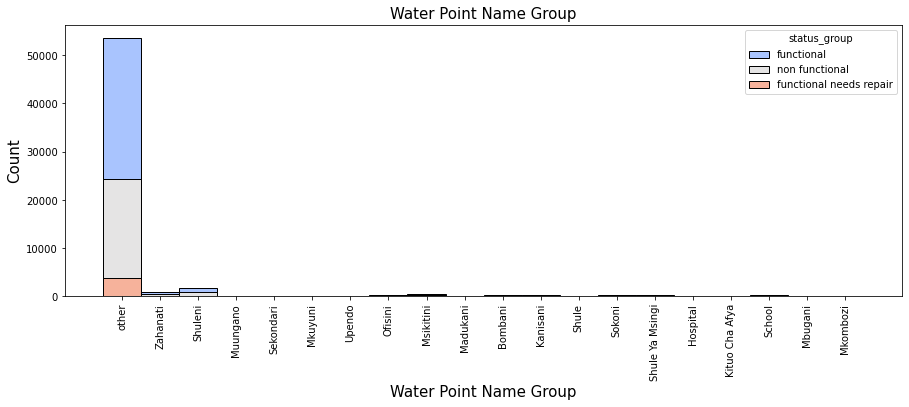

In [302]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'wpt_name_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Water Point Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/wpt_name_group_histplot')

## **'num_private'**

In [303]:
#get value count
df['num_private'].value_counts(normalize = True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

In [304]:
#check how many unique values
df['num_private'].nunique()

65

In [305]:
#percentage of 0 value
len(df[df['num_private'] == 0]) / len(df) * 100

98.72558922558923

In [306]:
#'num_private' has too many 0 values, drop it
df.drop(columns = 'num_private', axis = 1, inplace = True)

## **'basin'**
A topographic region in which all water drains to a common area.

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                     0.134276
Internal                   0.131061
Lake Tanganyika            0.108283
Wami / Ruvu                0.100791
Lake Nyasa                 0.085606
Ruvuma / Southern Coast    0.075640
Lake Rukwa                 0.041313
Name: basin, dtype: float64


<AxesSubplot:>

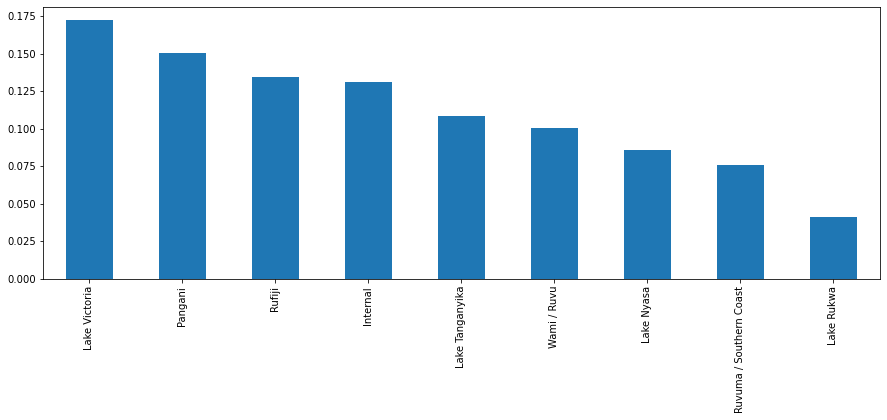

In [307]:
#get value count
print(df['basin'].value_counts(normalize = True))

#visualize
df['basin'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [308]:
#check how many unique values
df['basin'].nunique()

9

In [309]:
#more exploration
pd.crosstab(df['basin'], df['status_group'], normalize = 'index')

status_group             functional  functional needs repair  non functional
basin                                                                       
Internal                   0.575723                 0.071548        0.352730
Lake Nyasa                 0.653687                 0.049164        0.297148
Lake Rukwa                 0.407498                 0.110024        0.482478
Lake Tanganyika            0.483053                 0.115361        0.401586
Lake Victoria              0.497658                 0.096507        0.405835
Pangani                    0.600895                 0.053356        0.345749
Rufiji                     0.635406                 0.054789        0.309804
Ruvuma / Southern Coast    0.371689                 0.072557        0.555753
Wami / Ruvu                0.523802                 0.044931        0.431268

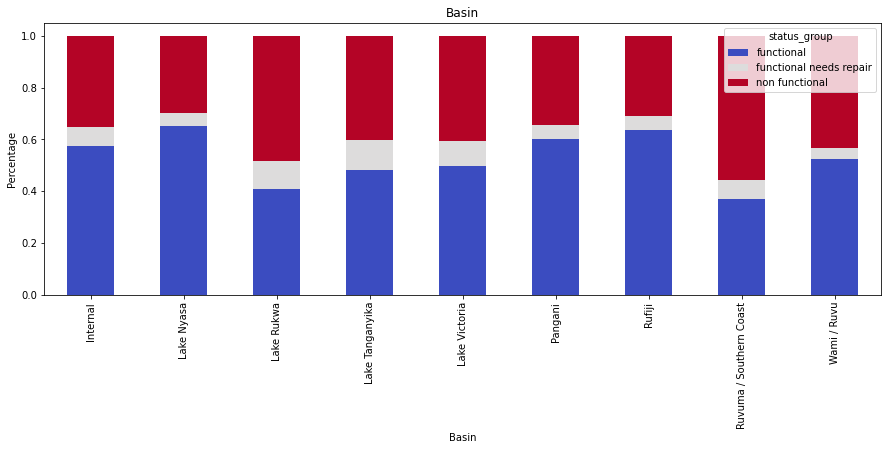

In [310]:
#plot
pd.crosstab(df['basin'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Basin',
                                                                               xlabel = 'Basin',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/basin_crosstab')

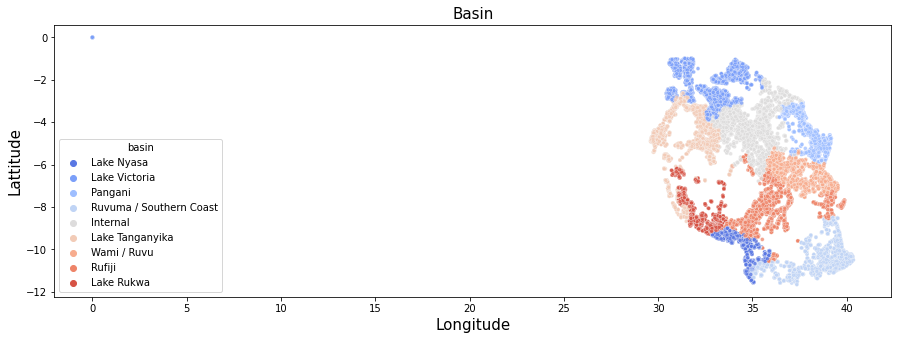

<Figure size 432x288 with 0 Axes>

In [311]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'basin', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/basin_scatterplot')

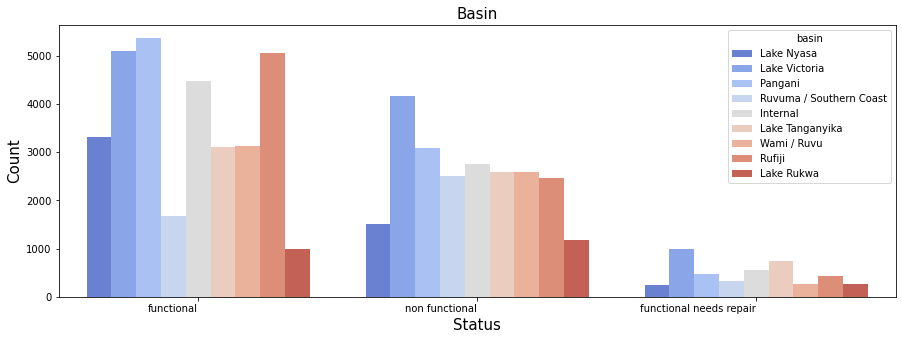

In [312]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'basin', data = df, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/basin_countplot')

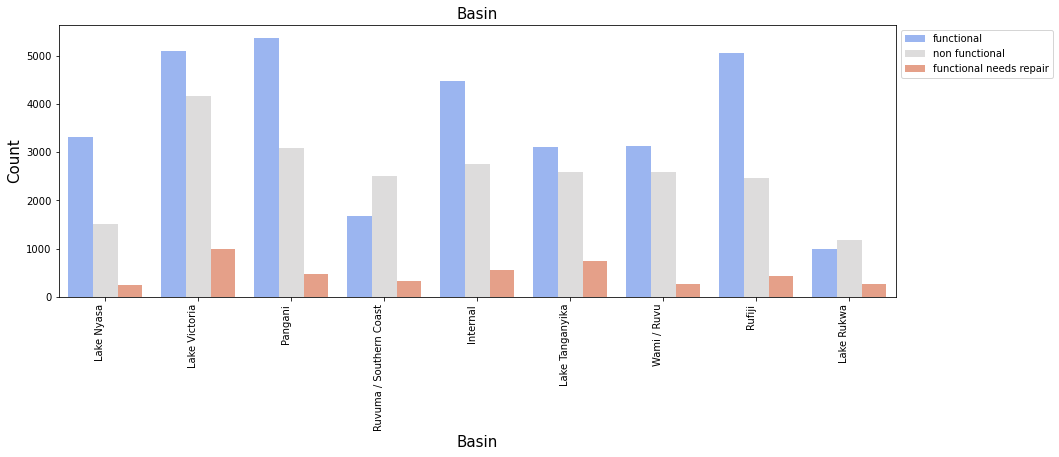

In [313]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'basin', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Basin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/basin_countplot')

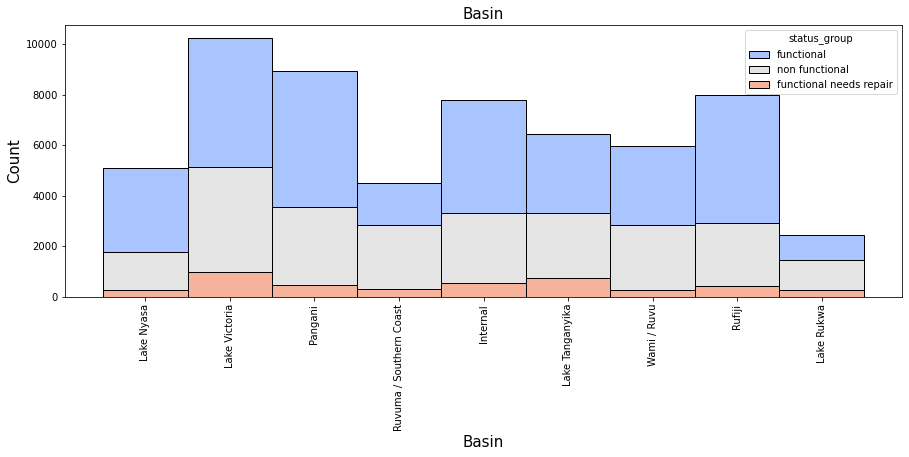

In [314]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'basin', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Basin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/basin_histplot')

## **'subvillage'**
Geographic location

In [315]:
#get value counts
df['subvillage'].value_counts(normalize = True)

Madukani      0.008606
Shuleni       0.008572
Majengo       0.008504
Kati          0.006319
Mtakuja       0.004438
                ...   
Kinangali     0.000017
Mimea         0.000017
Zunga         0.000017
Urumia        0.000017
Isasamambu    0.000017
Name: subvillage, Length: 19287, dtype: float64

In [316]:
#'subvillage' has missing values
print('Missing values before:', df['subvillage'].isna().sum())

#fill missing values with 'other'
df['subvillage'].fillna('other', inplace = True)
print('Missing values after:', df['subvillage'].isna().sum())

Missing values before: 371
Missing values after: 0


<AxesSubplot:>

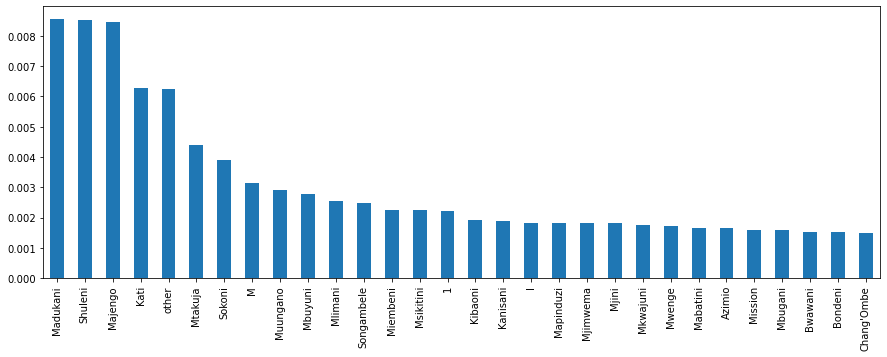

In [317]:
#get top 30 
df['subvillage'].value_counts(normalize = True).head(30).plot.bar(figsize = (15, 5))

In [318]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def subvillage_grouped(var):
    if var in df['subvillage'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['subvillage_group'] = df['subvillage'].map(subvillage_grouped)

In [319]:
#check how many unique values
df['subvillage_group'].nunique()

20

In [320]:
df[['subvillage_group']].value_counts(normalize = True)

subvillage_group
other               0.930034
Madukani            0.008552
Shuleni             0.008519
Majengo             0.008451
Kati                0.006279
Mtakuja             0.004411
Sokoni              0.003906
M                   0.003148
Muungano            0.002896
Mbuyuni             0.002761
Mlimani             0.002559
Songambele          0.002475
Miembeni            0.002256
Msikitini           0.002256
1                   0.002222
Kibaoni             0.001919
Kanisani            0.001869
Mapinduzi           0.001835
I                   0.001835
Mjimwema            0.001818
dtype: float64

In [321]:
#more exploration
pd.crosstab(df['subvillage_group'], df['status_group'], normalize = 'index')

status_group      functional  functional needs repair  non functional
subvillage_group                                                     
1                   0.393939                 0.060606        0.545455
I                   0.752294                 0.018349        0.229358
Kanisani            0.468468                 0.099099        0.432432
Kati                0.576408                 0.115282        0.308311
Kibaoni             0.552632                 0.052632        0.394737
M                   0.663102                 0.016043        0.320856
Madukani            0.488189                 0.084646        0.427165
Majengo             0.466135                 0.071713        0.462151
Mapinduzi           0.330275                 0.128440        0.541284
Mbuyuni             0.524390                 0.109756        0.365854
Miembeni            0.402985                 0.111940        0.485075
Mjimwema            0.685185                 0.111111        0.203704
Mlimani             0.592105                 0.046053        0.361842
Msikitini           0.440299                 0.074627        0.485075
Mtakuja             0.541985                 0.053435        0.404580
Muungano            0.459302                 0.075581        0.465116
Shuleni             0.456522                 0.086957        0.456522
Sokoni              0.478448                 0.056034        0.465517
Songambele          0.557823                 0.040816        0.401361
other               0.545670                 0.072388        0.381942

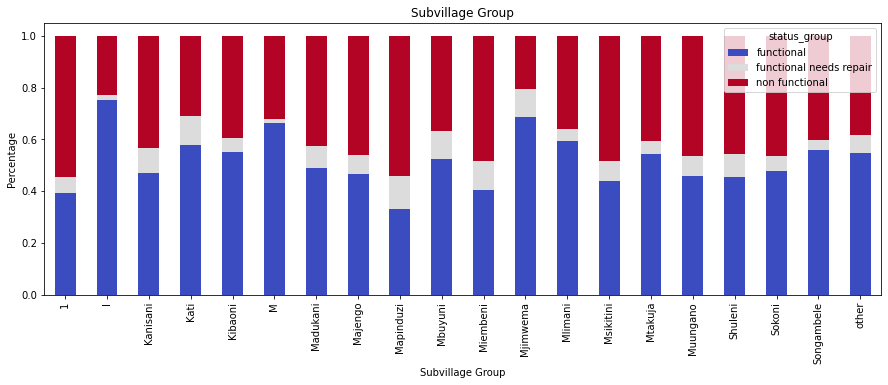

In [322]:
#plot
pd.crosstab(df['subvillage_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Subvillage Group',
                                                                               xlabel = 'Subvillage Group',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/subvillage_group_crosstab')

## 'region'
Geographic location

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64


<AxesSubplot:>

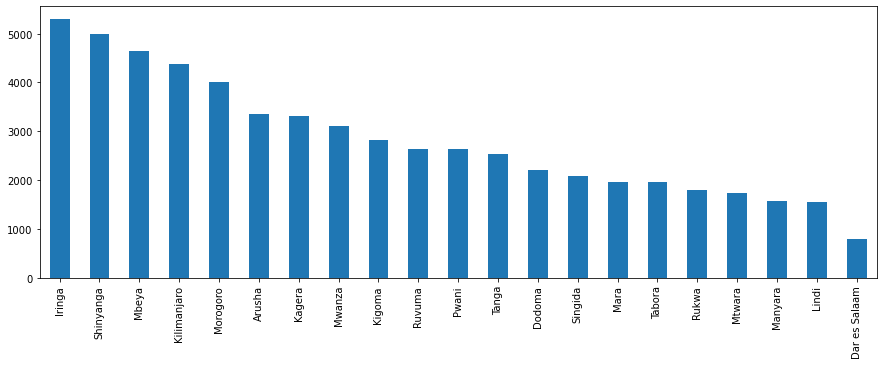

In [323]:
#get value count
print(df['region'].value_counts(normalize = True))

#visualize
df['region'].value_counts().plot.bar(figsize = (15, 5))

In [324]:
#check how many unique values
df['region'].nunique()

21

In [325]:
#more exploration
pd.crosstab(df['region'], df['status_group'], normalize = 'index')

status_group   functional  functional needs repair  non functional
region                                                            
Arusha           0.684776                 0.052239        0.262985
Dar es Salaam    0.572671                 0.003727        0.423602
Dodoma           0.458428                 0.094957        0.446615
Iringa           0.782206                 0.023234        0.194560
Kagera           0.520808                 0.091677        0.387515
Kigoma           0.484020                 0.214134        0.301847
Kilimanjaro      0.602877                 0.073533        0.323590
Lindi            0.297542                 0.060155        0.642303
Manyara          0.623500                 0.060644        0.315856
Mara             0.449975                 0.030472        0.519553
Mbeya            0.499892                 0.108644        0.391464
Morogoro         0.528957                 0.074888        0.396156
Mtwara           0.302890                 0.072832        0.624277
Mwanza           0.484204                 0.058994        0.456802
Pwani            0.590512                 0.013662        0.395825
Rukwa            0.391040                 0.074668        0.534292
Ruvuma           0.560606                 0.062121        0.377273
Shinyanga        0.559815                 0.127459        0.312726
Singida          0.483039                 0.061156        0.455805
Tabora           0.432874                 0.022971        0.544155
Tanga            0.563801                 0.028661        0.407538

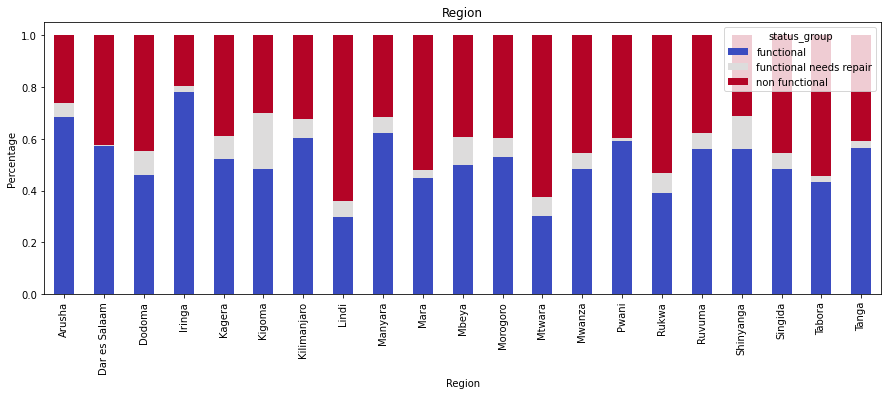

In [326]:
#plot
pd.crosstab(df['region'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True, 
                                                                               colormap = 'coolwarm',
                                                                               figsize = (15, 5),
                                                                               title = 'Region',
                                                                               xlabel = 'Region',
                                                                               ylabel = 'Percentage')
plt.savefig('./Data/region_crosstab')

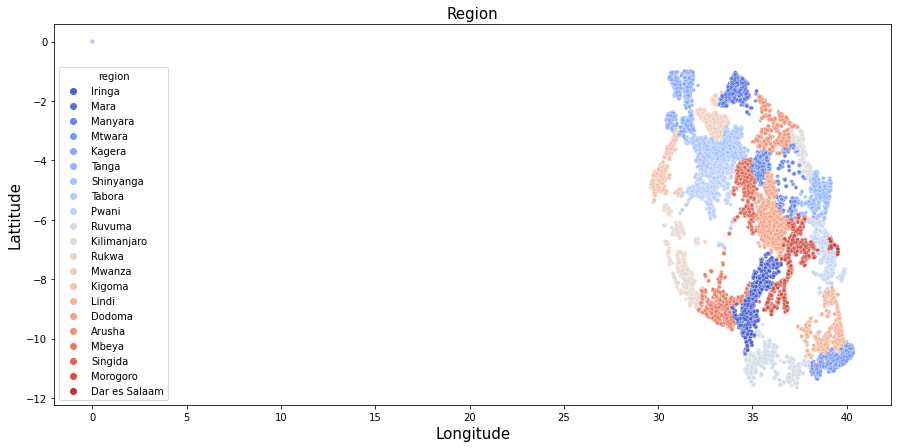

<Figure size 432x288 with 0 Axes>

In [327]:
#plot
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'region', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/region_scatterplot')

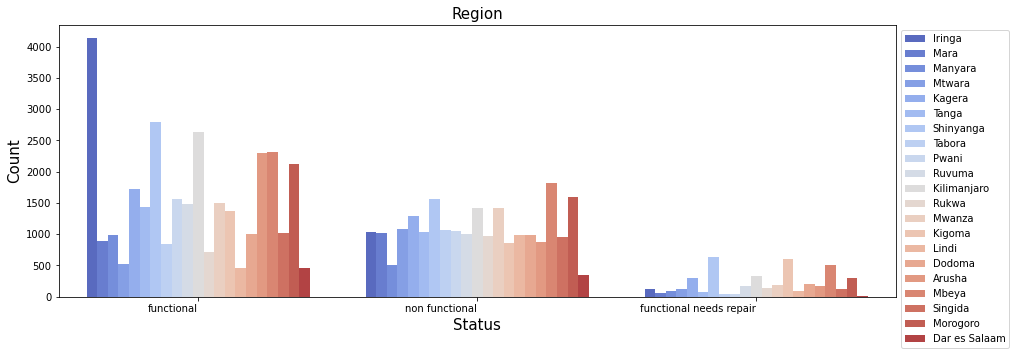

In [328]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'region', data = df, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/region_countplot')

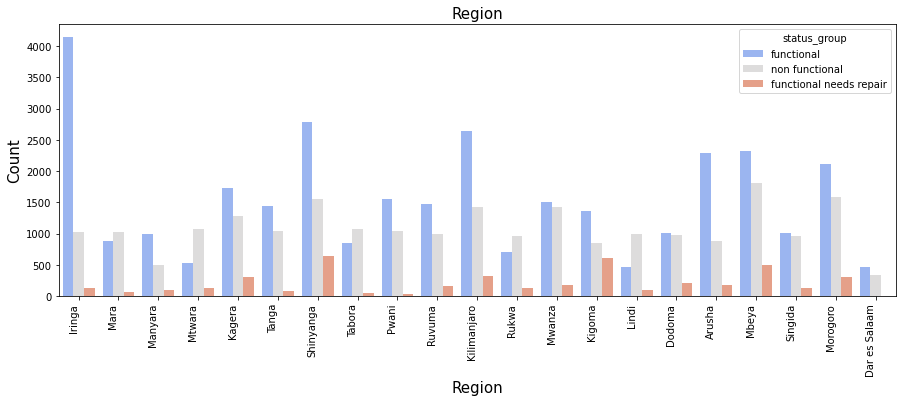

In [329]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/region_countplot')

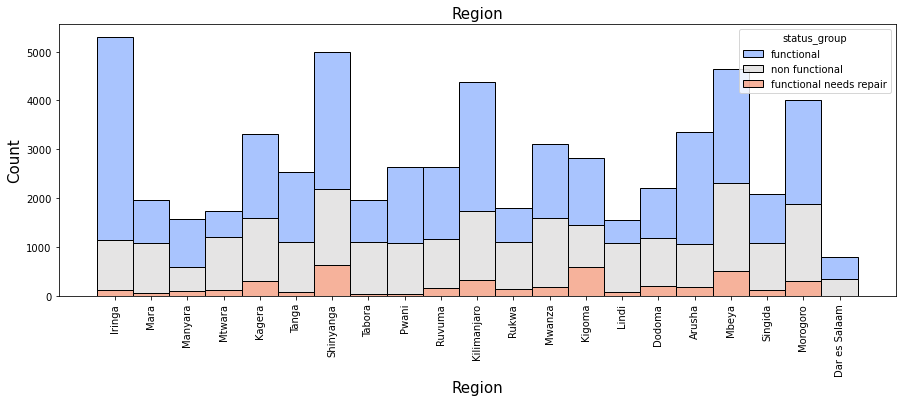

In [330]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'region', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/region_histplot')

## 'region_code'
Geographic location (coded)

11    0.089226
17    0.084360
12    0.078098
3     0.073721
5     0.068013
18    0.055960
19    0.051296
2     0.050909
16    0.047407
10    0.044444
4     0.042306
1     0.037054
13    0.035236
14    0.033316
20    0.033148
15    0.030438
6     0.027088
21    0.026650
80    0.020842
60    0.017256
90    0.015438
7     0.013552
99    0.007121
9     0.006566
24    0.005488
8     0.005051
40    0.000017
Name: region_code, dtype: float64


<AxesSubplot:>

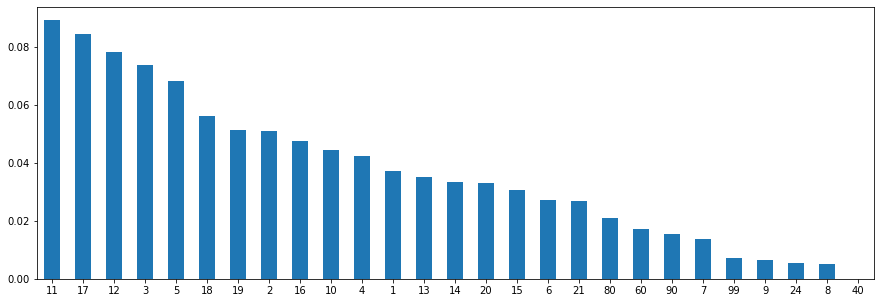

In [331]:
#get value count
print(df['region_code'].value_counts(normalize = True))

#visualize
df['region_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [332]:
#check how many unique values
df['region_code'].nunique()

27

In [333]:
#more exploration
pd.crosstab(df['region_code'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
region_code                                                      
1               0.458428                 0.094957        0.446615
2               0.654101                 0.057540        0.288360
3               0.602877                 0.073533        0.323590
4               0.560287                 0.029049        0.410665
5               0.531436                 0.074257        0.394307
6               0.662523                 0.009944        0.327533
7               0.572671                 0.003727        0.423602
8               0.086667                 0.050000        0.863333
9               0.356410                 0.053846        0.589744
10              0.560606                 0.062121        0.377273
11              0.781698                 0.023208        0.195094
12              0.499892                 0.108644        0.391464
13              0.483039                 0.061156        0.455805
14              0.435574                 0.023749        0.540677
15              0.391040                 0.074668        0.534292
16              0.484020                 0.214134        0.301847
17              0.560168                 0.127320        0.312512
18              0.520156                 0.091456        0.388387
19              0.481785                 0.058418        0.459797
20              0.449975                 0.030472        0.519553
21              0.623500                 0.060644        0.315856
24              0.969325                 0.003067        0.027607
40              0.000000                 0.000000        1.000000
60              0.478049                 0.019512        0.502439
80              0.348950                 0.063005        0.588045
90              0.211559                 0.106870        0.681570
99              0.451537                 0.016548        0.531915

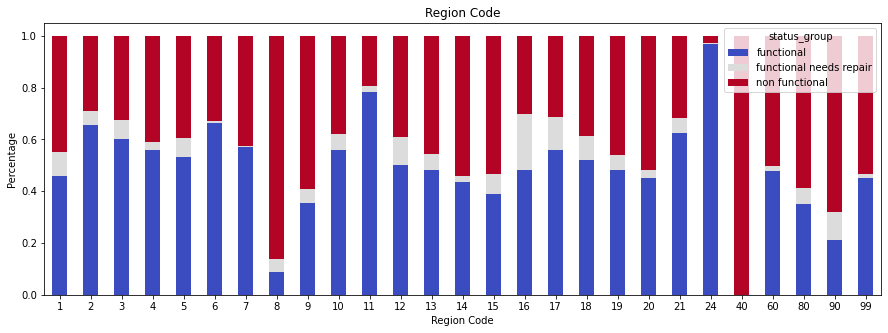

In [334]:
#plot
pd.crosstab(df['region_code'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,
                                                                             figsize = (15, 5),
                                                                             title = 'Region Code',
                                                                             xlabel = 'Region Code',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/region_code_crosstab')

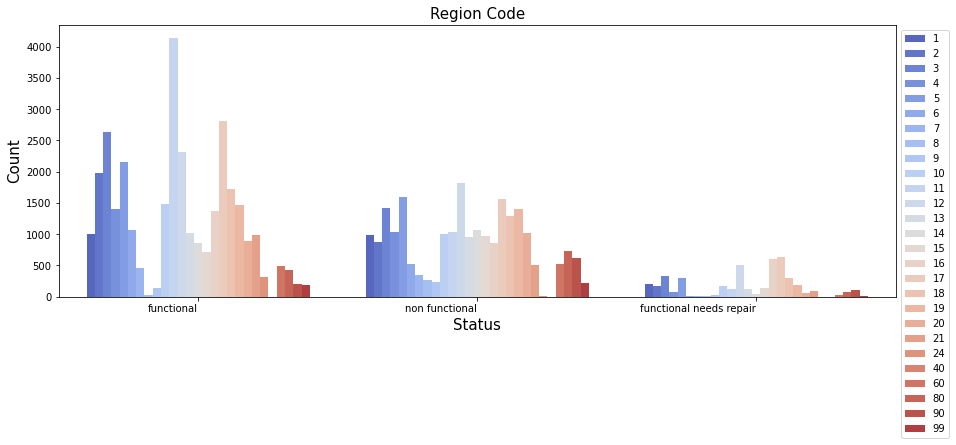

In [335]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'region_code', data = df, palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/region_code_countplot')

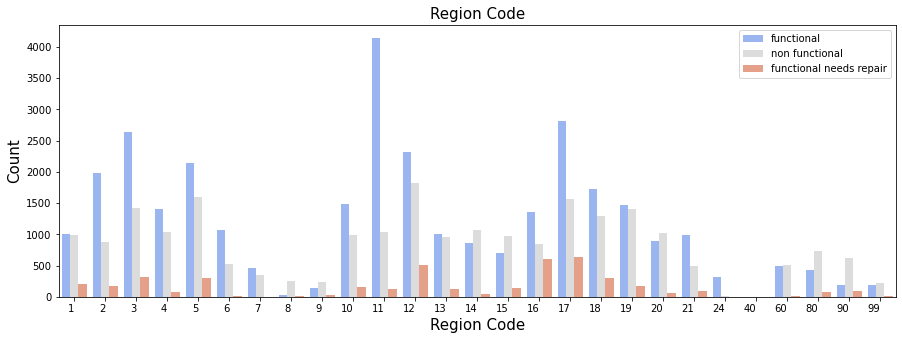

In [336]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region_code', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/region_code_countplot')

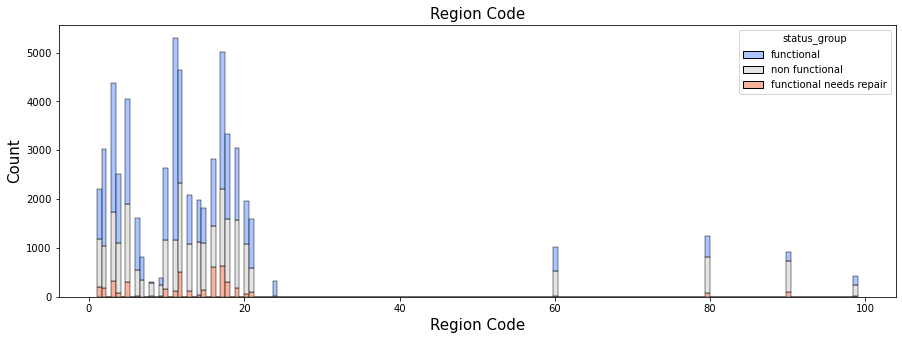

In [337]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'region_code', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/region_code_histplot')

## 'district_code'
Geographic location (coded)

1     0.205438
2     0.188098
3     0.168316
4     0.151498
5     0.073333
6     0.068586
7     0.056279
8     0.017559
30    0.016751
33    0.014714
53    0.012542
43    0.008502
13    0.006582
23    0.004933
63    0.003283
62    0.001835
60    0.001061
0     0.000387
80    0.000202
67    0.000101
Name: district_code, dtype: float64


<AxesSubplot:>

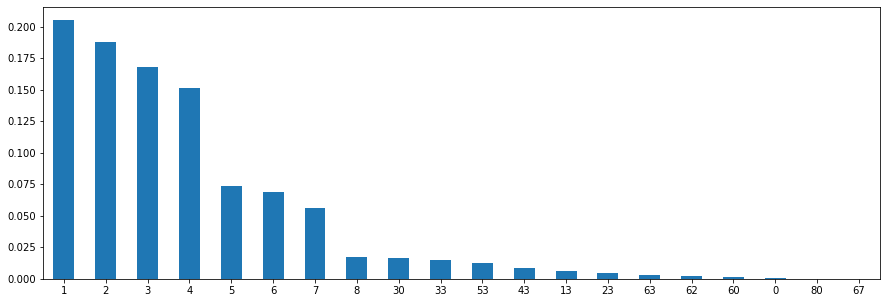

In [338]:
#get value count
print(df['district_code'].value_counts(normalize = True))

#visualize
df['district_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [339]:
#check how many unique values
df['district_code'].nunique()

20

In [340]:
#more exploration
pd.crosstab(df['district_code'], df['status_group'], normalize = 'index')

status_group   functional  functional needs repair  non functional
district_code                                                     
0                0.173913                 0.086957        0.739130
1                0.537409                 0.105466        0.357125
2                0.555178                 0.075539        0.369283
3                0.495499                 0.069914        0.434587
4                0.621736                 0.056562        0.321702
5                0.569100                 0.044536        0.386364
6                0.504418                 0.056946        0.438635
7                0.602453                 0.064014        0.333533
8                0.564717                 0.050815        0.384468
13               0.304348                 0.074169        0.621483
23               0.563140                 0.088737        0.348123
30               0.692462                 0.086432        0.221106
33               0.221968                 0.112128        0.665904
43               0.421782                 0.015842        0.562376
53               0.335570                 0.034899        0.629530
60               0.809524                 0.047619        0.142857
62               0.522936                 0.000000        0.477064
63               0.317949                 0.025641        0.656410
67               0.833333                 0.166667        0.000000
80               0.250000                 0.083333        0.666667

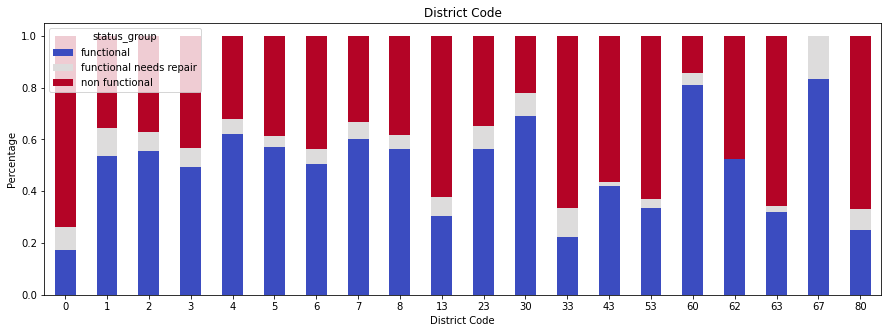

In [341]:
#plot
pd.crosstab(df['district_code'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,
                                                                             figsize = (15, 5),
                                                                             title = 'District Code',
                                                                             xlabel = 'District Code',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/district_code_crosstab')

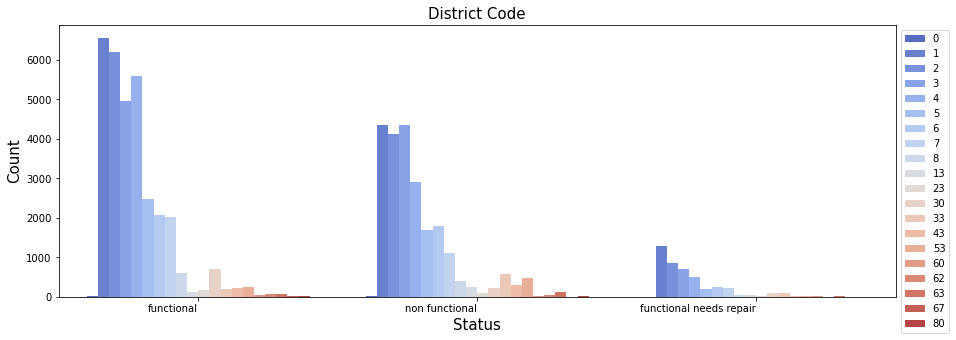

In [342]:
# plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'district_code', data = df, palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/district_code_countplot')

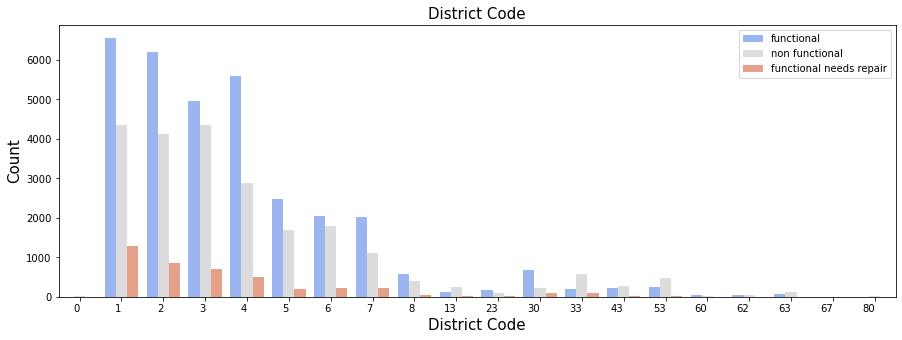

In [343]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'district_code', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('District Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/district_code_countplot')

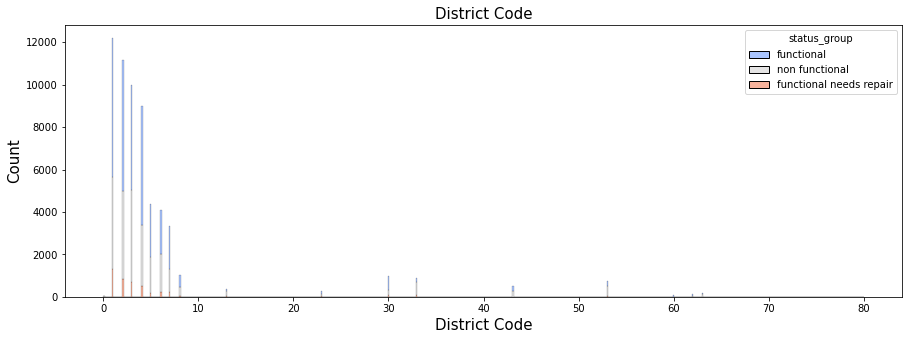

In [344]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'district_code', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('District Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/district_code_histplot')

## **'lga'**
Local government authority

Njombe          0.042138
Arusha Rural    0.021077
Moshi Rural     0.021061
Bariadi         0.019815
Rungwe          0.018620
                  ...   
Moshi Urban     0.001330
Kigoma Urban    0.001195
Arusha Urban    0.001061
Lindi Urban     0.000354
Nyamagana       0.000017
Name: lga, Length: 125, dtype: float64


<AxesSubplot:>

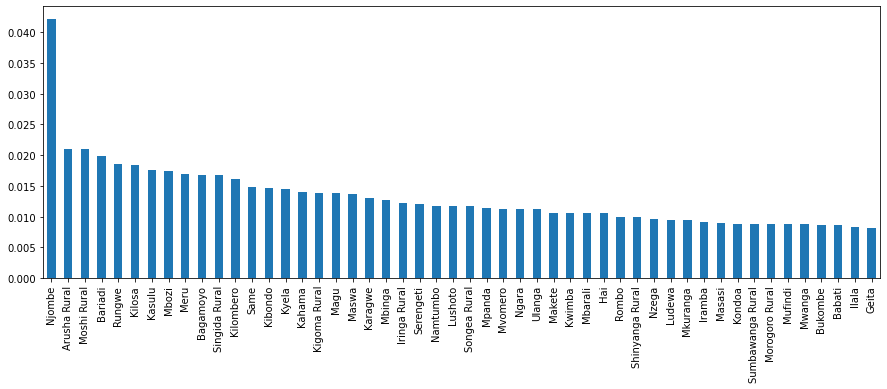

In [345]:
#get value count
print(df['lga'].value_counts(normalize = True))

#visualize
df['lga'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [346]:
#look for variation
df['lga'][df['lga'].str.contains('Rural', na = False)].unique()

array(['Shinyanga Rural', 'Sumbawanga Rural', 'Kigoma Rural',
       'Moshi Rural', 'Lindi Rural', 'Arusha Rural', 'Singida Rural',
       'Bukoba Rural', 'Morogoro Rural', 'Musoma Rural', 'Iringa Rural',
       'Songea Rural', 'Mbeya Rural', 'Mtwara Rural'], dtype=object)

In [347]:
#replace all variation 
df['lga'].replace(to_replace = ('Shinyanga Rural', 'Sumbawanga Rural', 'Kigoma Rural',
                                'Moshi Rural', 'Lindi Rural', 'Arusha Rural', 'Singida Rural',
                                'Bukoba Rural', 'Morogoro Rural', 'Musoma Rural', 'Iringa Rural',
                                'Songea Rural', 'Mbeya Rural', 'Mtwara Rural'),
                               value = 'Rural', inplace = True)

In [348]:
#look for variation
df['lga'][df['lga'].str.contains('Urban', na = False)].unique()

array(['Tabora Urban', 'Moshi Urban', 'Bukoba Urban', 'Dodoma Urban',
       'Singida Urban', 'Sumbawanga Urban', 'Morogoro Urban',
       'Mtwara Urban', 'Shinyanga Urban', 'Lindi Urban', 'Kigoma Urban',
       'Arusha Urban', 'Songea Urban'], dtype=object)

In [349]:
#replace all variation 
df['lga'].replace(to_replace = ('Tabora Urban', 'Moshi Urban', 'Bukoba Urban', 'Dodoma Urban',
                                'Singida Urban', 'Sumbawanga Urban', 'Morogoro Urban',
                                'Mtwara Urban', 'Shinyanga Urban', 'Lindi Urban', 'Kigoma Urban',
                                'Arusha Urban', 'Songea Urban'),
                               value = 'Urban', inplace = True)

In [350]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def lga_grouped(var):
    if var in df['lga'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['lga_group'] = df['lga'].map(lga_grouped)

In [351]:
#check how many unique values
df['lga_group'].nunique()

21

In [352]:
df[['lga_group']].value_counts(normalize = True)

lga_group
other        0.503754
Rural        0.160808
Njombe       0.042138
Urban        0.028333
Bariadi      0.019815
Rungwe       0.018620
Kilosa       0.018418
Kasulu       0.017626
Mbozi        0.017407
Meru         0.016987
Bagamoyo     0.016785
Kilombero    0.016145
Same         0.014764
Kibondo      0.014714
Kyela        0.014461
Kahama       0.014074
Magu         0.013872
Maswa        0.013620
Karagwe      0.012980
Mbinga       0.012626
Serengeti    0.012054
dtype: float64

In [353]:
#more exploration
pd.crosstab(df['lga_group'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
lga_group                                                        
Bagamoyo        0.732197                 0.002006        0.265797
Bariadi         0.492778                 0.347494        0.159728
Kahama          0.552632                 0.004785        0.442584
Karagwe         0.530480                 0.058366        0.411154
Kasulu          0.583572                 0.191977        0.224451
Kibondo         0.517162                 0.076659        0.406178
Kilombero       0.523462                 0.084463        0.392075
Kilosa          0.536563                 0.066728        0.396709
Kyela           0.419092                 0.009313        0.571595
Magu            0.344660                 0.094660        0.560680
Maswa           0.615575                 0.074166        0.310260
Mbinga          0.526667                 0.076000        0.397333
Mbozi           0.435203                 0.067698        0.497099
Meru            0.651140                 0.031715        0.317146
Njombe          0.801838                 0.037555        0.160607
Rungwe          0.611212                 0.145570        0.243219
Rural           0.542295                 0.092127        0.365578
Same            0.511973                 0.149373        0.338655
Serengeti       0.592179                 0.037709        0.370112
Urban           0.467617                 0.057635        0.474747
other           0.526652                 0.058149        0.415199

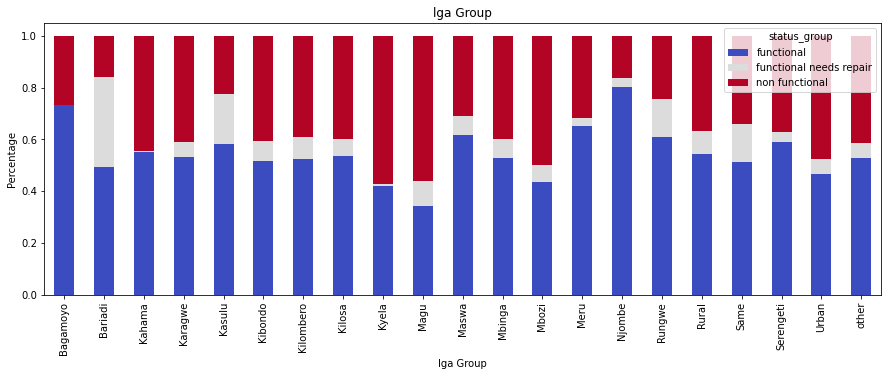

In [354]:
#plot
pd.crosstab(df['lga_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'lga Group',
                                                                             xlabel = 'lga Group',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/lga_group_crosstab')

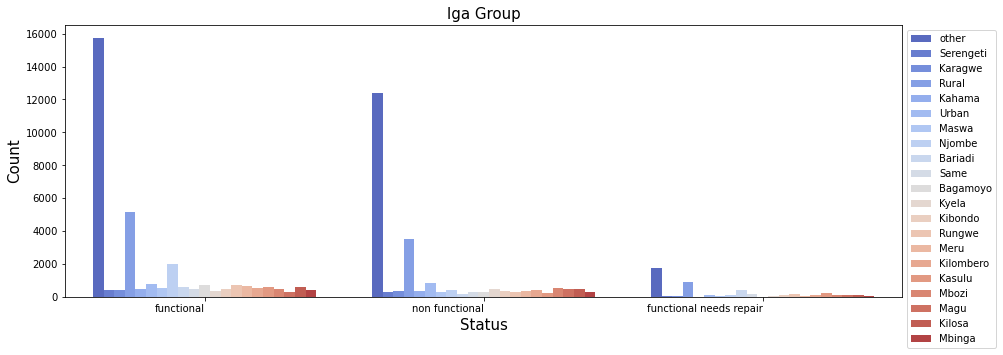

In [355]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'lga_group', data = df, palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/lga_group_countplot')

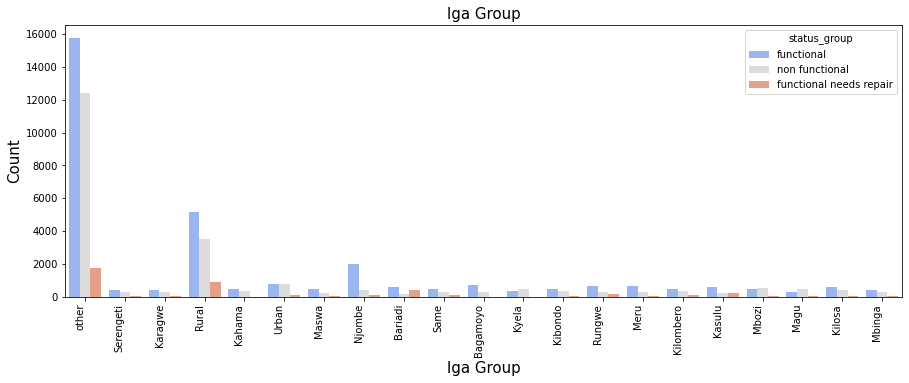

In [356]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'lga_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('lga Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/lga_group_countplot')

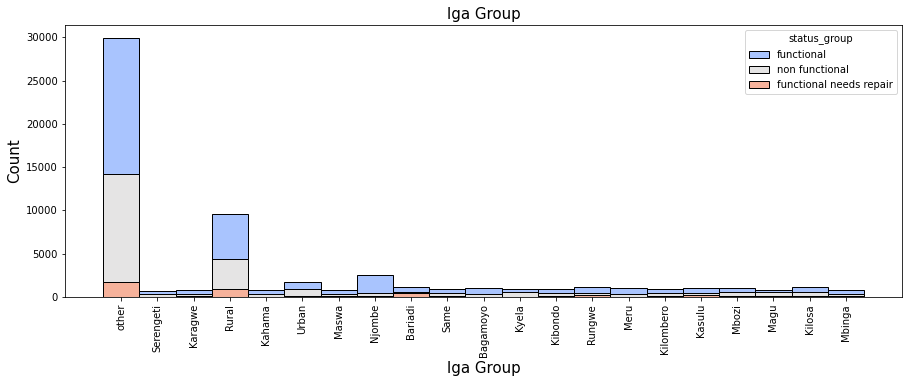

In [357]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'lga_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('lga Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/lga_group_histplot')

## **'ward'**
Geographic location

In [358]:
#get value count
df['ward'].value_counts(normalize = True)

Igosi        0.005168
Imalinyi     0.004242
Siha Kati    0.003906
Mdandu       0.003889
Nduruma      0.003653
               ...   
Izia         0.000017
Kitete       0.000017
Igogo        0.000017
Mkumbi       0.000017
Thawi        0.000017
Name: ward, Length: 2092, dtype: float64

<AxesSubplot:>

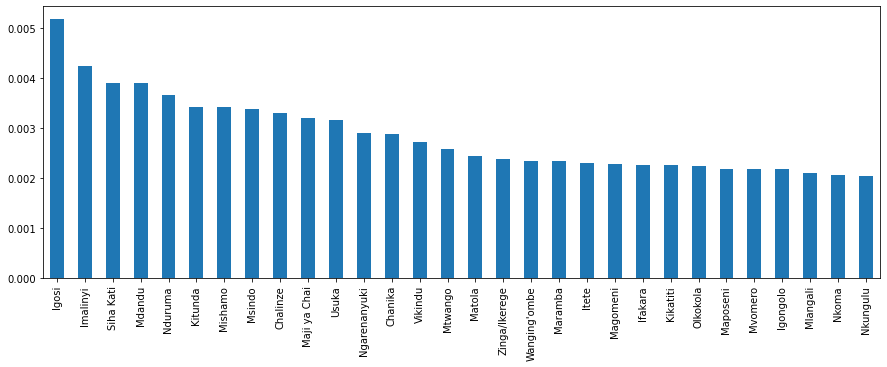

In [359]:
#get top 30 
df['ward'].value_counts(normalize = True).head(30).plot.bar(figsize = (15, 5))

In [360]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def ward_grouped(var):
    if var in df['ward'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['ward_group'] = df['ward'].map(ward_grouped)

In [361]:
#check how many unique values
df['ward_group'].nunique()

21

In [362]:
df[['ward_group']].value_counts(normalize = True)

ward_group   
other            0.936397
Igosi            0.005168
Imalinyi         0.004242
Siha Kati        0.003906
Mdandu           0.003889
Nduruma          0.003653
Kitunda          0.003418
Mishamo          0.003418
Msindo           0.003384
Chalinze         0.003300
Maji ya Chai     0.003199
Usuka            0.003148
Ngarenanyuki     0.002896
Chanika          0.002879
Vikindu          0.002727
Mtwango          0.002576
Matola           0.002441
Zinga/Ikerege    0.002374
Maramba          0.002340
Wanging'ombe     0.002340
Itete            0.002306
dtype: float64

In [363]:
#more exploration
pd.crosstab(df['ward_group'], df['status_group'], normalize = 'index')

status_group   functional  functional needs repair  non functional
ward_group                                                        
Chalinze         0.780612                 0.000000        0.219388
Chanika          0.643275                 0.000000        0.356725
Igosi            0.941368                 0.000000        0.058632
Imalinyi         0.952381                 0.011905        0.035714
Itete            0.824818                 0.029197        0.145985
Kitunda          0.793103                 0.000000        0.206897
Maji ya Chai     0.673684                 0.042105        0.284211
Maramba          0.841727                 0.000000        0.158273
Matola           0.882759                 0.034483        0.082759
Mdandu           0.874459                 0.056277        0.069264
Mishamo          0.211823                 0.073892        0.714286
Msindo           0.691542                 0.069652        0.238806
Mtwango          0.803922                 0.000000        0.196078
Nduruma          0.631336                 0.073733        0.294931
Ngarenanyuki     0.889535                 0.011628        0.098837
Siha Kati        0.982759                 0.008621        0.008621
Usuka            0.598930                 0.187166        0.213904
Vikindu          0.709877                 0.000000        0.290123
Wanging'ombe     0.539568                 0.100719        0.359712
Zinga/Ikerege    0.702128                 0.000000        0.297872
other            0.528460                 0.075258        0.396282

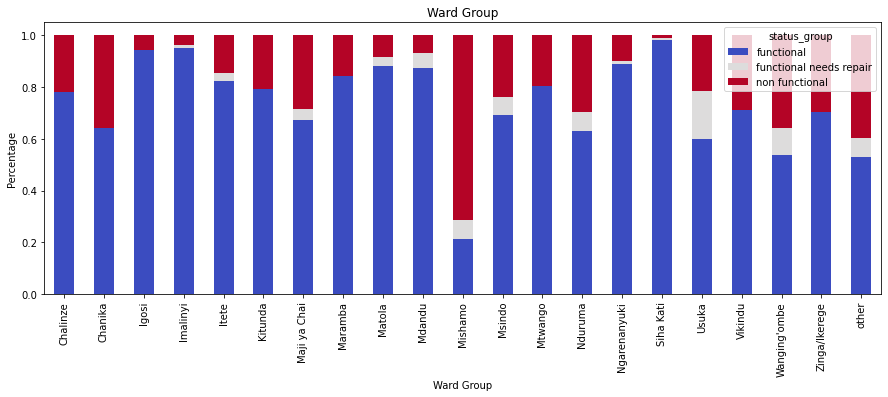

In [364]:
#plot
pd.crosstab(df['ward_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Ward Group',
                                                                             xlabel = 'Ward Group',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/ward_group_crosstab')

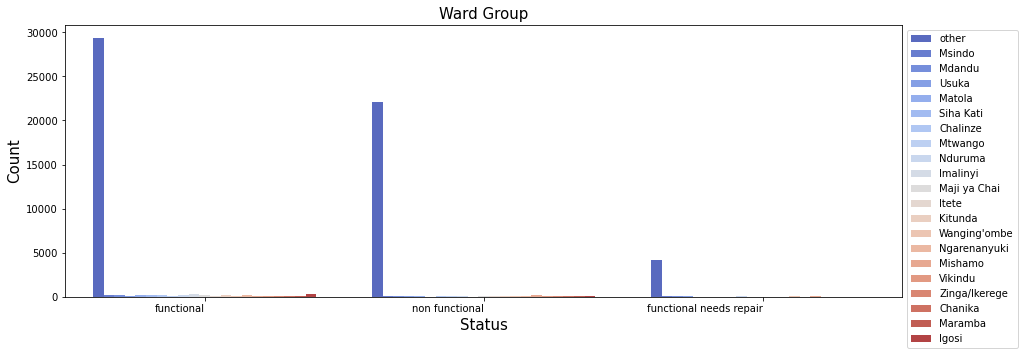

In [365]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'ward_group', data = df, palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/ward_group_countplot')

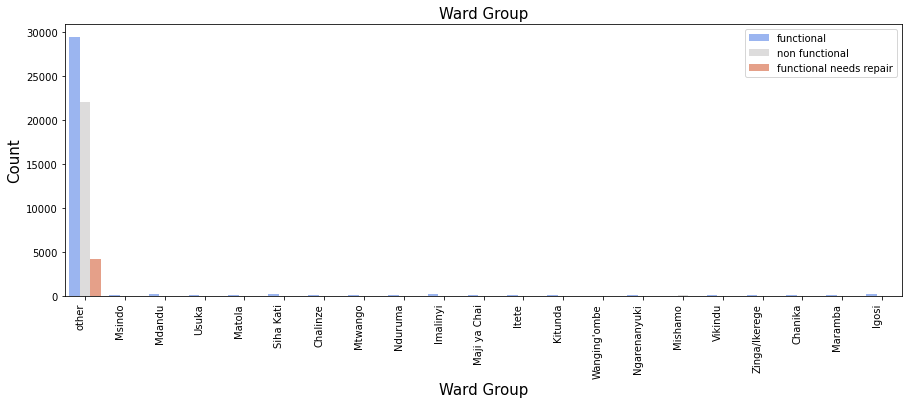

In [366]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'ward_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Ward Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/ward_group_countplot')

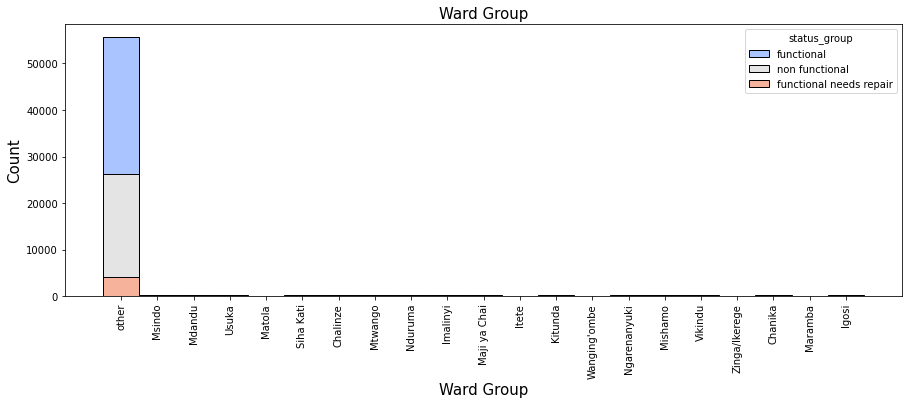

In [367]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'ward_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Ward Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/ward_group_histplot')

## **'population'**
Population around the well

In [368]:
#get value count
df['population'].value_counts(normalize = True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

In [369]:
#check how many unique values
df['population'].nunique()

1049

In [370]:
#get summary statistics excluding 0
df['population'][df['population'] != 0].describe()

count    38019.000000
mean       281.087167
std        564.687660
min          1.000000
25%         40.000000
50%        150.000000
75%        324.000000
max      30500.000000
Name: population, dtype: float64

In [371]:
#replace missing value with median
df['population'].replace(0, 150, inplace = True)

<AxesSubplot:>

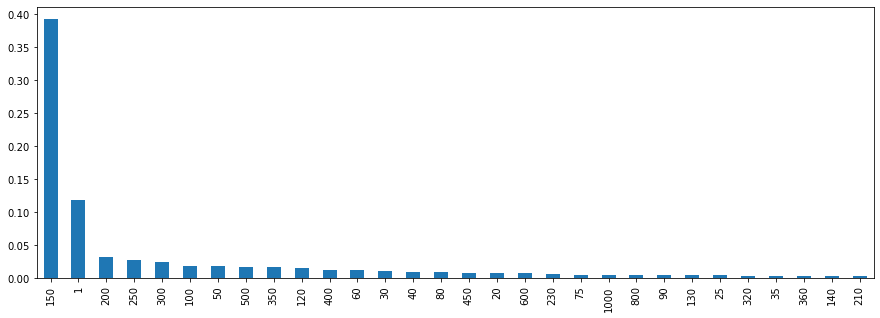

In [372]:
#get top 50 
df['population'].value_counts(normalize = True).head(30).plot.bar(figsize = (15, 5))

In [373]:
#more exploration excluding 0 values
pd.crosstab(df['population'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
population                                                       
1               0.414377                 0.050391        0.535231
2               0.750000                 0.000000        0.250000
3               0.750000                 0.000000        0.250000
4               0.692308                 0.000000        0.307692
5               0.840909                 0.000000        0.159091
...                  ...                      ...             ...
9865            0.000000                 0.000000        1.000000
10000           1.000000                 0.000000        0.000000
11463           1.000000                 0.000000        0.000000
15300           0.000000                 1.000000        0.000000
30500           1.000000                 0.000000        0.000000

[1048 rows x 3 columns]

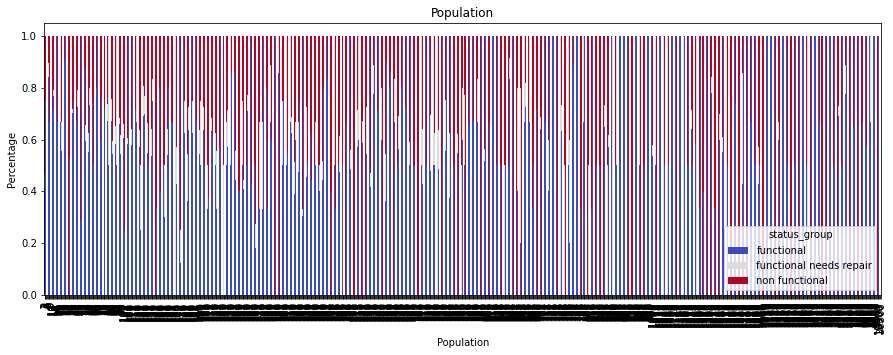

In [374]:
#plot
pd.crosstab(df['population'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Population',
                                                                             xlabel = 'Population',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/population_crosstab')

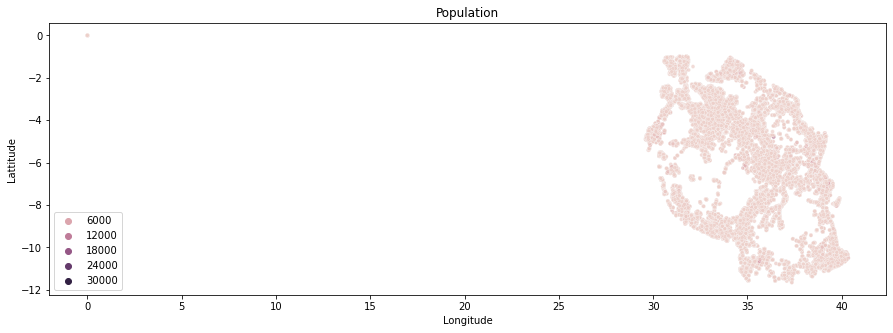

<Figure size 432x288 with 0 Axes>

In [375]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'population', data = df, alpha = 0.75, s = 15)
plt.title('Population')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.legend(loc = 'lower left')
plt.show()
plt.savefig('./Data/population_scatterplot')

## **'public_meeting'**
True/False

In [376]:
#get value count
df['public_meeting'].value_counts(normalize = True)

True     0.909838
False    0.090162
Name: public_meeting, dtype: float64

In [377]:
#check how many unique values
df['public_meeting'].nunique()

2

In [378]:
#'public_meeting' has missing values
print('Missing values before:', df['public_meeting'].isna().sum())

#fill missing values with 'other' 
df['public_meeting'].fillna('other', inplace = True)
print('Missing values after:', df['public_meeting'].isna().sum())

Missing values before: 3334
Missing values after: 0


In [379]:
#more exploration
pd.crosstab(df['public_meeting'], df['status_group'], normalize = 'index')

status_group    functional  functional needs repair  non functional
public_meeting                                                     
False             0.429871                 0.087438        0.482690
True              0.556899                 0.072906        0.370195
other             0.503299                 0.046791        0.449910

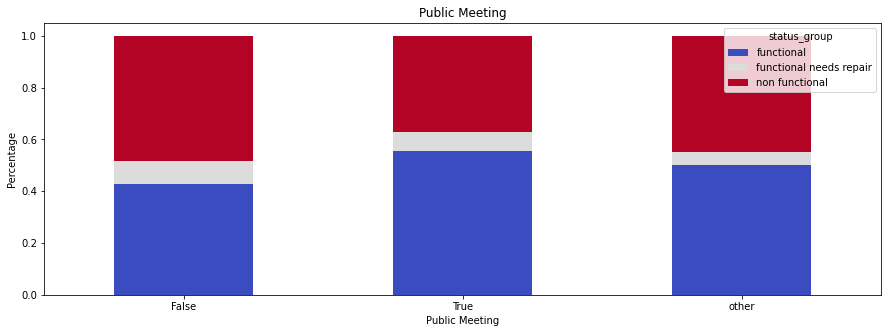

In [380]:
#plot
pd.crosstab(df['public_meeting'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,   
                                                                             figsize = (15, 5),
                                                                             title = 'Public Meeting',
                                                                             xlabel = 'Public Meeting',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/public_meeting_crosstab')

## **'recorded_by'**
Group entering this row of data

In [381]:
#get value counts
#print(df['recorded_by'].value_counts(normalize = True))

#this column is not useful, drop it
#df.drop(columns = 'recorded_by', axis = 1, inplace = True)

## **'scheme_management'**
Who operates the waterpoint

VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64


<AxesSubplot:>

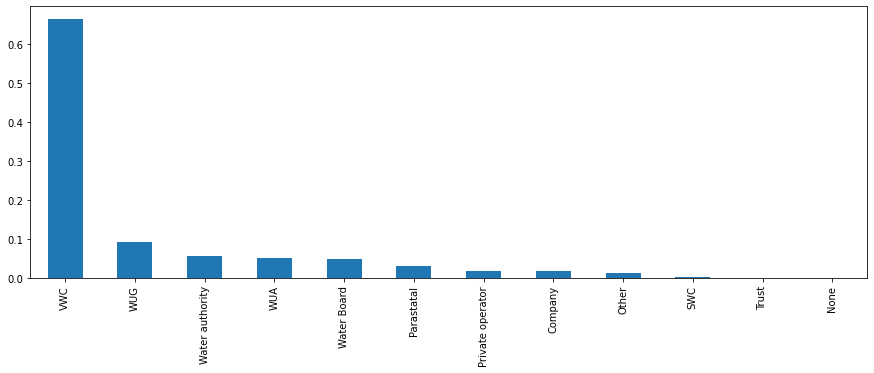

In [382]:
#get value count
print(df['scheme_management'].value_counts(normalize = True))

#visualize
df['scheme_management'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [383]:
#'scheme_management' has missing values
print('Missing values before:', df['scheme_management'].isna().sum())

#fill missing values with 'other' 
df['scheme_management'].fillna('Other', inplace = True)
print('Missing values after:', df['scheme_management'].isna().sum())

Missing values before: 3877
Missing values after: 0


In [384]:
#replace 'none' with 'other'
df['scheme_management'].replace('None', 'Other', inplace = True)

In [385]:
#check how many unique values
df['scheme_management'].nunique()

11

In [386]:
#more exploration
pd.crosstab(df['scheme_management'], df['status_group'], normalize = 'index')

status_group       functional  functional needs repair  non functional
scheme_management                                                     
Company              0.503299                 0.034873        0.461828
Other                0.502153                 0.052756        0.445090
Parastatal           0.575000                 0.120238        0.304762
Private operator     0.685795                 0.021637        0.292568
SWC                  0.206186                 0.010309        0.783505
Trust                0.638889                 0.069444        0.291667
VWC                  0.515315                 0.063436        0.421249
WUA                  0.691988                 0.082900        0.225113
WUG                  0.577411                 0.129082        0.293507
Water Board          0.747089                 0.040393        0.212518
Water authority      0.513162                 0.142087        0.344751

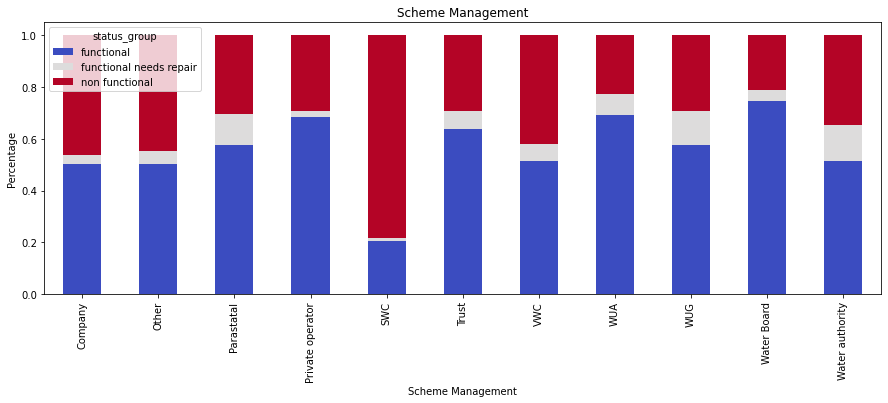

In [387]:
#plot
pd.crosstab(df['scheme_management'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Scheme Management',
                                                                             xlabel = 'Scheme Management',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/scheme_management_crosstab')

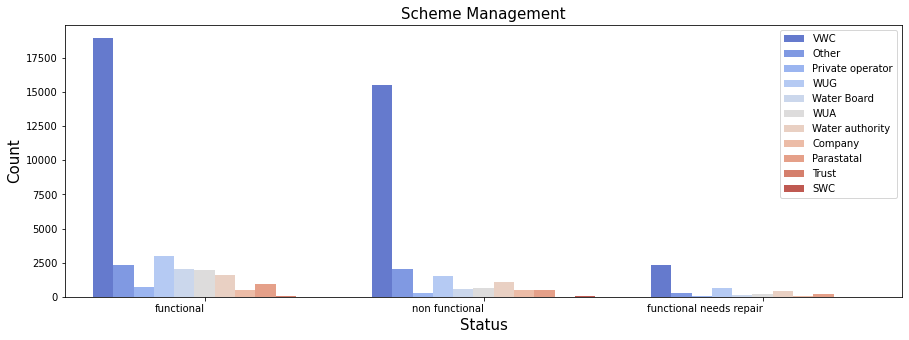

In [388]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'scheme_management', data = df, palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/scheme_management_countplot')

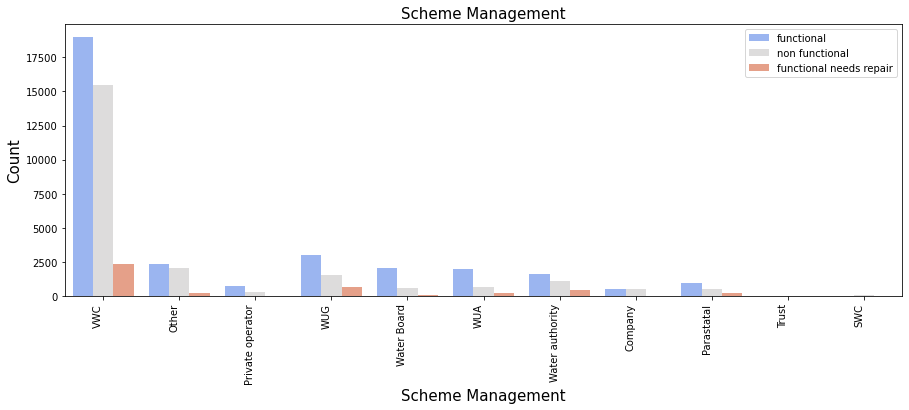

In [389]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'scheme_management', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Scheme Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/scheme_management_countplot')

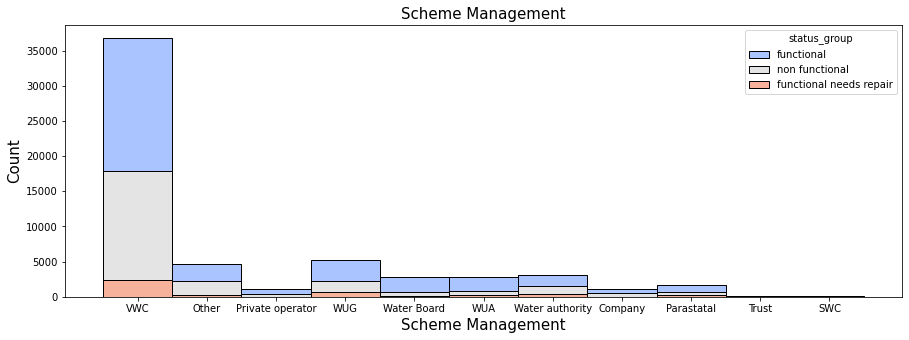

In [390]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'scheme_management', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Scheme Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/scheme_management_histplot')

## **'scheme_name'**
Who operates the waterpoint

In [391]:
#get value count
df['scheme_name'].value_counts(normalize = True)

K                           0.021835
None                        0.020619
Borehole                    0.017481
Chalinze wate               0.012967
M                           0.012807
                              ...   
Kilimb                      0.000032
Serekari ya kijiji          0.000032
Njinjo water supply         0.000032
Kifumangao Water supply     0.000032
World Bank Water Project    0.000032
Name: scheme_name, Length: 2696, dtype: float64

In [392]:
#'scheme_name' has missing values
print('Missing values before:', df['scheme_name'].isna().sum())

#fill missing values with 'other' 
df['scheme_name'].fillna('other', inplace = True)
print('Missing values after:', df['scheme_name'].isna().sum())

Missing values before: 28166
Missing values after: 0


<AxesSubplot:>

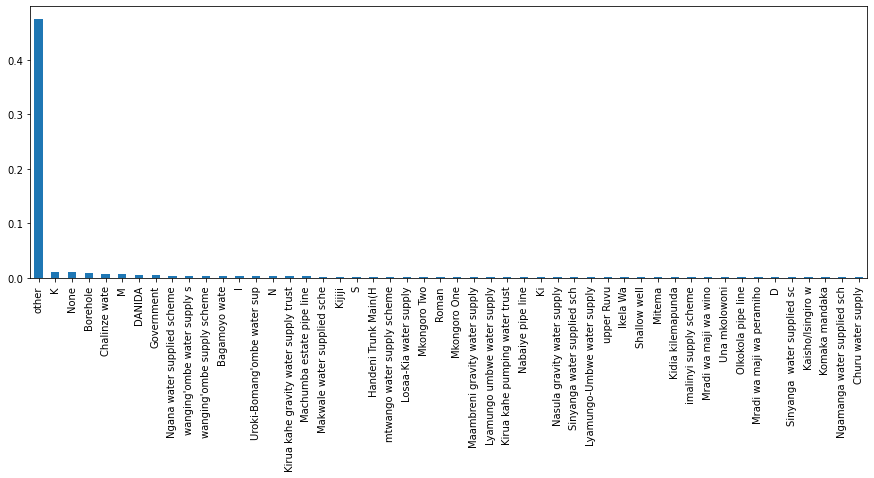

In [393]:
#get top 50 
df['scheme_name'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [394]:
#capitalization is inconsistent so we make everything lowercase to fix this
df['scheme_name'] = df['scheme_name'].astype(str).str.lower()

In [395]:
#combine 'none' with 'other'
df['scheme_name'].replace('none', 'other', inplace = True)

In [396]:
#fix misspelling
df['scheme_name'].replace(to_replace = ("wanging'ombe water supply s", "wanging'ombe supply scheme"),
                                        value = "wanging'ombe water", inplace = True)

In [397]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'other'
def scheme_name_grouped(var):
    if var in df['scheme_name'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'other'
    
#apply function to column
df['scheme_name_group'] = df['scheme_name'].map(scheme_name_grouped)


In [398]:
#check how many unique values
df['scheme_name_group'].nunique()

20

In [399]:
df[['scheme_name_group']].value_counts(normalize = True)

scheme_name_group                    
other                                    0.905572
k                                        0.011532
borehole                                 0.009192
wanging'ombe water                       0.008367
chalinze wate                            0.006835
m                                        0.006734
danida                                   0.006380
government                               0.005387
bagamoyo wate                            0.004983
ngana water supplied scheme              0.004545
i                                        0.003855
uroki-bomang'ombe water sup              0.003519
n                                        0.003434
kirua kahe gravity water supply trust    0.003249
machumba estate pipe line                0.003114
makwale water supplied sche              0.002795
kijiji                                   0.002710
mkongoro one                             0.002643
s                                        0.002593
losaa-kia wa

In [400]:
#more exploration
pd.crosstab(df['scheme_name_group'], df['status_group'], normalize = 'index')

status_group                           functional  functional needs repair  \
scheme_name_group                                                            
bagamoyo wate                            0.702703                 0.000000   
borehole                                 0.373626                 0.047619   
chalinze wate                            0.859606                 0.000000   
danida                                   0.525066                 0.044855   
government                               0.468750                 0.100000   
i                                        0.624454                 0.082969   
k                                        0.550365                 0.167883   
kijiji                                   0.621118                 0.000000   
kirua kahe gravity water supply trust    0.906736                 0.015544   
losaa-kia water supply                   0.953947                 0.000000   
m                                        0.492500                 0.140000   
machumba estate pipe line                0.724324                 0.070270   
makwale water supplied sche              0.590361                 0.000000   
mkongoro one                             0.229299                 0.573248   
n                                        0.617647                 0.044118   
ngana water supplied scheme              0.259259                 0.014815   
other                                    0.539049                 0.071555   
s                                        0.422078                 0.077922   
uroki-bomang'ombe water sup              0.832536                 0.004785   
wanging'ombe water                       0.629779                 0.142857   

status_group                           non functional  
scheme_name_group                                      
bagamoyo wate                                0.297297  
borehole                                     0.578755  
chalinze wate                                0.140394  
danida                                       0.430079  
government                                   0.431250  
i                                            0.292576  
k                                            0.281752  
kijiji                                       0.378882  
kirua kahe gravity water supply trust        0.077720  
losaa-kia water supply                       0.046053  
m                                            0.367500  
machumba estate pipe line                    0.205405  
makwale water supplied sche                  0.409639  
mkongoro one                                 0.197452  
n                                            0.338235  
ngana water supplied scheme                  0.725926  
other                                        0.389396  
s                                            0.500000  
uroki-bomang'ombe water sup                  0.162679  
wanging'ombe water                           0.227364

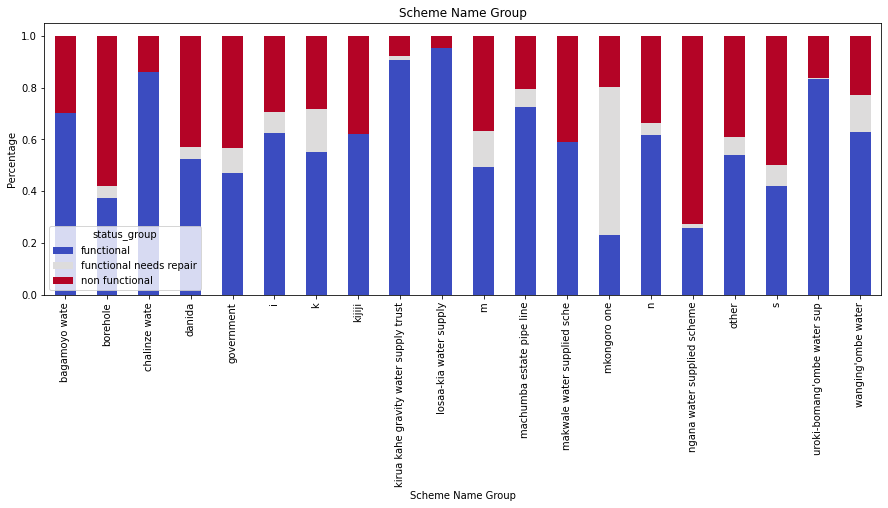

In [401]:
#plot
pd.crosstab(df['scheme_name_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Scheme Name Group',
                                                                             xlabel = 'Scheme Name Group',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/scheme_name_group_crosstab')

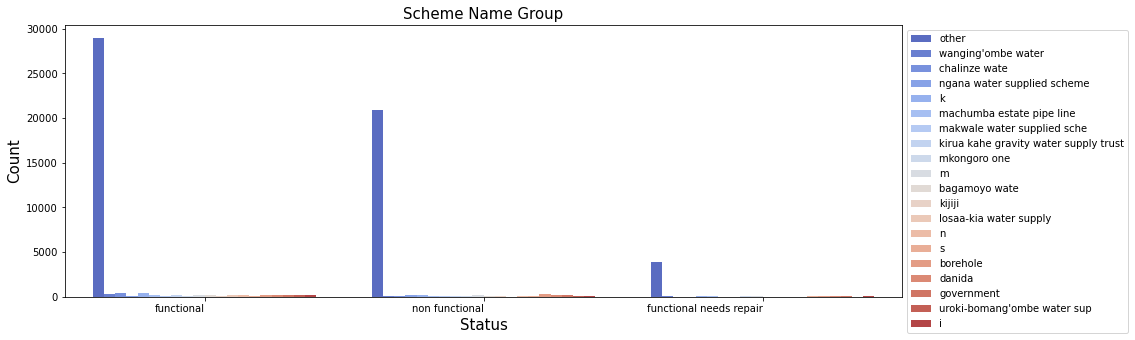

In [402]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'scheme_name_group', data = df, palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/scheme_name_group_countplot')

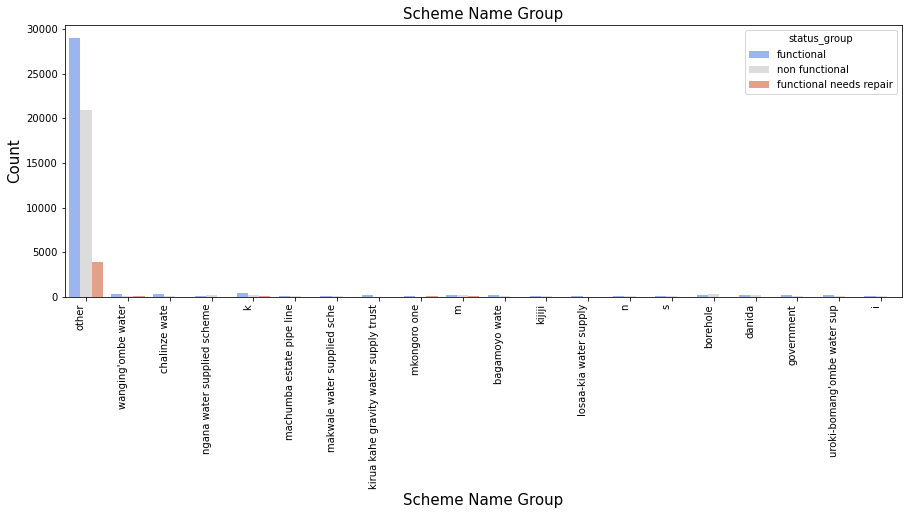

In [403]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'scheme_name_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Scheme Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/scheme_name_group_countplot')

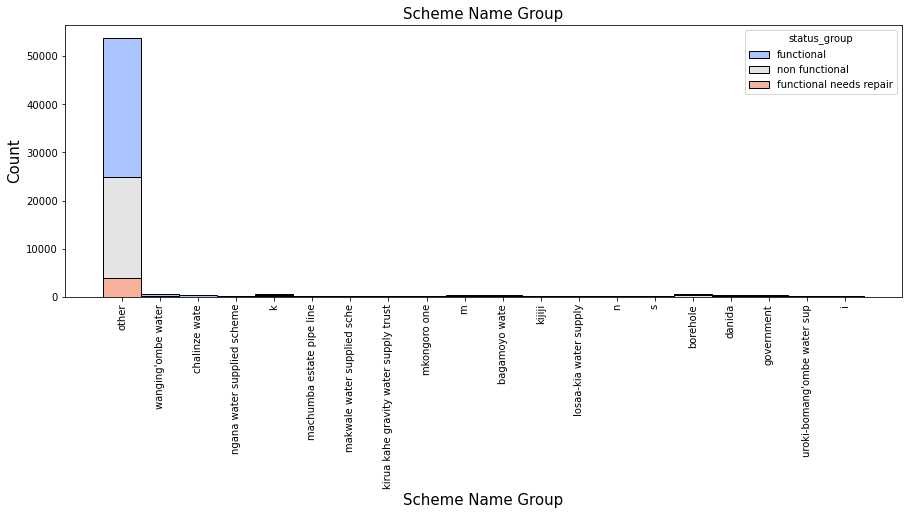

In [404]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'scheme_name_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Scheme Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/scheme_name_group_histplot')

## **'permit'**
If the waterpoint is permitted

True     0.68955
False    0.31045
Name: permit, dtype: float64


<AxesSubplot:>

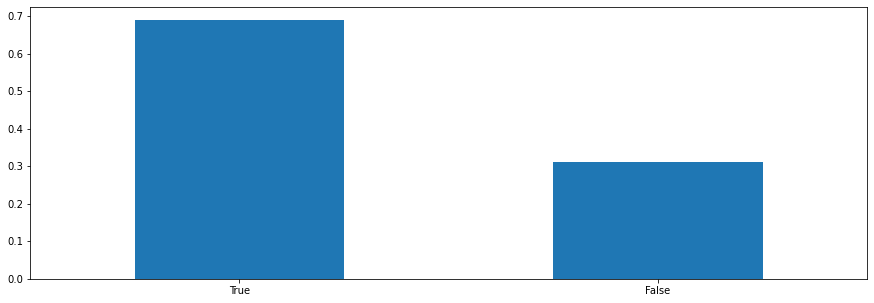

In [405]:
#get value count
print(df['permit'].value_counts(normalize = True))

#visualize
df['permit'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [406]:
#check how many unique values
df['permit'].nunique()

2

In [407]:
#'permit' has missing values
print('Missing values before:', df['permit'].isna().sum())

#fill missing values with 'other' 
df['permit'].fillna('other', inplace = True)
print('Missing values after:', df['permit'].isna().sum())

Missing values before: 3056
Missing values after: 0


In [408]:
#get value count
df['permit'].value_counts(normalize = True)

True     0.654074
False    0.294478
other    0.051448
Name: permit, dtype: float64

In [409]:
#more exploration
pd.crosstab(df['permit'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
permit                                                           
False           0.517094                 0.075463        0.407443
True            0.554437                 0.069417        0.376145
other           0.547448                 0.098168        0.354385

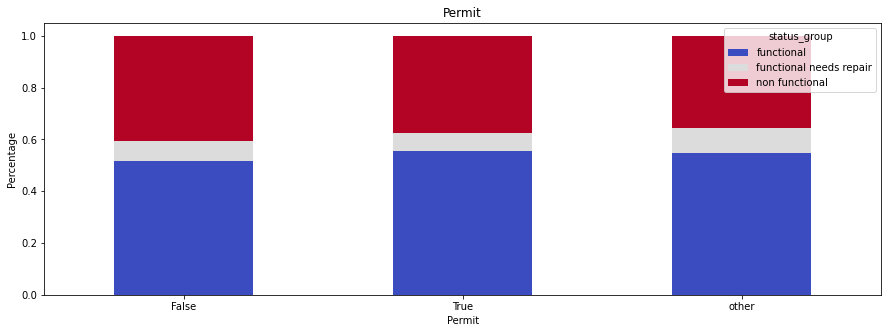

In [410]:
#plot
pd.crosstab(df['permit'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,   
                                                                             figsize = (15, 5),
                                                                             title = 'Permit',
                                                                             xlabel = 'Permit',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/permit_crosstab')

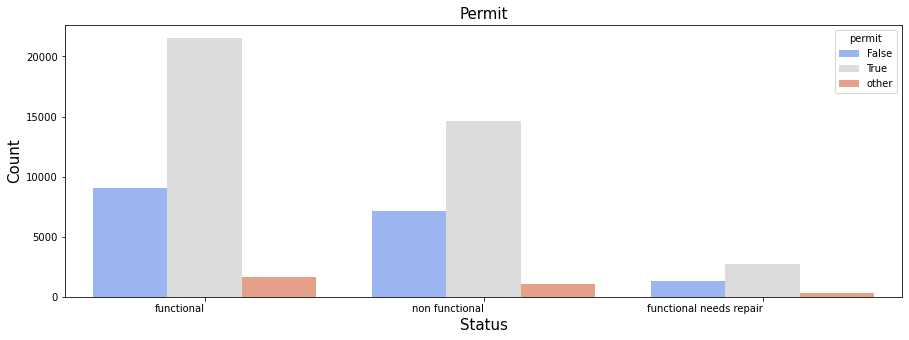

In [411]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'permit', data = df, palette = 'coolwarm')
plt.title('Permit', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/permit_countplot')

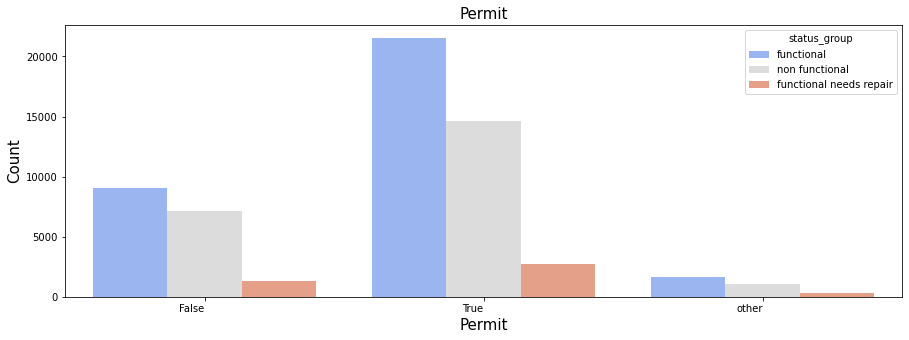

In [412]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'permit', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Permit', fontsize = 15)
plt.xlabel('Permit', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/permit_countplot')

## **'construction_year'**
Year the waterpoint was constructed

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64


<AxesSubplot:>

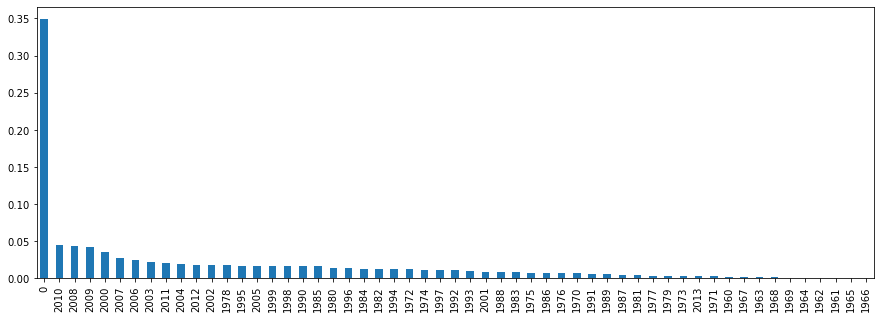

In [413]:
#get value count
print(df['construction_year'].value_counts(normalize = True))

#visualize
df['construction_year'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [414]:
#check how many unique values
df['construction_year'].nunique()

55

In [415]:
#more exploration
pd.crosstab(df['construction_year'], df['status_group'], normalize = 'index')

status_group       functional  functional needs repair  non functional
construction_year                                                     
0                    0.509682                 0.086388        0.403931
1960                 0.235294                 0.058824        0.705882
1961                 0.095238                 0.142857        0.761905
1962                 0.233333                 0.033333        0.733333
1963                 0.364706                 0.070588        0.564706
1964                 0.175000                 0.025000        0.800000
1965                 0.578947                 0.052632        0.368421
1966                 0.352941                 0.000000        0.647059
1967                 0.352273                 0.193182        0.454545
1968                 0.285714                 0.051948        0.662338
1969                 0.254237                 0.050847        0.694915
1970                 0.240876                 0.036496        0.722628
1971                 0.565517                 0.041379        0.393103
1972                 0.251412                 0.096045        0.652542
1973                 0.298913                 0.043478        0.657609
1974                 0.346154                 0.057692        0.596154
1975                 0.329519                 0.093822        0.576659
1976                 0.205314                 0.125604        0.669082
1977                 0.306931                 0.049505        0.643564
1978                 0.410800                 0.093539        0.495661
1979                 0.213542                 0.062500        0.723958
1980                 0.318126                 0.073983        0.607891
1981                 0.357143                 0.046218        0.596639
1982                 0.317204                 0.072581        0.610215
1983                 0.383197                 0.043033        0.573770
1984                 0.468549                 0.084724        0.446727
1985                 0.342857                 0.088889        0.568254
1986                 0.488479                 0.078341        0.433180
1987                 0.473510                 0.122517        0.403974
1988                 0.470250                 0.080614        0.449136
1989                 0.522152                 0.044304        0.433544
1990                 0.488470                 0.061845        0.449686
1991                 0.435185                 0.052469        0.512346
1992                 0.564063                 0.064062        0.371875
1993                 0.468750                 0.055921        0.475329
1994                 0.514905                 0.058266        0.426829
1995                 0.584813                 0.073964        0.341223
1996                 0.475956                 0.059186        0.464858
1997                 0.451863                 0.104037        0.444099
1998                 0.561077                 0.090062        0.348861
1999                 0.708887                 0.048008        0.243105
2000                 0.611669                 0.065041        0.323290
2001                 0.612963                 0.068519        0.318519
2002                 0.643721                 0.053953        0.302326
2003                 0.643857                 0.055210        0.300933
2004                 0.626892                 0.062333        0.310775
2005                 0.571711                 0.088032        0.340257
2006                 0.600272                 0.091774        0.307954
2007                 0.681159                 0.073094        0.245747
2008                 0.703789                 0.048603        0.247608
2009                 0.700355                 0.054481        0.245164
2010                 0.764839                 0.034026        0.201134
2011                 0.750796                 0.062102        0.187102
2012                 0.669742                 0.047048        0.283210
2013                 0.5

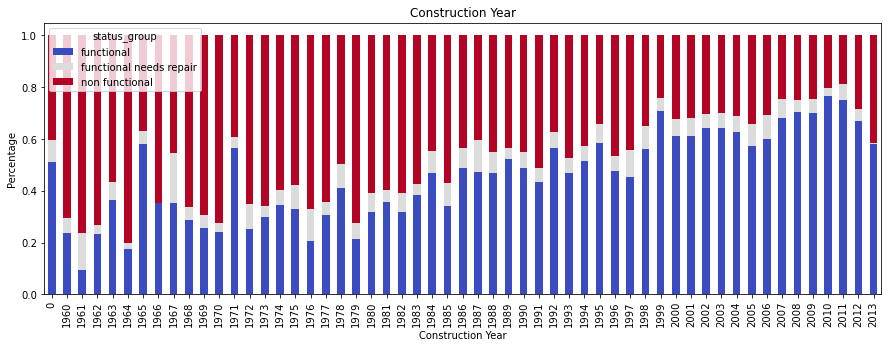

In [416]:
#plot
pd.crosstab(df['construction_year'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Construction Year',
                                                                             xlabel = 'Construction Year',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/construction_year_crosstab')

Newer wells are more often functional. The missing value also have high 'functional' count so we assume that they are built more recently. 

In [417]:
#get summary statistics excluding 0
df['construction_year'][df['construction_year'] != 0].describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

In [418]:
#replace missing value with mean of 1996
df['construction_year'].replace(0, 1996, inplace = True)

17    0.362290
3     0.044529
5     0.043990
4     0.042643
13    0.035202
6     0.026717
7     0.024764
10    0.021650
2     0.021145
9     0.018906
1     0.018249
11    0.018098
35    0.017458
18    0.017071
8     0.017020
14    0.016481
15    0.016263
23    0.016061
28    0.015909
33    0.013653
29    0.013114
31    0.012525
19    0.012424
41    0.011919
39    0.011380
16    0.010842
21    0.010774
20    0.010236
12    0.009091
25    0.008771
30    0.008215
38    0.007357
27    0.007306
37    0.006970
43    0.006919
22    0.005455
24    0.005320
26    0.005084
32    0.004007
36    0.003401
34    0.003232
40    0.003098
0     0.002963
42    0.002441
53    0.001717
46    0.001481
50    0.001431
45    0.001296
44    0.000993
49    0.000673
51    0.000505
52    0.000354
48    0.000320
47    0.000286
Name: age, dtype: float64


<AxesSubplot:>

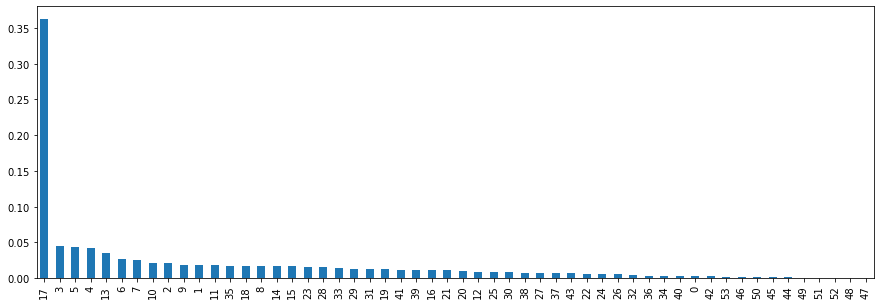

In [419]:
#get 'age' by subtracting from 2013, which is the latest year that the dataset was constructed/ recorded
df['age'] = 2013 - df['construction_year'].map(int)

#get value count
print(df['age'].value_counts(normalize = True))

#visualize
df['age'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [420]:
#more exploration
pd.crosstab(df['age'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
age                                                              
0               0.579545                 0.005682        0.414773
1               0.669742                 0.047048        0.283210
2               0.750796                 0.062102        0.187102
3               0.764839                 0.034026        0.201134
4               0.700355                 0.054481        0.245164
5               0.703789                 0.048603        0.247608
6               0.681159                 0.073094        0.245747
7               0.600272                 0.091774        0.307954
8               0.571711                 0.088032        0.340257
9               0.626892                 0.062333        0.310775
10              0.643857                 0.055210        0.300933
11              0.643721                 0.053953        0.302326
12              0.612963                 0.068519        0.318519
13              0.611669                 0.065041        0.323290
14              0.708887                 0.048008        0.243105
15              0.561077                 0.090062        0.348861
16              0.451863                 0.104037        0.444099
17              0.508411                 0.085362        0.406227
18              0.584813                 0.073964        0.341223
19              0.514905                 0.058266        0.426829
20              0.468750                 0.055921        0.475329
21              0.564063                 0.064062        0.371875
22              0.435185                 0.052469        0.512346
23              0.488470                 0.061845        0.449686
24              0.522152                 0.044304        0.433544
25              0.470250                 0.080614        0.449136
26              0.473510                 0.122517        0.403974
27              0.488479                 0.078341        0.433180
28              0.342857                 0.088889        0.568254
29              0.468549                 0.084724        0.446727
30              0.383197                 0.043033        0.573770
31              0.317204                 0.072581        0.610215
32              0.357143                 0.046218        0.596639
33              0.318126                 0.073983        0.607891
34              0.213542                 0.062500        0.723958
35              0.410800                 0.093539        0.495661
36              0.306931                 0.049505        0.643564
37              0.205314                 0.125604        0.669082
38              0.329519                 0.093822        0.576659
39              0.346154                 0.057692        0.596154
40              0.298913                 0.043478        0.657609
41              0.251412                 0.096045        0.652542
42              0.565517                 0.041379        0.393103
43              0.240876                 0.036496        0.722628
44              0.254237                 0.050847        0.694915
45              0.285714                 0.051948        0.662338
46              0.352273                 0.193182        0.454545
47              0.352941                 0.000000        0.647059
48              0.578947                 0.052632        0.368421
49              0.175000                 0.025000        0.800000
50              0.364706                 0.070588        0.564706
51              0.233333                 0.033333        0.733333
52              0.095238                 0.142857        0.761905
53              0.235294                 0.058824        0.705882

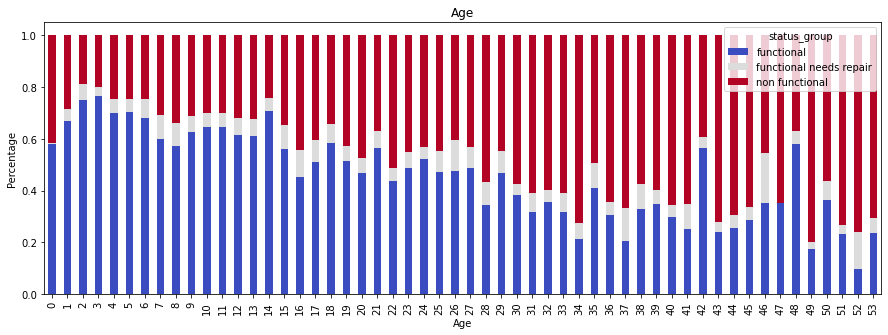

In [421]:
#plot
pd.crosstab(df['age'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Age',
                                                                             xlabel = 'Age',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/age_crosstab')

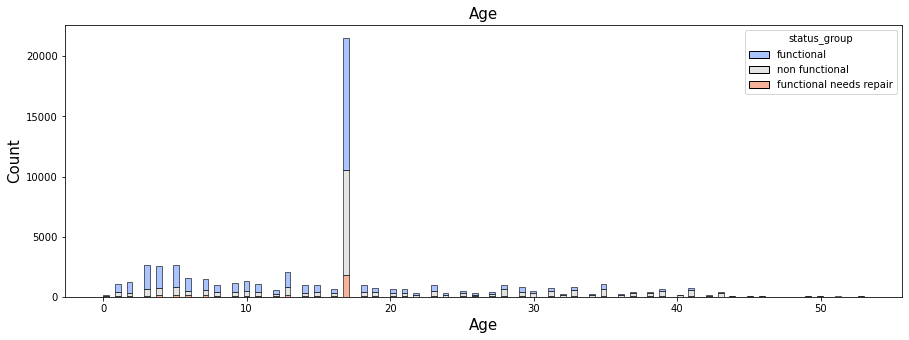

In [422]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'age', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/age_histplot')

In [423]:
#drop 'construction_year' because we don't need it anymore
df.drop(columns = 'construction_year', axis = 1, inplace = True)

## **'extraction_type'**
The kind of extraction the waterpoint uses

gravity                      0.450842
nira/tanira                  0.137273
other                        0.108249
submersible                  0.080202
swn 80                       0.061785
mono                         0.048232
india mark ii                0.040404
afridev                      0.029798
ksb                          0.023822
other - rope pump            0.007593
other - swn 81               0.003855
windmill                     0.001970
india mark iii               0.001650
cemo                         0.001515
other - play pump            0.001431
walimi                       0.000808
climax                       0.000539
other - mkulima/shinyanga    0.000034
Name: extraction_type, dtype: float64


<AxesSubplot:>

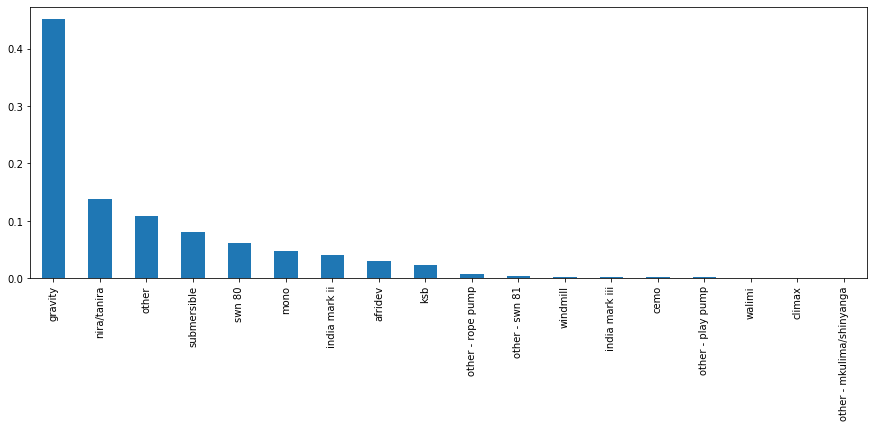

In [424]:
#get value count
print(df['extraction_type'].value_counts(normalize = True))

#visualize
df['extraction_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [425]:
#check how many unique values
df['extraction_type'].nunique()

18

In [426]:
#more exploration
pd.crosstab(df['extraction_type'], df['status_group'], normalize = 'index')

status_group               functional  functional needs repair  non functional
extraction_type                                                               
afridev                      0.677966                 0.023729        0.298305
cemo                         0.500000                 0.100000        0.400000
climax                       0.250000                 0.000000        0.750000
gravity                      0.599253                 0.100859        0.299888
india mark ii                0.603333                 0.032917        0.363750
india mark iii               0.448980                 0.010204        0.540816
ksb                          0.496820                 0.018375        0.484806
mono                         0.377661                 0.045026        0.577312
nira/tanira                  0.664827                 0.078612        0.256561
other                        0.160031                 0.032037        0.807932
other - mkulima/shinyanga    0.000000                 0.000000        1.000000
other - play pump            0.341176                 0.011765        0.647059
other - rope pump            0.649667                 0.037694        0.312639
other - swn 81               0.524017                 0.030568        0.445415
submersible                  0.551217                 0.047649        0.401134
swn 80                       0.569482                 0.057766        0.372752
walimi                       0.479167                 0.250000        0.270833
windmill                     0.427350                 0.059829        0.512821

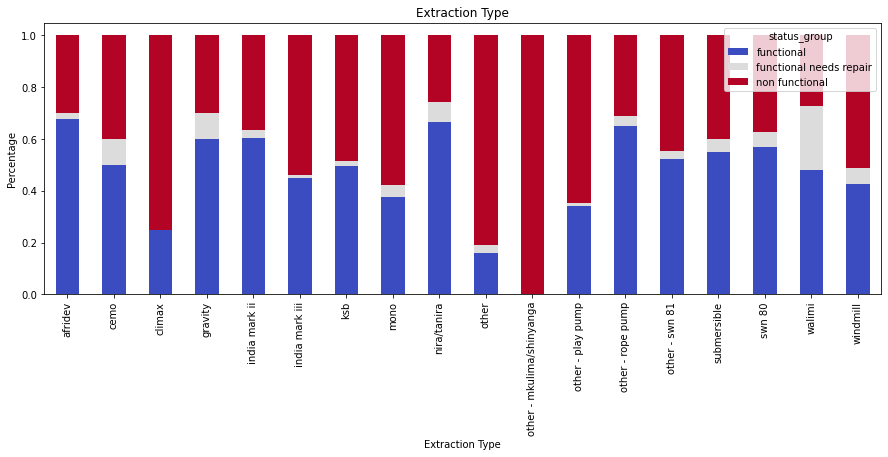

In [427]:
#plot
pd.crosstab(df['extraction_type'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Extraction Type',
                                                                             xlabel = 'Extraction Type',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/extraction_type_crosstab')

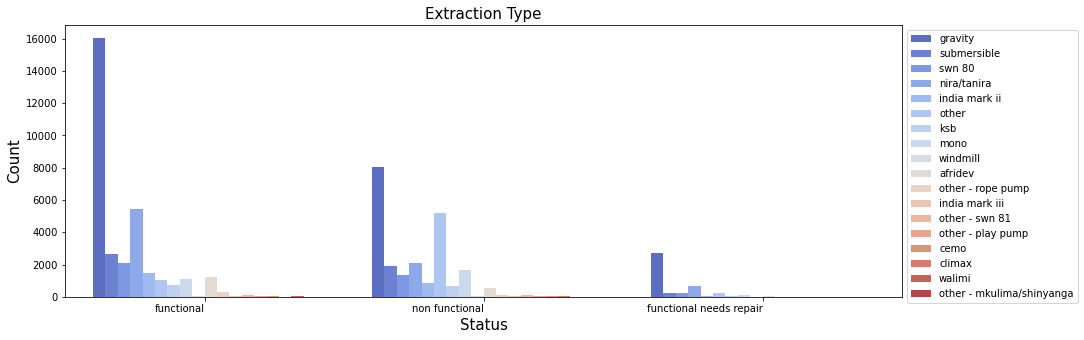

In [428]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'extraction_type', data = df, palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/extraction_type_countplot')

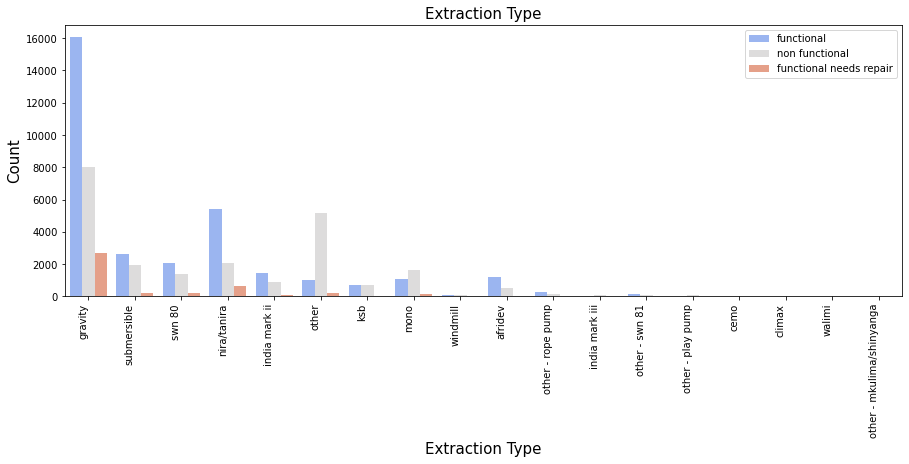

In [429]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'extraction_type', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Extraction Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/extraction_type_countplot')

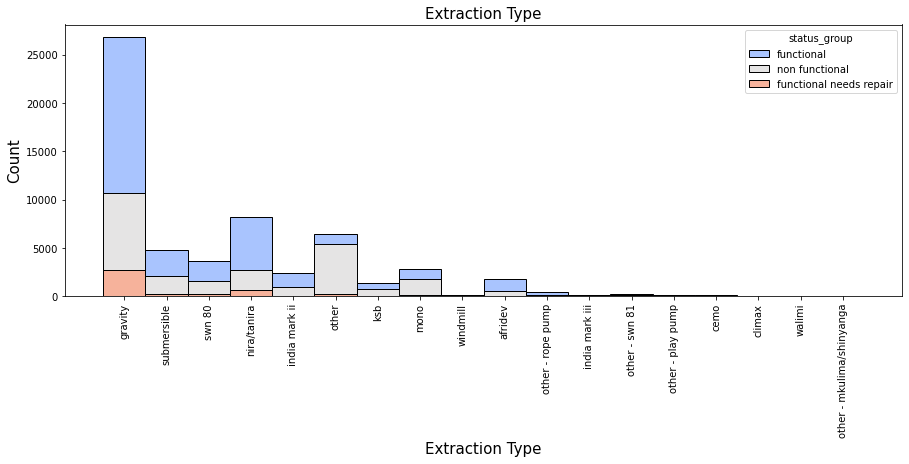

In [430]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'extraction_type', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Extraction Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/extraction_type_histplot')

## **'extraction_type_group'**
The kind of extraction the waterpoint uses

gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      0.040404
afridev            0.029798
rope pump          0.007593
other handpump     0.006128
other motorpump    0.002054
wind-powered       0.001970
india mark iii     0.001650
Name: extraction_type_group, dtype: float64


<AxesSubplot:>

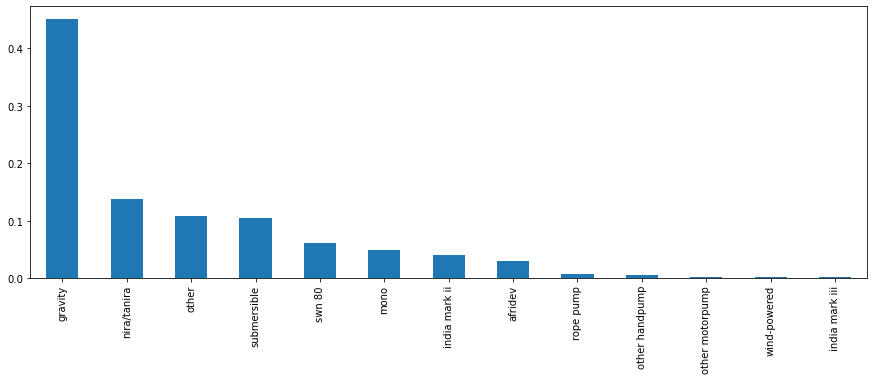

In [431]:
#get value count
print(df['extraction_type_group'].value_counts(normalize = True))

#visualize
df['extraction_type_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [432]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_group', axis = 1, inplace = True)

## **'extraction_type_class'**
The kind of extraction the waterpoint uses

In [433]:
#get value count
df['extraction_type_class'].value_counts(normalize = True)

gravity         0.450842
handpump        0.277037
other           0.108249
submersible     0.104024
motorpump       0.050286
rope pump       0.007593
wind-powered    0.001970
Name: extraction_type_class, dtype: float64

In [434]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_class', axis = 1, inplace = True)

## **'management_group'**
How the waterpoint is managed

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64


<AxesSubplot:>

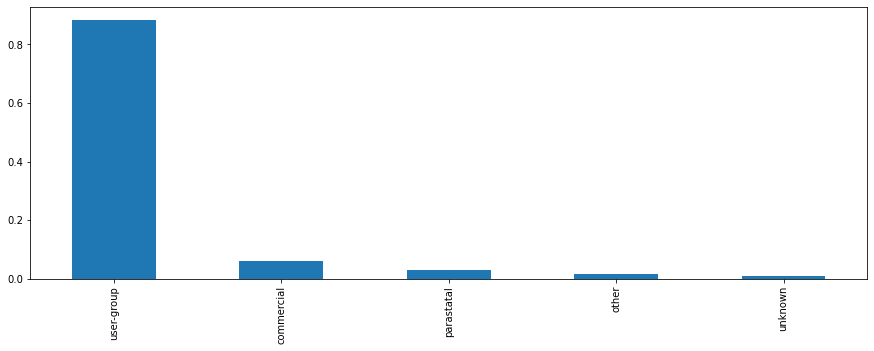

In [435]:
#get value count
print(df['management_group'].value_counts(normalize = True))

#visualize
df['management_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [436]:
#check how many unique values
df['management_group'].nunique()

5

In [437]:
#more exploration
pd.crosstab(df['management_group'], df['status_group'], normalize = 'index')

status_group      functional  functional needs repair  non functional
management_group                                                     
commercial          0.614349                 0.032161        0.353491
other               0.559915                 0.059385        0.380700
parastatal          0.576923                 0.119344        0.303733
unknown             0.399287                 0.048128        0.552585
user-group          0.538236                 0.074414        0.387350

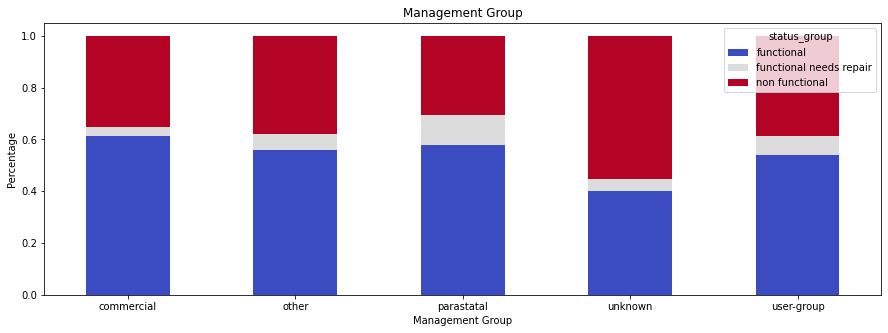

In [438]:
#plot
pd.crosstab(df['management_group'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,   
                                                                             figsize = (15, 5),
                                                                             title = 'Management Group',
                                                                             xlabel = 'Management Group',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/management_group_crosstab')

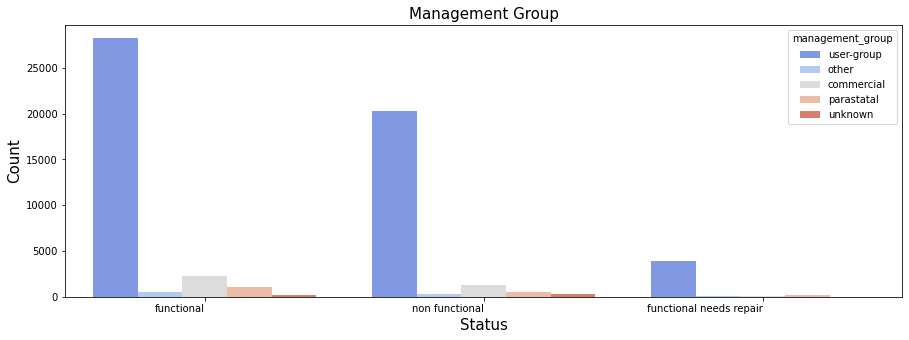

In [439]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'management_group', data = df, palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/management_group_countplot')

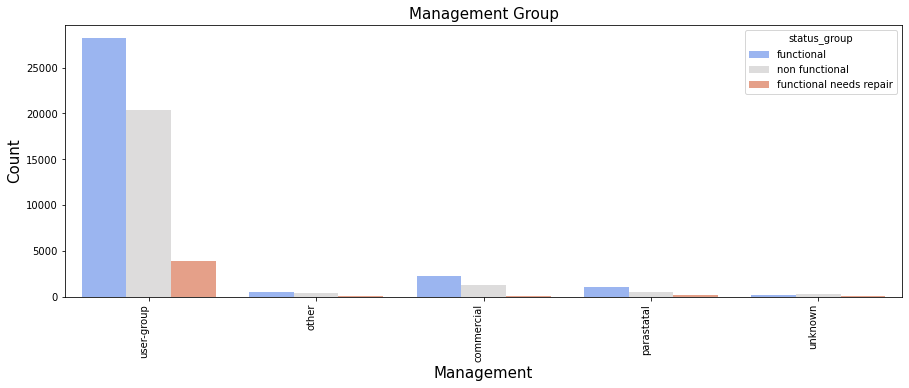

In [440]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'management_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/management_group_countplot')

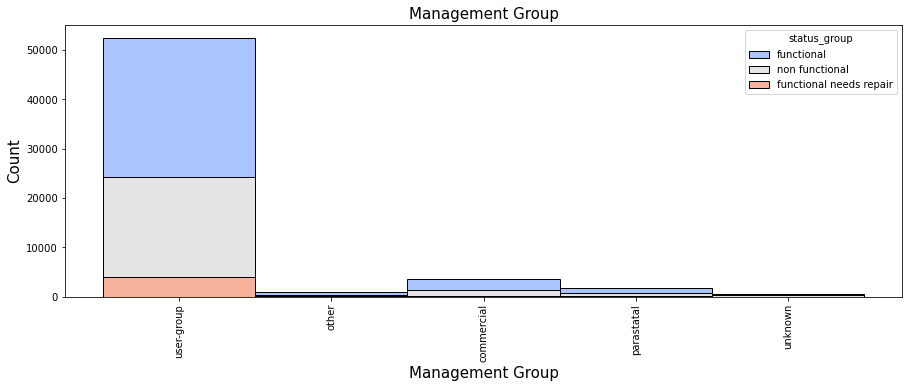

In [441]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'management_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Management Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/management_group_histplot')

## **'management'**
How the waterpoint is managed

In [442]:
#get value count
df['management'].value_counts(normalize = True)

vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64

In [443]:
#'management' and 'management_group' have the same name, they might be sub-group of each other, let's group them together
df.groupby(['management_group', 'management']).count()

id  status_group  amount_tsh  funder  \
management_group management                                                  
commercial       company             685           685         685     685   
                 private operator   1971          1971        1971    1971   
                 trust                78            78          78      78   
                 water authority     904           904         904     904   
other            other               844           844         844     844   
                 other - school       99            99          99      99   
parastatal       parastatal         1768          1768        1768    1768   
unknown          unknown             561           561         561     561   
user-group       vwc               40507         40507       40507   40507   
                 water board        2933          2933        2933    2933   
                 wua                2535          2535        2535    2535   
                 wug                6515          6515        6515    6515   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        685        685       685   
                 private operator        1971       1971       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        904        904       904   
other            other                    844        844        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1768       1768      1768   
unknown          unknown                  561        561        561       561   
user-group       vwc                    40507      40507      40507     40507   
                 water board             2933       2933       2933      2933   
                 wua                     2535       2535       2535      2535   
                 wug                     6515       6515       6515      6515   

                                   wpt_name  basin  ...  \
management_group management                         ...   
commercial       company                685    685  ...   
                 private operator      1971   1971  ...   
                 trust                   78     78  ...   
                 water authority        904    904  ...   
other            other                  844    844  ...   
                 other - school          99     99  ...   
parastatal       parastatal            1768   1768  ...   
unknown          unknown                561    561  ...   
user-group       vwc                  40507  40507  ...   
                 water board           2933   2933  ...   
                 wua                   2535   2535  ...   
                 wug                   6515   6515  ...   

                                   waterpoint_type_group  year_recorded  \
management_group management                                               
commercial       company                             685            685   
                 private operator                   1971           1971   
                 trust                                78             78   
                 water authority                     904            904   
other            other                               844            844   
                 other - school                       99             99   
parastatal       parastatal                         1768           1768   
unknown          unknown                             561            561   
user-group       vwc                               40507          40507   
                 water board                        2933           2933   
                 wua                                2535           2535   
        

In [444]:
#'management_group' is just a bigger container of 'management' , drop 'management' to reduce dimensionality
df.drop(columns = 'management', axis = 1, inplace = True)

## **'payment'**
What the water costs

never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: payment, dtype: float64


<AxesSubplot:>

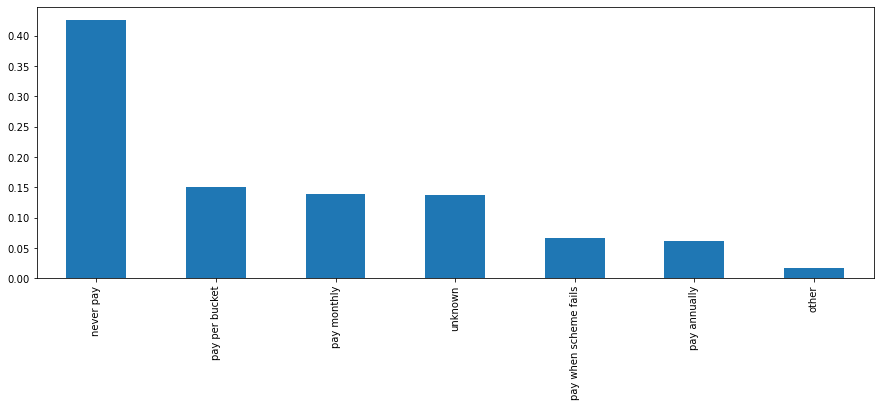

In [445]:
#get value count
print(df['payment'].value_counts(normalize = True))

#visualize
df['payment'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [446]:
#check how many unique values
df['payment'].nunique()

7

In [447]:
#replace 'unknown' to 'other'
df['payment'].replace('unknown', 'other', inplace = True)

In [448]:
#more exploration
pd.crosstab(df['payment'], df['status_group'], normalize = 'index')

status_group           functional  functional needs repair  non functional
payment                                                                   
never pay                0.448911                 0.075233        0.475856
other                    0.449354                 0.059711        0.490935
pay annually             0.752334                 0.067820        0.179846
pay monthly              0.660482                 0.111687        0.227831
pay per bucket           0.677796                 0.045520        0.276683
pay when scheme fails    0.620593                 0.070772        0.308636

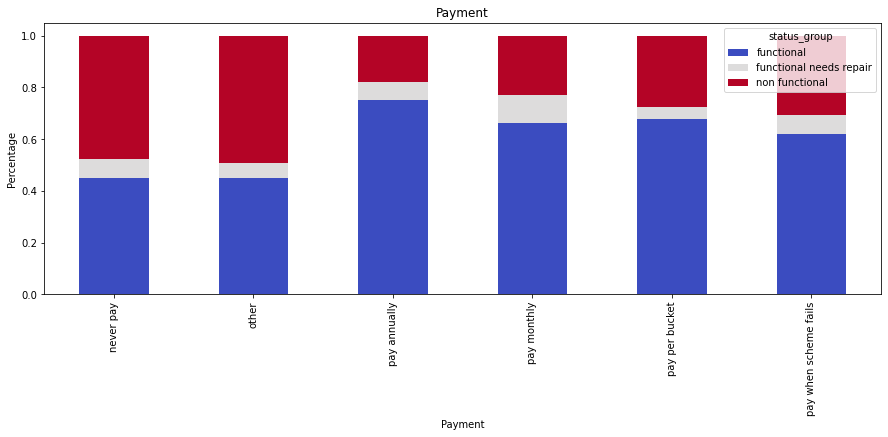

In [449]:
#plot
pd.crosstab(df['payment'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Payment',
                                                                             xlabel = 'Payment',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/payment_crosstab')

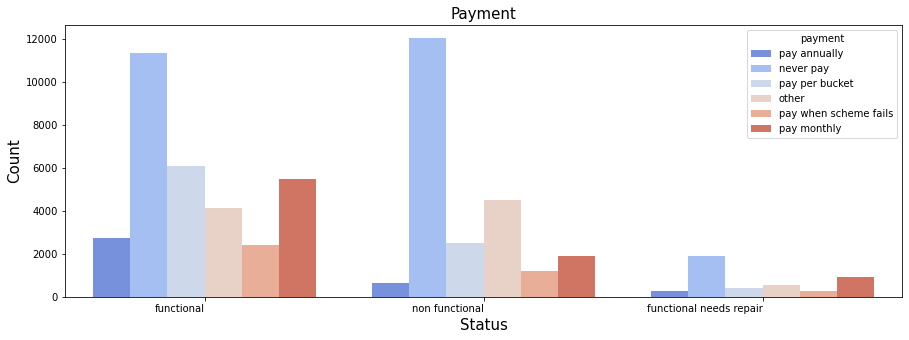

In [450]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'payment', data = df, palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/payment_countplot')

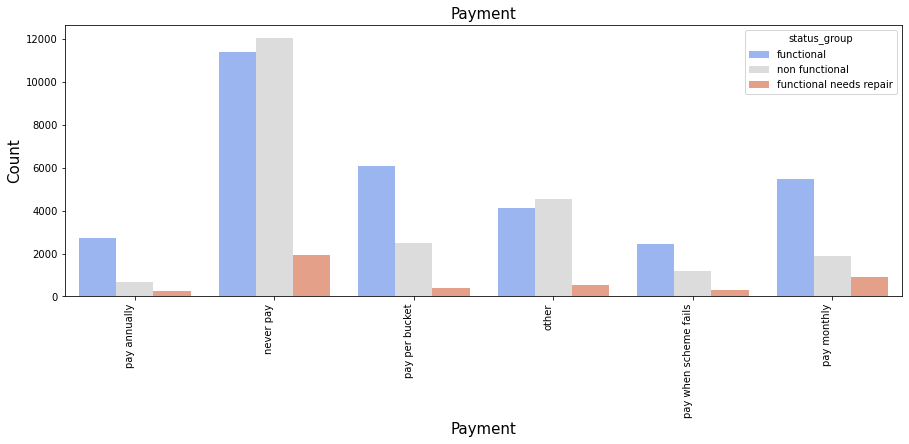

In [451]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'payment', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Payment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/payment_countplot')

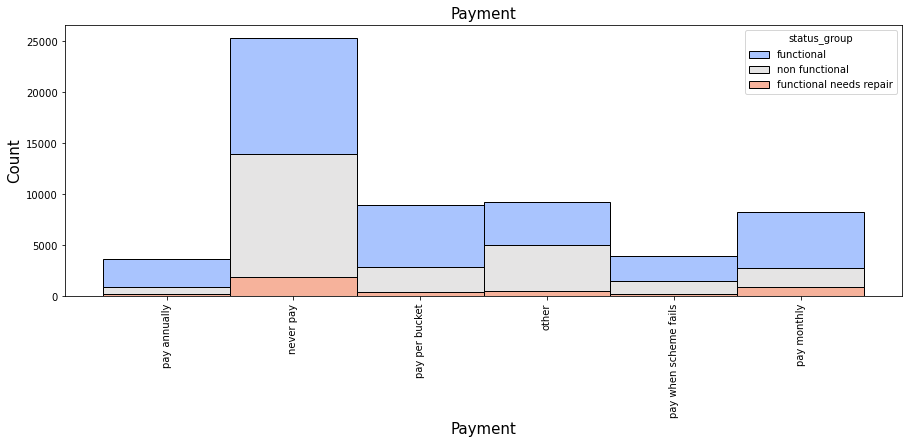

In [452]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'payment', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Payment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/payment_histplot')

## **'payment_type'**
What the water costs

In [453]:
#get value counts
df['payment_type'].value_counts(normalize = True)

never pay     0.426734
per bucket    0.151263
monthly       0.139731
unknown       0.137323
on failure    0.065892
annually      0.061313
other         0.017744
Name: payment_type, dtype: float64

In [454]:
#this column is redundant since it is similar to 'payment', drop it, drop it
df.drop(columns = 'payment_type', axis = 1, inplace = True)

## **'water_quality'**
The quality of the water

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64


<AxesSubplot:>

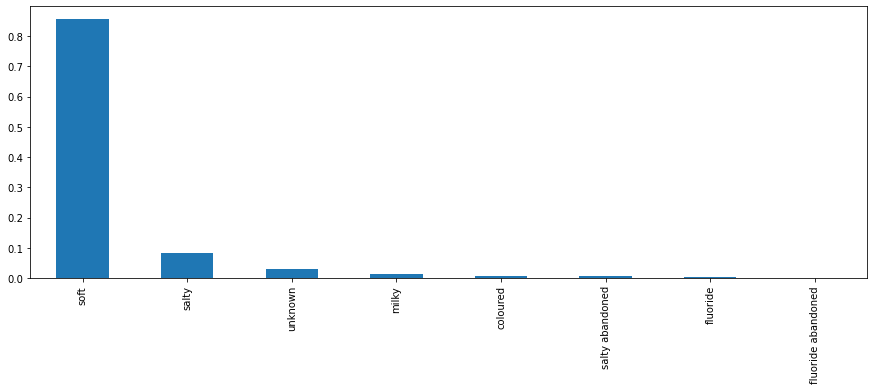

In [455]:
#get value count
print(df['water_quality'].value_counts(normalize = True))

#visualize
df['water_quality'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [456]:
#check how many unique values
df['water_quality'].nunique()

8

In [457]:
#more exploration
pd.crosstab(df['water_quality'], df['status_group'], normalize = 'index')

status_group        functional  functional needs repair  non functional
water_quality                                                          
coloured              0.502041                 0.110204        0.387755
fluoride              0.755000                 0.065000        0.180000
fluoride abandoned    0.352941                 0.000000        0.647059
milky                 0.544776                 0.017413        0.437811
salty                 0.457166                 0.046334        0.496499
salty abandoned       0.513274                 0.212389        0.274336
soft                  0.565941                 0.076823        0.357236
unknown               0.140725                 0.018657        0.840618

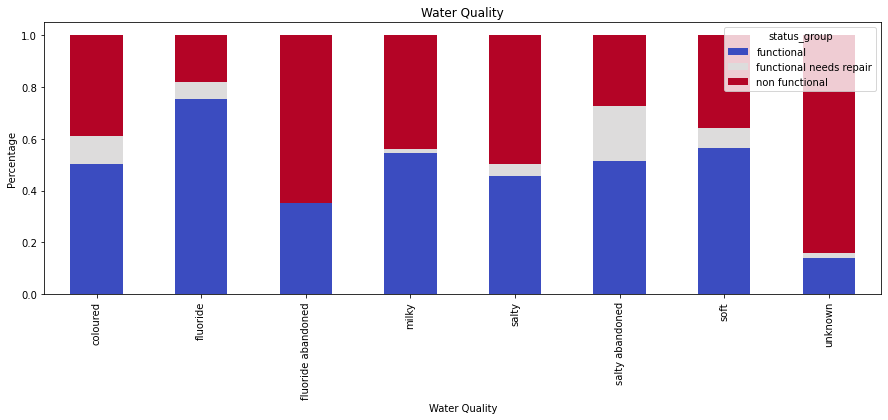

In [458]:
#plot
pd.crosstab(df['water_quality'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Water Quality',
                                                                             xlabel = 'Water Quality',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/water_quality_crosstab')

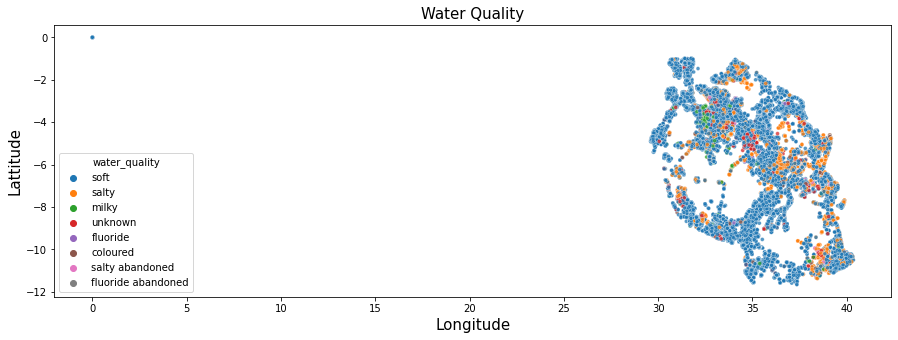

<Figure size 432x288 with 0 Axes>

In [459]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'water_quality', data = df, alpha = 0.75, s = 15)
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/water_quality_scatterplot')

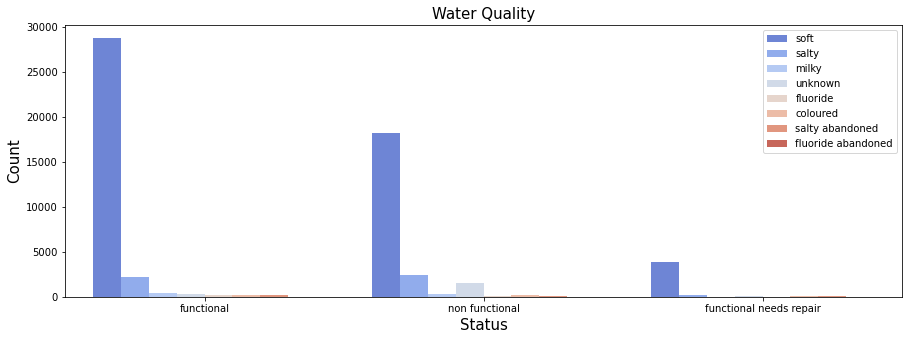

In [460]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'water_quality', data = df, palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/water_quality_countplot')

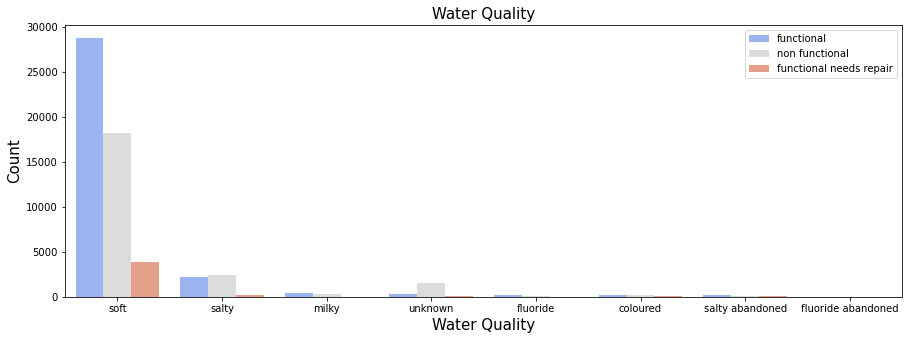

In [461]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'water_quality', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Water Quality', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/water_quality_countplot')

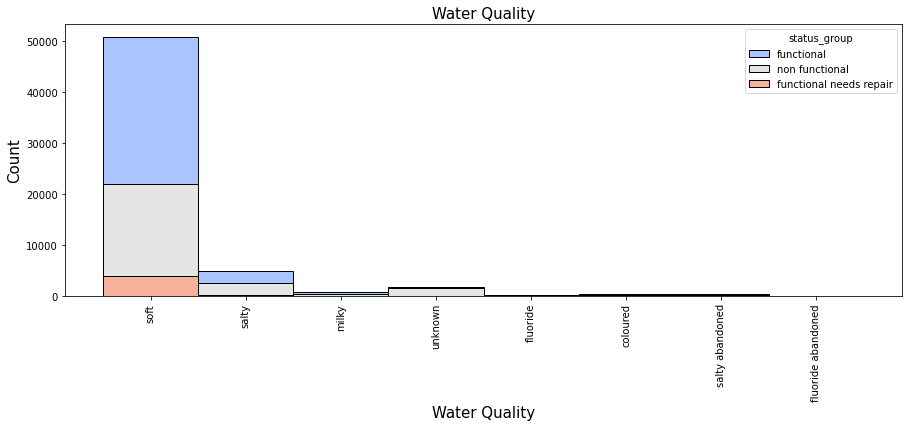

In [462]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'water_quality', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Water Quality', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/water_quality_histplot')

## **'quality_group'**
The quality of the water

In [463]:
#get value count
print(df['quality_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'water_quality', drop it
df.drop(columns = 'quality_group', axis = 1, inplace = True)

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64


## **'quantity'**
The quantity of water

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity, dtype: float64


<AxesSubplot:>

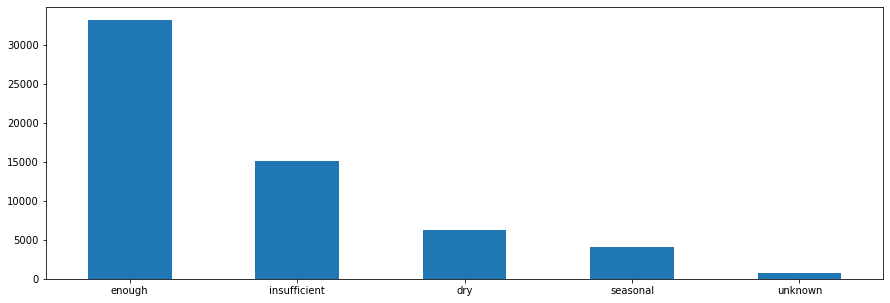

In [464]:
#get value count
print(df['quantity'].value_counts(normalize = True))

#visualize
df['quantity'].value_counts().plot.bar(figsize = (15, 5), rot = 0)

In [465]:
#check how many unique values
df['quantity'].nunique()

5

In [466]:
#more exploration
pd.crosstab(df['quantity'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
quantity                                                         
dry             0.025136                 0.005924        0.968940
enough          0.652323                 0.072320        0.275357
insufficient    0.523234                 0.095842        0.380924
seasonal        0.574074                 0.102716        0.323210
unknown         0.269962                 0.017744        0.712294

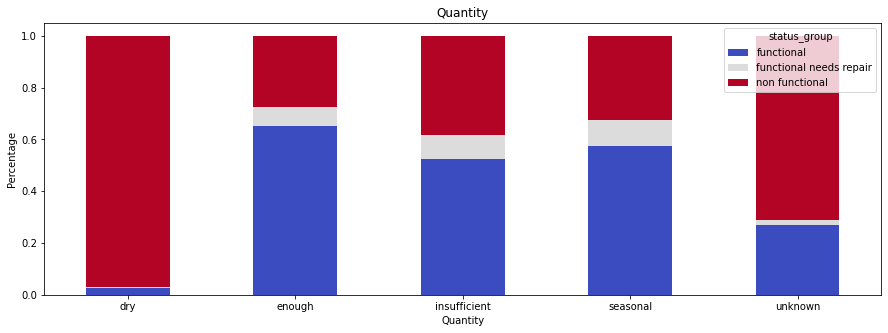

In [467]:
#plot
pd.crosstab(df['quantity'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             rot = 0,
                                                                             title = 'Quantity',
                                                                             xlabel = 'Quantity',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/quantity_crosstab')

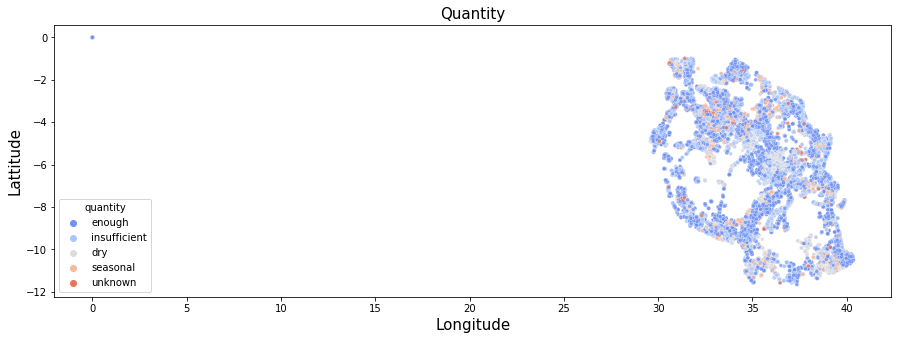

<Figure size 432x288 with 0 Axes>

In [468]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quantity', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/quantity_scatterplot')

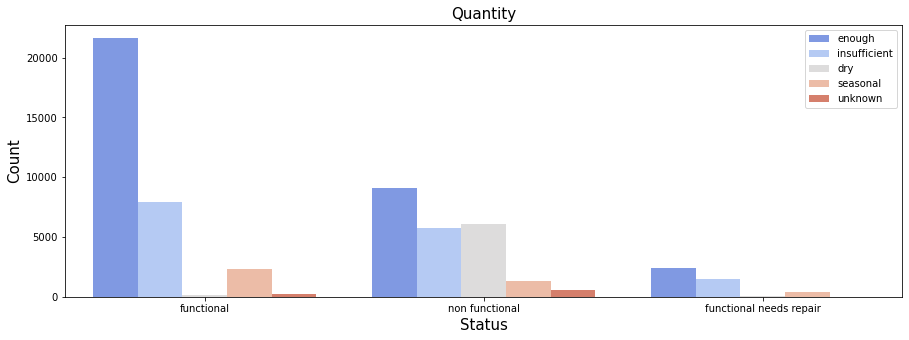

In [469]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'quantity', data = df, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/quantity_countplot')

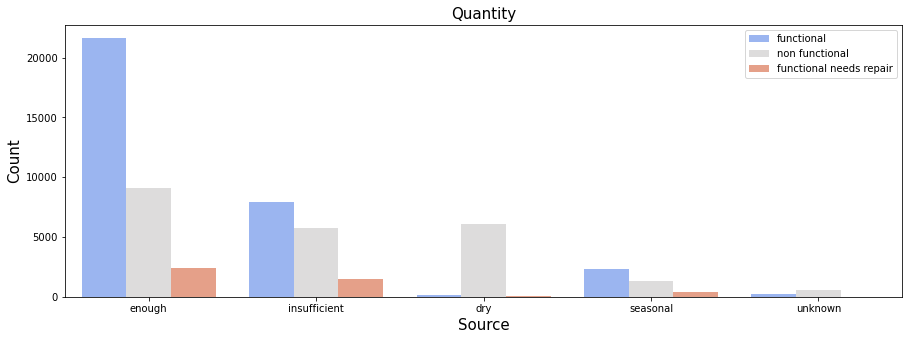

In [470]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'quantity', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/quantity_countplot')

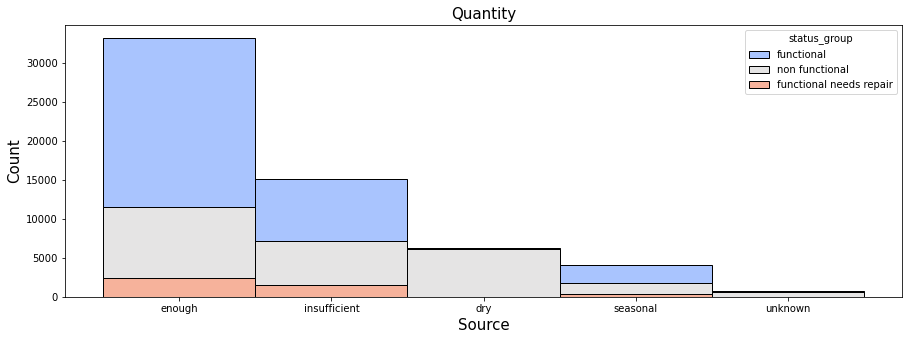

In [471]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'quantity', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/quantity_histplot')

## **'quantity_group'**
The quantity of water

In [472]:
#get value count
print(df['quantity_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'quantity', drop it
df.drop(columns = 'quantity_group', axis = 1, inplace = True)

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity_group, dtype: float64


## **'source'**
The source of the water

spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: source, dtype: float64


<AxesSubplot:>

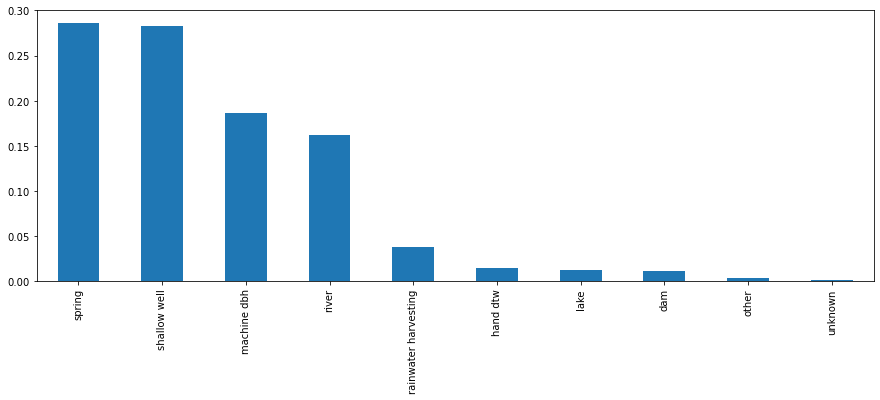

In [473]:
#get value count
print(df['source'].value_counts(normalize = True))

#visualize
df['source'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [474]:
#check how many unique values
df['source'].nunique()

10

In [475]:
#more exploration
pd.crosstab(df['source'], df['status_group'], normalize = 'index')

status_group          functional  functional needs repair  non functional
source                                                                   
dam                     0.385671                 0.036585        0.577744
hand dtw                0.568650                 0.019451        0.411899
lake                    0.211765                 0.015686        0.772549
machine dbh             0.489571                 0.044334        0.466095
other                   0.594340                 0.004717        0.400943
rainwater harvesting    0.603922                 0.136819        0.259259
river                   0.568560                 0.127029        0.304411
shallow well            0.494769                 0.056883        0.448348
spring                  0.622290                 0.074966        0.302744
unknown                 0.484848                 0.060606        0.454545

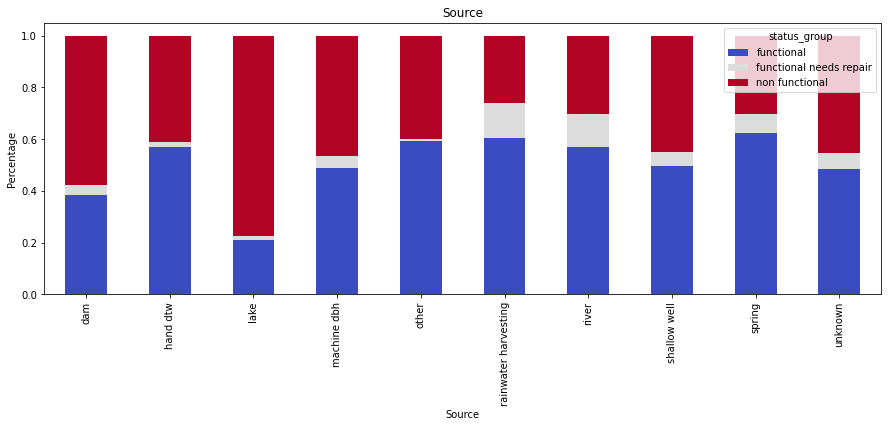

In [476]:
#plot
pd.crosstab(df['source'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Source',
                                                                             xlabel = 'Source',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/source_crosstab')

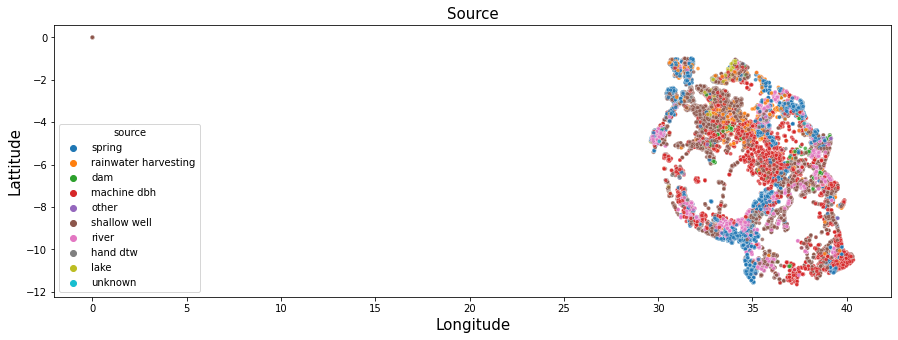

<Figure size 432x288 with 0 Axes>

In [477]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source', data = df, alpha = 0.75, s = 15)
plt.title('Source', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/source_scatterplot')

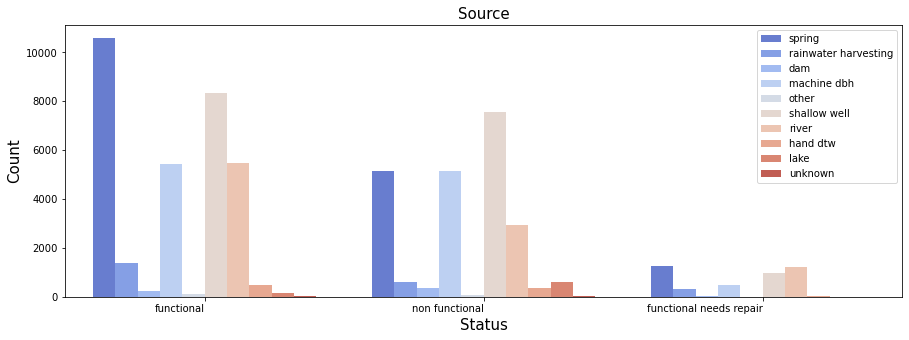

In [478]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'source', data = df, palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/source_countplot')

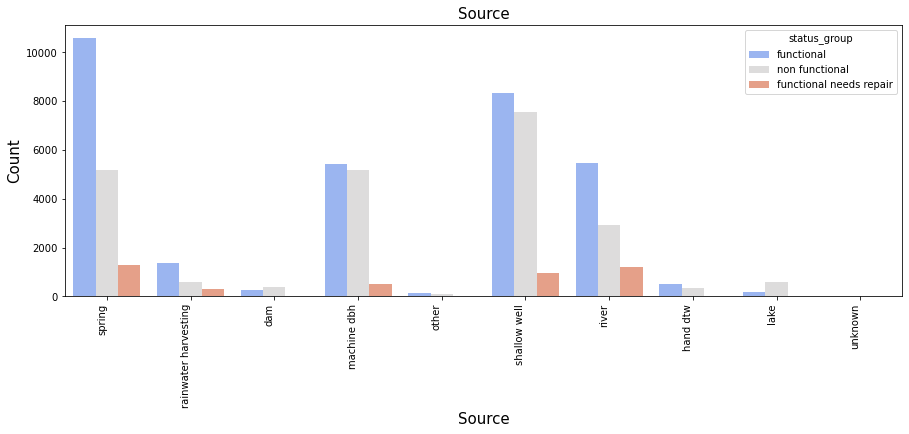

In [479]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/source_countplot')

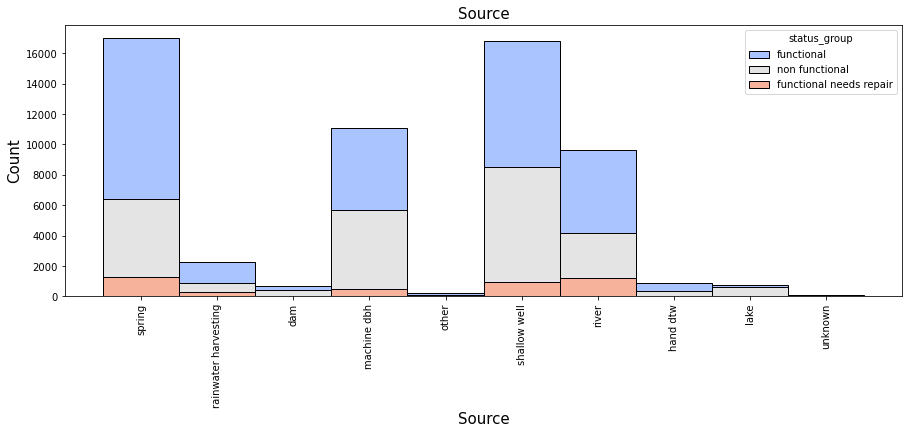

In [480]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'source', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/source_histplot')

## **'source_type'**
The source of the water

In [481]:
#get value count
print(df['source_type'].value_counts(normalize = True))

#this column is redundant since it is similar to 'source', drop it
df.drop(columns = 'source_type', axis = 1, inplace = True)

spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: source_type, dtype: float64


## **'source_class'**
The source of the water

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64


<AxesSubplot:>

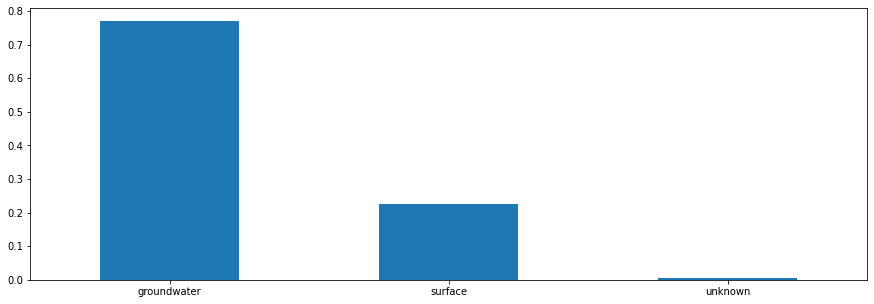

In [482]:
#get value count
print(df['source_class'].value_counts(normalize = True))

#visualize
df['source_class'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [483]:
#check how many unique values
df['source_class'].nunique()

3

In [484]:
#more exploration
pd.crosstab(df['source_class'], df['status_group'], normalize = 'index')

status_group  functional  functional needs repair  non functional
source_class                                                     
groundwater     0.542320                 0.059855        0.397825
surface         0.545168                 0.117872        0.336960
unknown         0.568345                 0.017986        0.413669

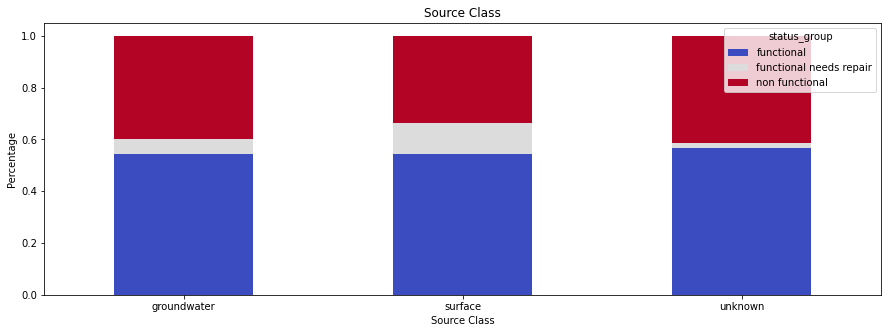

In [485]:
#plot
pd.crosstab(df['source_class'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             rot = 0,
                                                                             figsize = (15, 5),
                                                                             title = 'Source Class',
                                                                             xlabel = 'Source Class',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/source_class_crosstab')

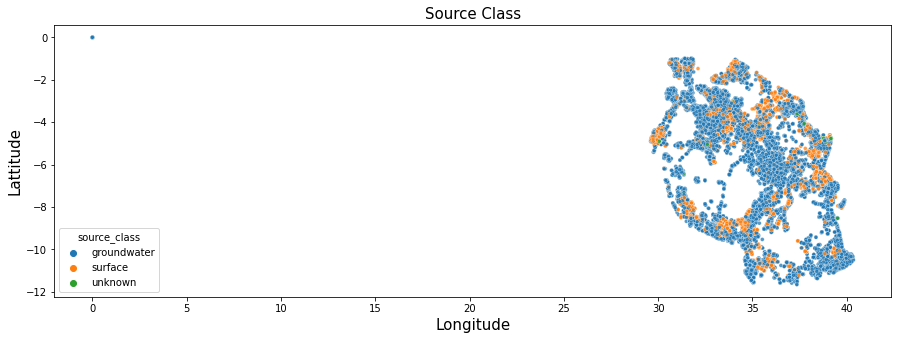

<Figure size 432x288 with 0 Axes>

In [486]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source_class', data = df, alpha = 0.75, s = 15)
plt.title('Source Class', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/source_class_scatterplot')

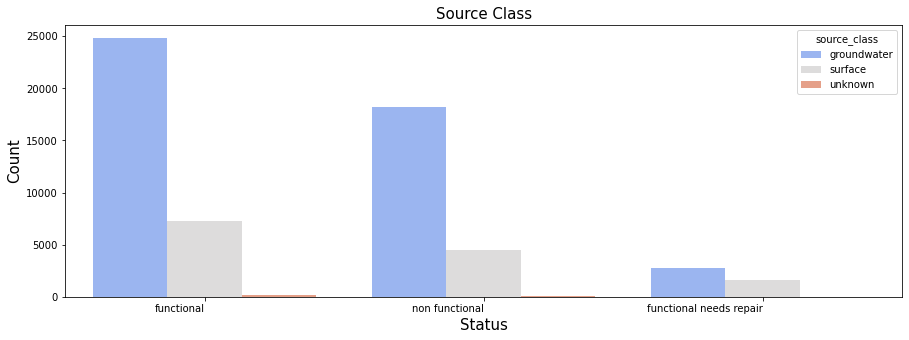

In [487]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'source_class', data = df, palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/waterpoint_type_countplot')

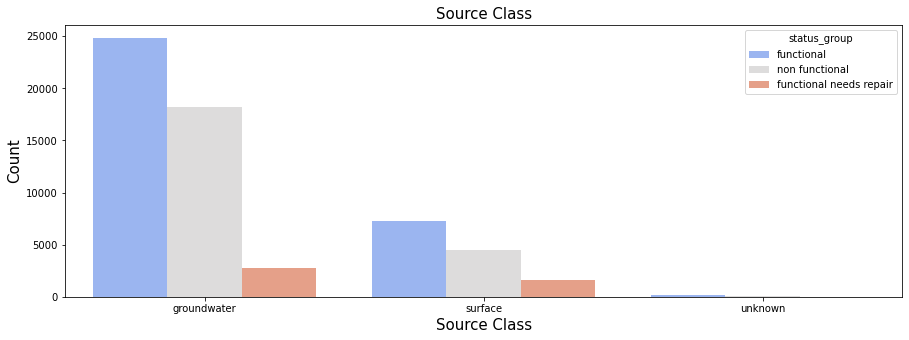

In [488]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source_class', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Source Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/source_class_countplot')

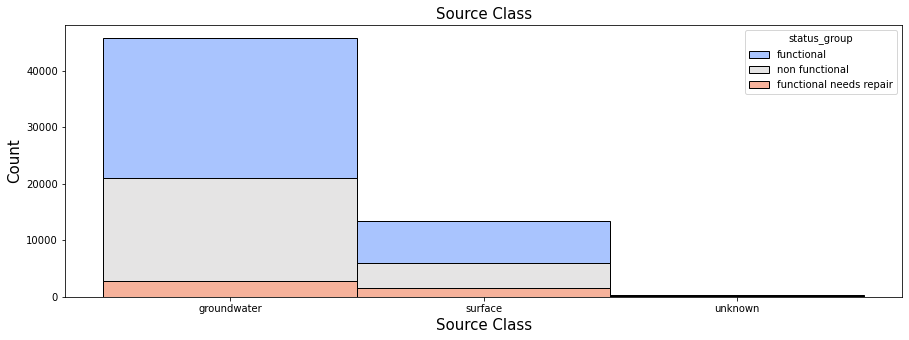

In [489]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'source_class', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Source Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/source_class_histplot')

## **'waterpoint_type'**
The kind of waterpoint

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: waterpoint_type, dtype: float64


<AxesSubplot:>

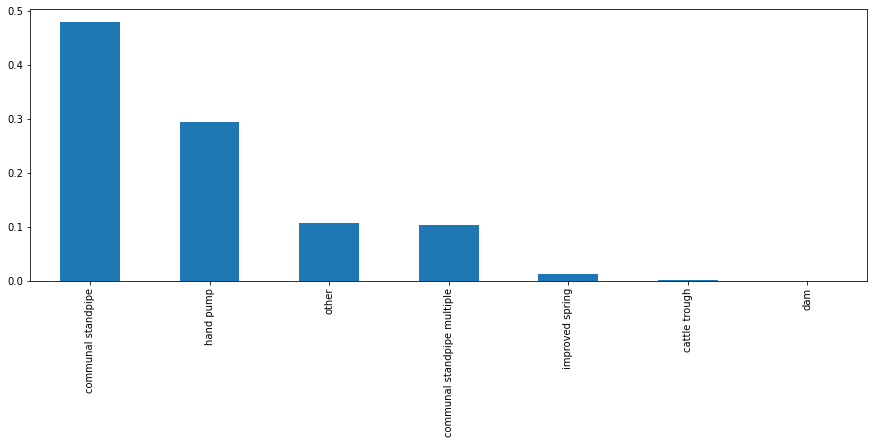

In [490]:
#get value count
print(df['waterpoint_type'].value_counts(normalize = True))

#visualize
df['waterpoint_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [491]:
#check how many unique values
df['waterpoint_type'].nunique()

7

In [492]:
#more exploration
pd.crosstab(df['waterpoint_type'], df['status_group'], normalize = 'index')

status_group                 functional  functional needs repair  \
waterpoint_type                                                    
cattle trough                  0.724138                 0.017241   
communal standpipe             0.621485                 0.079237   
communal standpipe multiple    0.366213                 0.106177   
dam                            0.857143                 0.000000   
hand pump                      0.617852                 0.058840   
improved spring                0.718112                 0.108418   
other                          0.131661                 0.045925   

status_group                 non functional  
waterpoint_type                              
cattle trough                      0.258621  
communal standpipe                 0.299278  
communal standpipe multiple        0.527609  
dam                                0.142857  
hand pump                          0.323307  
improved spring                    0.173469  
other                              0.822414

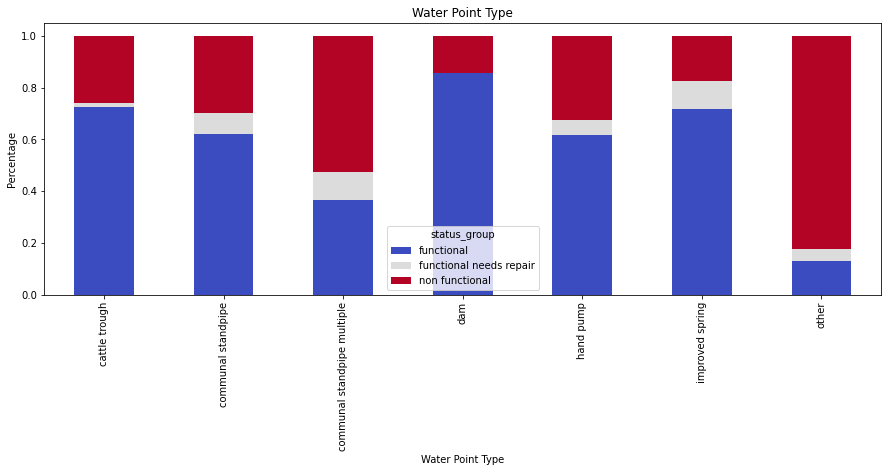

In [493]:
#plot
pd.crosstab(df['waterpoint_type'], df['status_group'], normalize = 'index').plot(kind = 'bar', stacked = True,
                                                                             colormap = 'coolwarm',
                                                                             figsize = (15, 5),
                                                                             title = 'Water Point Type',
                                                                             xlabel = 'Water Point Type',
                                                                             ylabel = 'Percentage')
plt.savefig('./Data/waterpoint_type_crosstab')

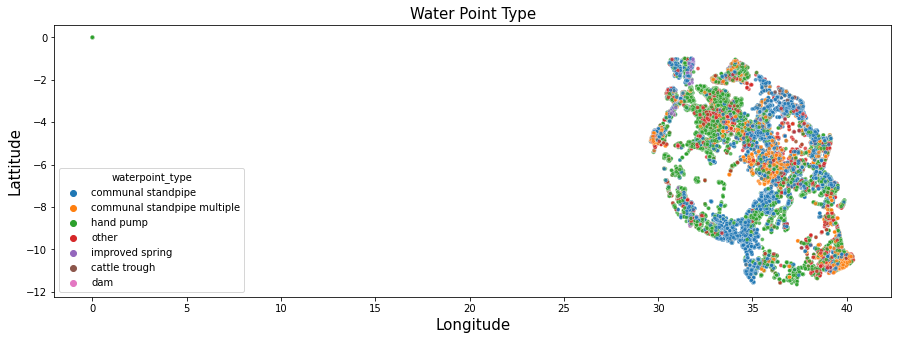

<Figure size 432x288 with 0 Axes>

In [494]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'waterpoint_type', data = df, alpha = 0.75, s = 15)
plt.title('Water Point Type', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/waterpoint_type_scatterplot')

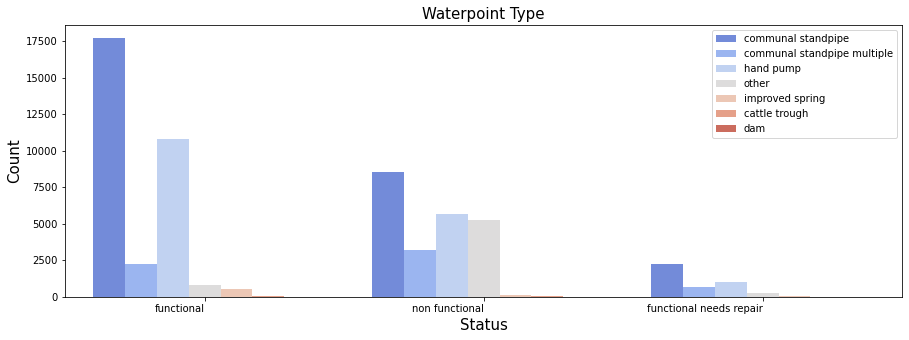

In [495]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'waterpoint_type', data = df, palette = 'coolwarm')
plt.title('Waterpoint Type', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/waterpoint_type_countplot')

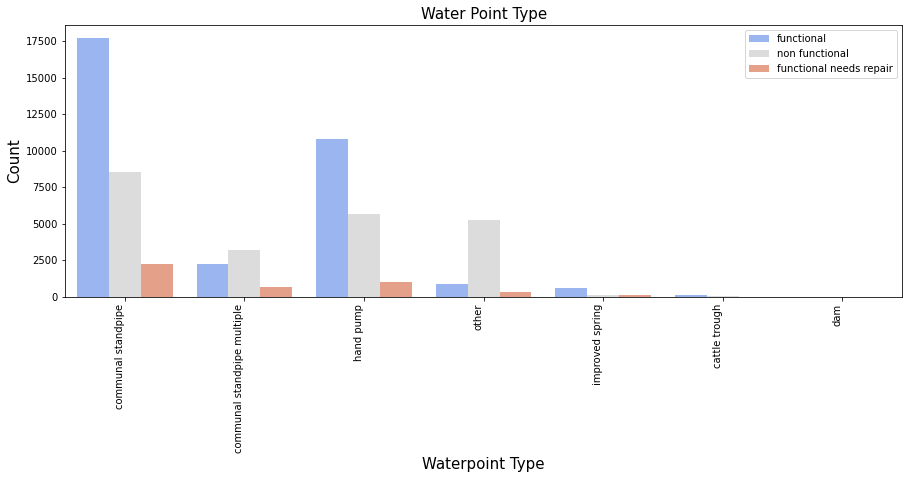

In [496]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'waterpoint_type', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Point Type', fontsize = 15)
plt.xlabel('Waterpoint Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/waterpoint_type_countplot')

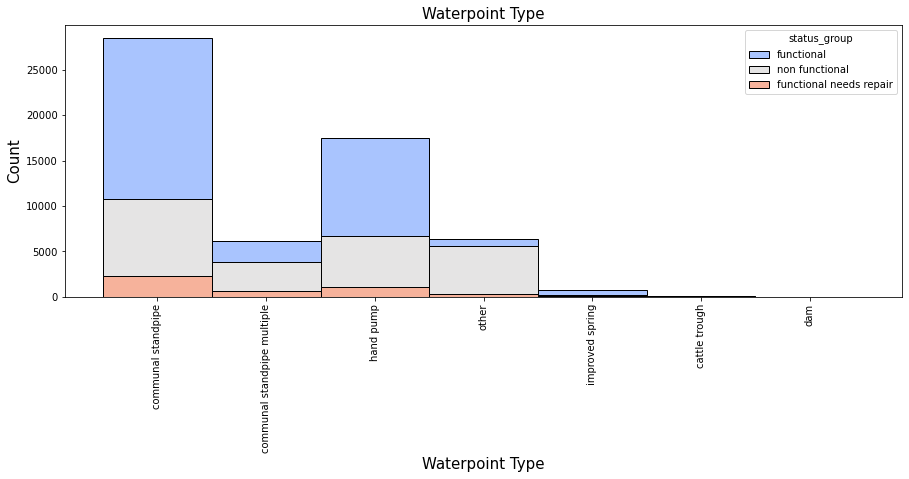

In [497]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'waterpoint_type', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Waterpoint Type', fontsize = 15)
plt.xlabel('Waterpoint Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/waterpoint_type_histplot')

## **'waterpoint_type_group'**
The kind of waterpoint

In [498]:
#get value count
print(df['waterpoint_type_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'waterpoint_type', drop it
df.drop(columns = 'waterpoint_type_group', axis = 1, inplace = True)

communal standpipe    0.582912
hand pump             0.294411
other                 0.107407
improved spring       0.013199
cattle trough         0.001953
dam                   0.000118
Name: waterpoint_type_group, dtype: float64


# Rechecking

In [499]:
#check remaining columns
df.columns

Index(['id', 'status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'management_group', 'payment',
       'water_quality', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'year_recorded', 'funder_group', 'installer_group',
       'wpt_name_group', 'subvillage_group', 'lga_group', 'ward_group',
       'scheme_name_group', 'age'],
      dtype='object')

In [500]:
#check shape
df.shape

(59400, 39)

In [501]:
#check missing value
df.isnull().sum()

id                   0
status_group         0
amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
ward                 0
population           0
public_meeting       0
recorded_by          0
scheme_management    0
scheme_name          0
permit               0
extraction_type      0
management_group     0
payment              0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
year_recorded        0
funder_group         0
installer_group      0
wpt_name_group       0
subvillage_group     0
lga_group            0
ward_group           0
scheme_name_group    0
age                  0
dtype: int64

* amount_tsh
* date_recorded - replaced with ‘year_recorded’, fill missing values with mean - OHE
* funder - 20 most common - OHE
* gps_height 
* installer - 20 most common - OHE
* ~~longitude~~
* ~~latitude~~
* wpt_name - 20 most common - OHE
* ~~num_private~~
* basin - OHE 
* subvillage - 20 most common - OHE
* region - OHE
* region_code - OHE
* district_code - OHE
* lga - 20 most common - OHE
* ward - 20 most common - OHE
* population - fill missing values with median
* public_meeting - OHE
* ~~recorded_by~~~~
* scheme_management - OHE
* scheme_name - 20 most common - OHE
* permit - OHE 
* ~~construction_year~~ - Compute ‘age’ - OHE
* extraction_type - OHE
* ~~extraction_type_group~~
* ~~extraction_type_class~~
* ~~management~~
* management_group - OHE
* payment - OHE
* ~~payment_type~~
* water_quality - OHE
* ~~quality_group~~
* quantity - OHE
* ~~quantity_group~~
* source - OHE
* ~~source_type~~
* source_class - OHE
* waterpoint_type - OHE
* ~~waterpoint_type_group~~

In [502]:
#save
df.to_csv('./Data/clean_df.cvs')

In [503]:
#view
clean_df = pd.read_csv('./Data/clean_df.cvs', index_col = 0)
clean_df.head()

id    status_group  amount_tsh        funder  gps_height     installer  \
0  69572      functional      6000.0         roman        1390         roman   
1   8776      functional         0.0       grumeti        1399       grumeti   
2  34310      functional        25.0  lottery club         686  world vision   
3  67743  non functional         0.0        unicef         263        unicef   
4  19728      functional         0.0   action in a           0       artisan   

   longitude   latitude              wpt_name                    basin  ...  \
0  34.938093  -9.856322                 other               Lake Nyasa  ...   
1  34.698766  -2.147466              Zahanati            Lake Victoria  ...   
2  37.460664  -3.821329           Kwa Mahundi                  Pangani  ...   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast  ...   
4  31.130847  -1.825359               Shuleni            Lake Victoria  ...   

               waterpoint_type year_recorded  funder_group  installer_group  \
0           communal standpipe          2011         other            other   
1           communal standpipe          2013         other            other   
2  communal standpipe multiple          2013         other     world vision   
3  communal standpipe multiple          2013        unicef            other   
4           communal standpipe          2011         other            other   

  wpt_name_group subvillage_group  lga_group ward_group scheme_name_group age  
0          other            other      other      other             other  14  
1       Zahanati            other  Serengeti      other             other   3  
2          other          Majengo      other      other             other   4  
3          other            other      other      other             other  27  
4        Shuleni            other    Karagwe      other             other  17  

[5 rows x 39 columns]

# Preprocessing Data

## Continuous Features

In [504]:
#get continuous features
clean_df.select_dtypes(np.number).columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'year_recorded', 'age'],
      dtype='object')

In [505]:
#drop 'id' since it is just an identifier
clean_df.drop(columns = 'id', axis = 1, inplace = True)

In [506]:
#get summary statistics
clean_df.select_dtypes(np.number).describe()

amount_tsh    gps_height     longitude      latitude   region_code  \
count   59400.000000  59400.000000  59400.000000  5.940000e+04  59400.000000   
mean      317.650385    668.297239     34.077427 -5.706033e+00     15.297003   
std      2997.574558    693.116350      6.567432  2.946019e+00     17.587406   
min         0.000000    -90.000000      0.000000 -1.164944e+01      1.000000   
25%         0.000000      0.000000     33.090347 -8.540621e+00      5.000000   
50%         0.000000    369.000000     34.908743 -5.021597e+00     12.000000   
75%        20.000000   1319.250000     37.178387 -3.326156e+00     17.000000   
max    350000.000000   2770.000000     40.345193 -2.000000e-08     99.000000   

       district_code    population  year_recorded           age  
count   59400.000000  59400.000000   59400.000000  59400.000000  
mean        5.629747    233.902407    2011.921667     16.469343  
std         9.633649    456.126443       0.958758     10.073265  
min         0.000000      1.000000    2002.000000      0.000000  
25%         2.000000    100.000000    2011.000000      9.000000  
50%         3.000000    150.000000    2012.000000     17.000000  
75%         5.000000    215.000000    2013.000000     17.000000  
max        80.000000  30500.000000    2013.000000     53.000000

In [507]:
#convert 'year_recorded' to object so we can OHE later
clean_df['year_recorded'] = pd.to_datetime(clean_df['year_recorded']).astype('str')

In [508]:
#convert 'district_code' and 'region_code' to 'str' to OHE later
clean_df['district_code'] = df['district_code'].astype('str')
clean_df['region_code'] = clean_df['region_code'].astype('str')

## Categorical Features

In [509]:
#get categorical features
clean_df.select_dtypes('object').columns

Index(['status_group', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'management_group', 'payment',
       'water_quality', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'year_recorded', 'funder_group', 'installer_group',
       'wpt_name_group', 'subvillage_group', 'lga_group', 'ward_group',
       'scheme_name_group'],
      dtype='object')

In [510]:
#drop 7 features that have too many unique values and only keep their 20 most common values
clean_df.drop(columns = ['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name'], axis = 1, inplace = True)

In [511]:
#check
clean_df.columns

Index(['status_group', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'basin', 'region', 'region_code', 'district_code', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'extraction_type', 'management_group', 'payment', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'year_recorded', 'funder_group', 'installer_group', 'wpt_name_group',
       'subvillage_group', 'lga_group', 'ward_group', 'scheme_name_group',
       'age'],
      dtype='object')

In [512]:
#review
clean_df.head(2)

status_group  amount_tsh  gps_height  longitude  latitude          basin  \
0   functional      6000.0        1390  34.938093 -9.856322     Lake Nyasa   
1   functional         0.0        1399  34.698766 -2.147466  Lake Victoria   

   region region_code district_code  population  ...     waterpoint_type  \
0  Iringa          11             5         109  ...  communal standpipe   
1    Mara          20             2         280  ...  communal standpipe   

                   year_recorded funder_group installer_group wpt_name_group  \
0  1970-01-01 00:00:00.000002011        other           other          other   
1  1970-01-01 00:00:00.000002013        other           other       Zahanati   

  subvillage_group  lga_group ward_group scheme_name_group age  
0            other      other      other             other  14  
1            other  Serengeti      other             other   3  

[2 rows x 31 columns]

In [513]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_group       59400 non-null  object 
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   basin              59400 non-null  object 
 6   region             59400 non-null  object 
 7   region_code        59400 non-null  object 
 8   district_code      59400 non-null  object 
 9   population         59400 non-null  int64  
 10  public_meeting     59400 non-null  object 
 11  recorded_by        59400 non-null  object 
 12  scheme_management  59400 non-null  object 
 13  permit             59400 non-null  object 
 14  extraction_type    59400 non-null  object 
 15  management_group   59400 non-null  object 
 16  payment            594

In [514]:
#create dummies for target
#target = clean_df[['status_group']]

#target_dummies = pd.get_dummies(target)
#target_dummies.head()

In [515]:
#create dummies for categorical features
cat = clean_df[['basin', 'region', 'region_code', 'district_code',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'extraction_type', 'management_group', 'payment', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'year_recorded', 'funder_group', 'installer_group', 'wpt_name_group',
       'subvillage_group', 'lga_group', 'ward_group', 'scheme_name_group']]

cat_dummies = pd.get_dummies(cat, drop_first = True)
cat_dummies.head()

basin_Lake Nyasa  basin_Lake Rukwa  basin_Lake Tanganyika  \
0                 1                 0                      0   
1                 0                 0                      0   
2                 0                 0                      0   
3                 0                 0                      0   
4                 0                 0                      0   

   basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                    0              0             0   
1                    1              0             0   
2                    0              1             0   
3                    0              0             0   
4                    1              0             0   

   basin_Ruvuma / Southern Coast  basin_Wami / Ruvu  region_Dar es Salaam  \
0                              0                  0                     0   
1                              0                  0                     0   
2                              0                  0                     0   
3                              1                  0                     0   
4                              0                  0                     0   

   region_Dodoma  ...  scheme_name_group_m  \
0              0  ...                    0   
1              0  ...                    0   
2              0  ...                    0   
3              0  ...                    0   
4              0  ...                    0   

   scheme_name_group_machumba estate pipe line  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   scheme_name_group_makwale water supplied sche  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   scheme_name_group_mkongoro one  scheme_name_group_n  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

   scheme_name_group_ngana water supplied scheme  scheme_name_group_other  \
0                                              0                        1   
1                                              0                        1   
2                                              0                        1   
3                                              0                        1   
4                                              0                        1   

   scheme_name_group_s  scheme_name_group_uroki-bomang'ombe water sup  \
0                    0                                              0   
1                    0                                              0   
2                    0                                              0   
3                    0                                              0   
4                    0                                              0   

   scheme_name_group_wanging'ombe water  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 280 columns]

In [516]:
#convert 'status_group' into numeric value
clean_df['status_group'].replace('functional', 1, inplace = True)
clean_df['status_group'].replace('non functional', 0, inplace = True)
clean_df['status_group'].replace('functional needs repair', 2, inplace = True)

In [517]:
clean_df['status_group'].value_counts()

1    32259
0    22824
2     4317
Name: status_group, dtype: int64

In [518]:
#continuous features
continuous = clean_df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'age']]
continuous.head()

amount_tsh  gps_height  longitude   latitude  population  age
0      6000.0        1390  34.938093  -9.856322         109   14
1         0.0        1399  34.698766  -2.147466         280    3
2        25.0         686  37.460664  -3.821329         250    4
3         0.0         263  38.486161 -11.155298          58   27
4         0.0           0  31.130847  -1.825359         150   17

In [519]:
#merge
preprocessed_df = pd.concat([clean_df['status_group'], continuous, cat_dummies], axis = 1)
preprocessed_df.head()

status_group  amount_tsh  gps_height  longitude   latitude  population  \
0             1      6000.0        1390  34.938093  -9.856322         109   
1             1         0.0        1399  34.698766  -2.147466         280   
2             1        25.0         686  37.460664  -3.821329         250   
3             0         0.0         263  38.486161 -11.155298          58   
4             1         0.0           0  31.130847  -1.825359         150   

   age  basin_Lake Nyasa  basin_Lake Rukwa  basin_Lake Tanganyika  ...  \
0   14                 1                 0                      0  ...   
1    3                 0                 0                      0  ...   
2    4                 0                 0                      0  ...   
3   27                 0                 0                      0  ...   
4   17                 0                 0                      0  ...   

   scheme_name_group_m  scheme_name_group_machumba estate pipe line  \
0                    0                                            0   
1                    0                                            0   
2                    0                                            0   
3                    0                                            0   
4                    0                                            0   

   scheme_name_group_makwale water supplied sche  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   scheme_name_group_mkongoro one  scheme_name_group_n  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

   scheme_name_group_ngana water supplied scheme  scheme_name_group_other  \
0                                              0                        1   
1                                              0                        1   
2                                              0                        1   
3                                              0                        1   
4                                              0                        1   

   scheme_name_group_s  scheme_name_group_uroki-bomang'ombe water sup  \
0                    0                                              0   
1                    0                                              0   
2                    0                                              0   
3                    0                                              0   
4                    0                                              0   

   scheme_name_group_wanging'ombe water  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 287 columns]

In [520]:
#view
preprocessed_df.shape

(59400, 287)

In [521]:
#save
preprocessed_df.to_csv('./Data/preprocessed_df.cvs')